# CAB420 Assignment 1A Question 2: Template

Simon Denman (s.denman@qut.edu.au)

## Overview

This notebook provides a brief template for CAB420 Assignment 1A, Question 2. It simply implements the data loading, and splitting the data into the predictors and response. You are to use the data splits defined here in your response.

**Note: File paths used in this template may need to change for your local machine. Please set these based on your local file system structure.**


In [146]:
import pandas
# import important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm


In [147]:
# load data
train = pandas.read_csv('training.csv')
val = pandas.read_csv('validation.csv')
test = pandas.read_csv('testing.csv')

# pull out X and y data, convert to numpy
X_train = train.iloc[:,1:].to_numpy()
Y_train = train.iloc[:,0].to_numpy()
X_val = val.iloc[:,1:].to_numpy()
Y_val = val.iloc[:,0].to_numpy()
X_test = test.iloc[:,1:].to_numpy()
Y_test = test.iloc[:,0].to_numpy()

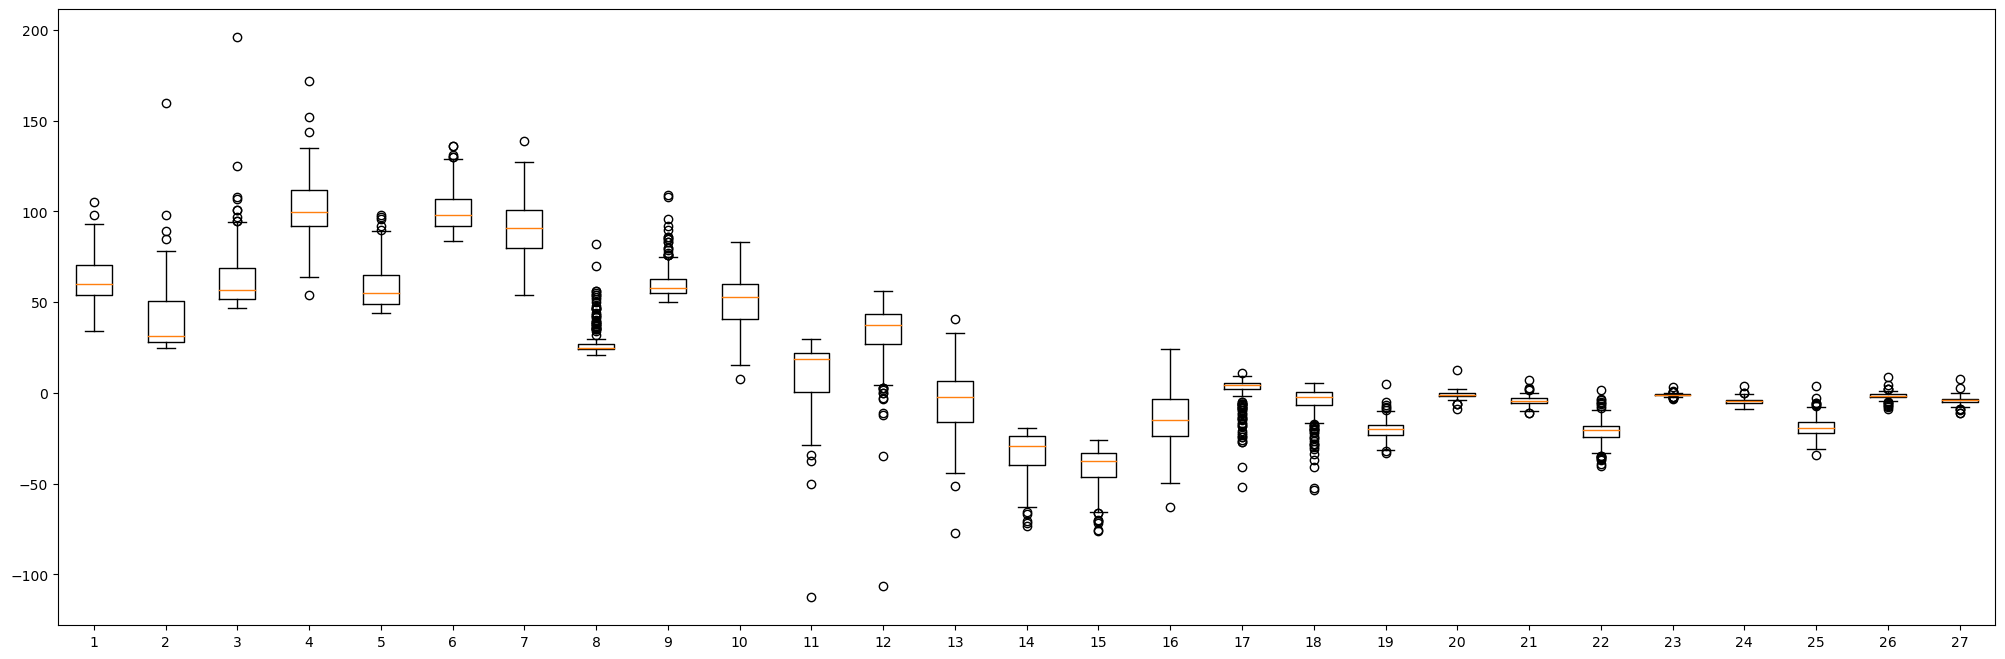

In [148]:
# Do a box plot for the training data
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(X_train);

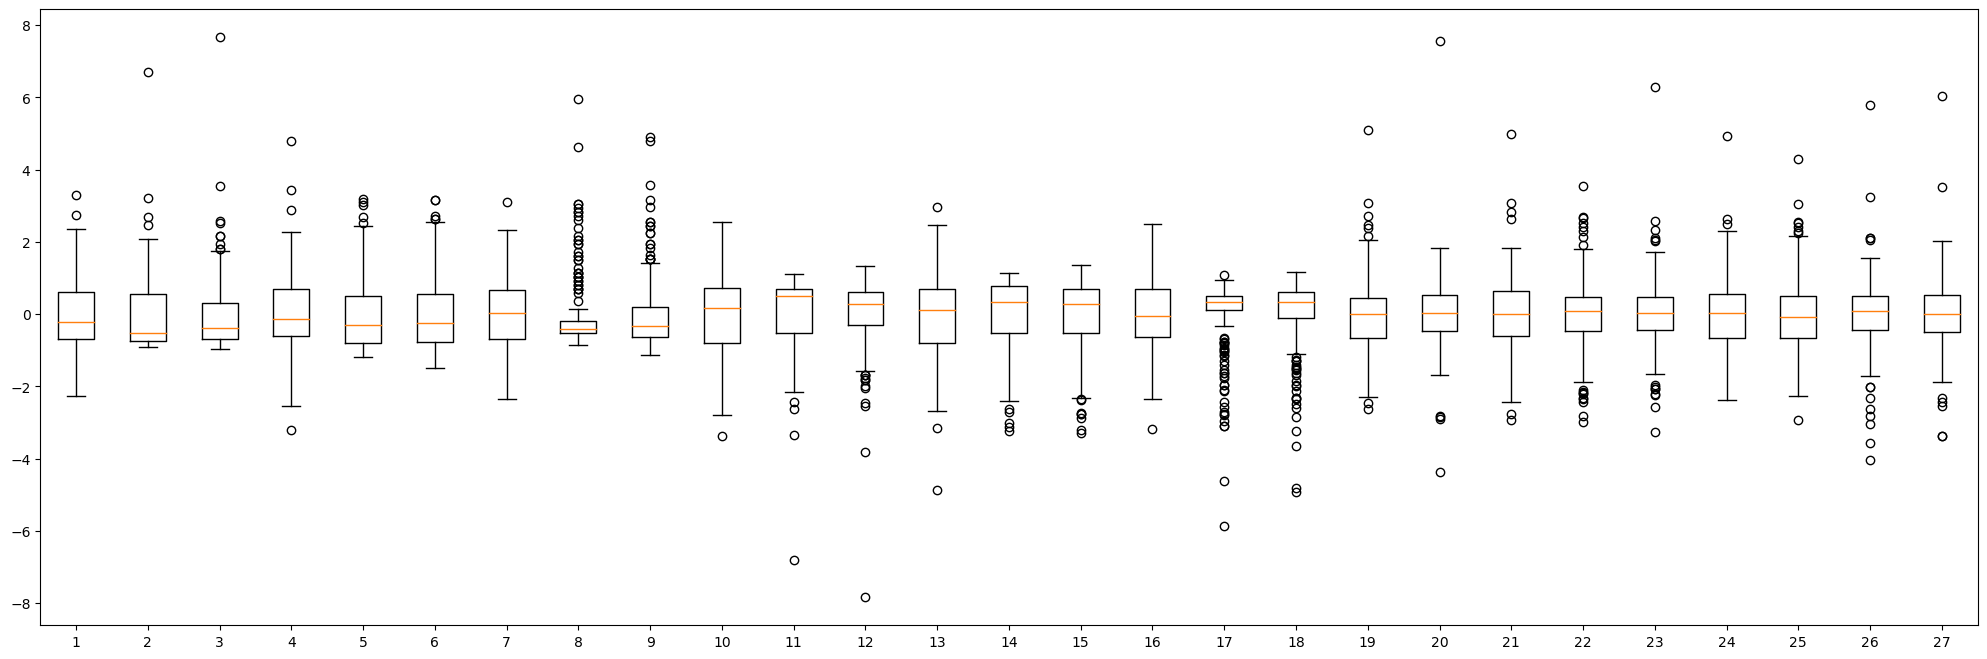

In [149]:
# We have to standardize the data using mu and sigma
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_train = (X_train - mu) / sigma
X_val = (X_val - mu) / sigma
X_test = (X_test - mu) / sigma

# Do a box plot for the training data
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(X_train);


In [150]:
# function to do our eval for us, this is quite simple and will
# - create a figure
# - draw a confusion matrix for the trainign data in a sub-fig on the left
# - draw a confusion matrix for the testing data in a sub-fig on the right
# - get precision, recall, f1 for test data
# this has simply been created as we're going to do this for each test that we run
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize='true', ax=ax)
    conf.ax_.set_title('Training Set Performance: %1.3f' % (sum(model.predict(X_train) == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize='true', ax=ax)
    conf.ax_.set_title('Testing Set Performance: %1.3f' % (sum(model.predict(X_test) == Y_test)/len(Y_test)));
    print(classification_report(Y_test, model.predict(X_test)))

# CKNN


              precision    recall  f1-score   support

          d        0.77      0.77      0.77        53
          h        0.54      0.87      0.67        15
          o        0.95      0.65      0.77        31
          s        0.79      0.81      0.80        62

    accuracy                           0.77       161
   macro avg       0.77      0.77      0.75       161
weighted avg       0.79      0.77      0.77       161



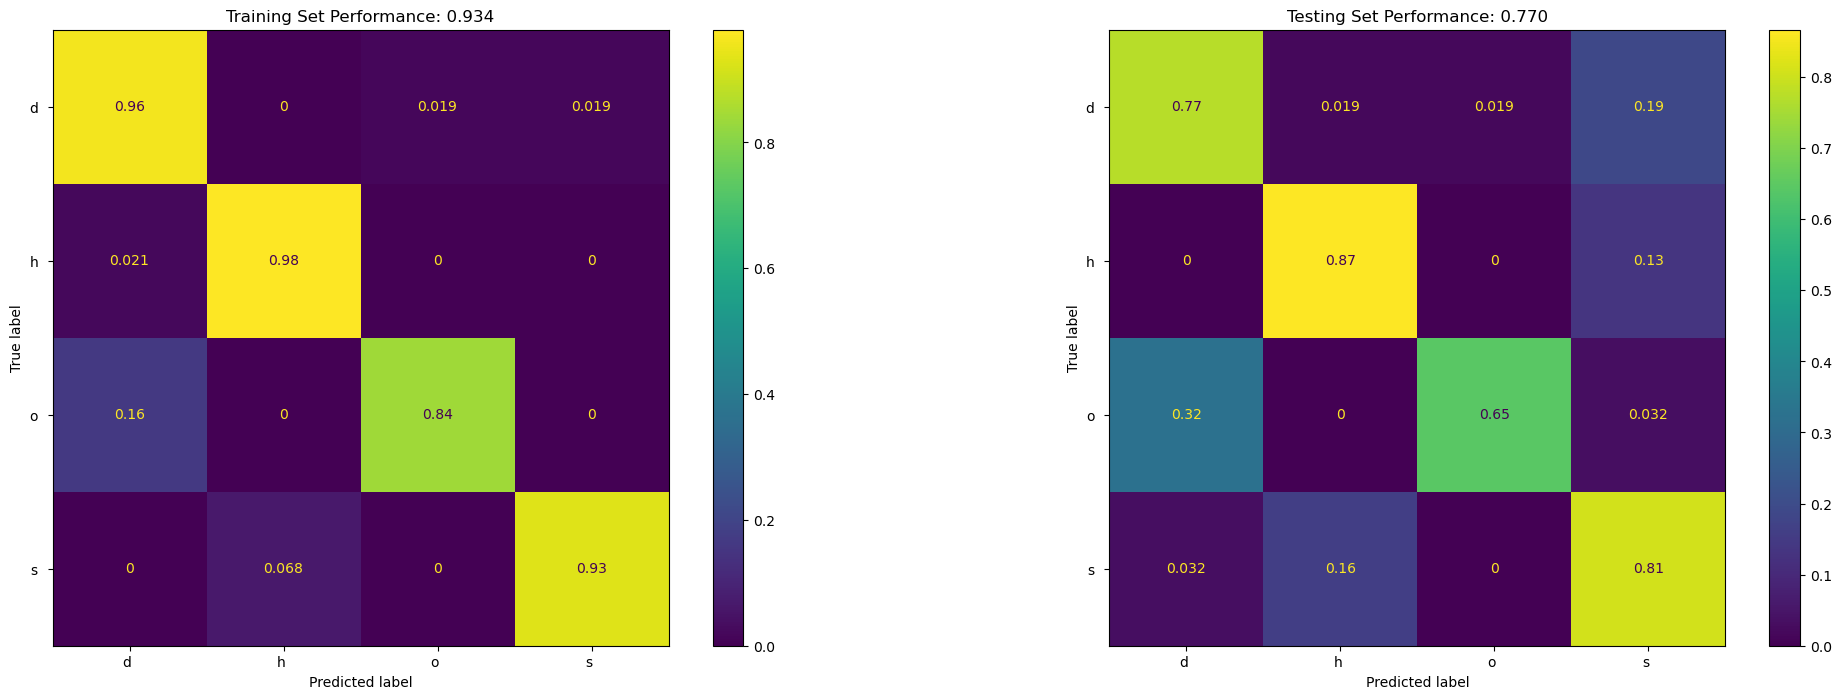

In [151]:
cknn = KNeighborsClassifier(n_neighbors=20)
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

          d        0.82      0.92      0.87        53
          h        0.62      0.87      0.72        15
          o        0.96      0.71      0.81        31
          s        0.88      0.81      0.84        62

    accuracy                           0.83       161
   macro avg       0.82      0.83      0.81       161
weighted avg       0.85      0.83      0.83       161

              precision    recall  f1-score   support

          d        0.75      0.92      0.83        53
          h        0.64      0.93      0.76        15
          o        0.95      0.68      0.79        31
          s        0.92      0.77      0.84        62

    accuracy                           0.82       161
   macro avg       0.82      0.83      0.81       161
weighted avg       0.85      0.82      0.82       161

              precision    recall  f1-score   support

          d        0.79      0.87      0.83        53
          h        0.

/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          d        0.52      0.81      0.64        53
          h        0.62      0.33      0.43        15
          o        0.00      0.00      0.00        31
          s        0.73      0.84      0.78        62

    accuracy                           0.62       161
   macro avg       0.47      0.50      0.46       161
weighted avg       0.51      0.62      0.55       161



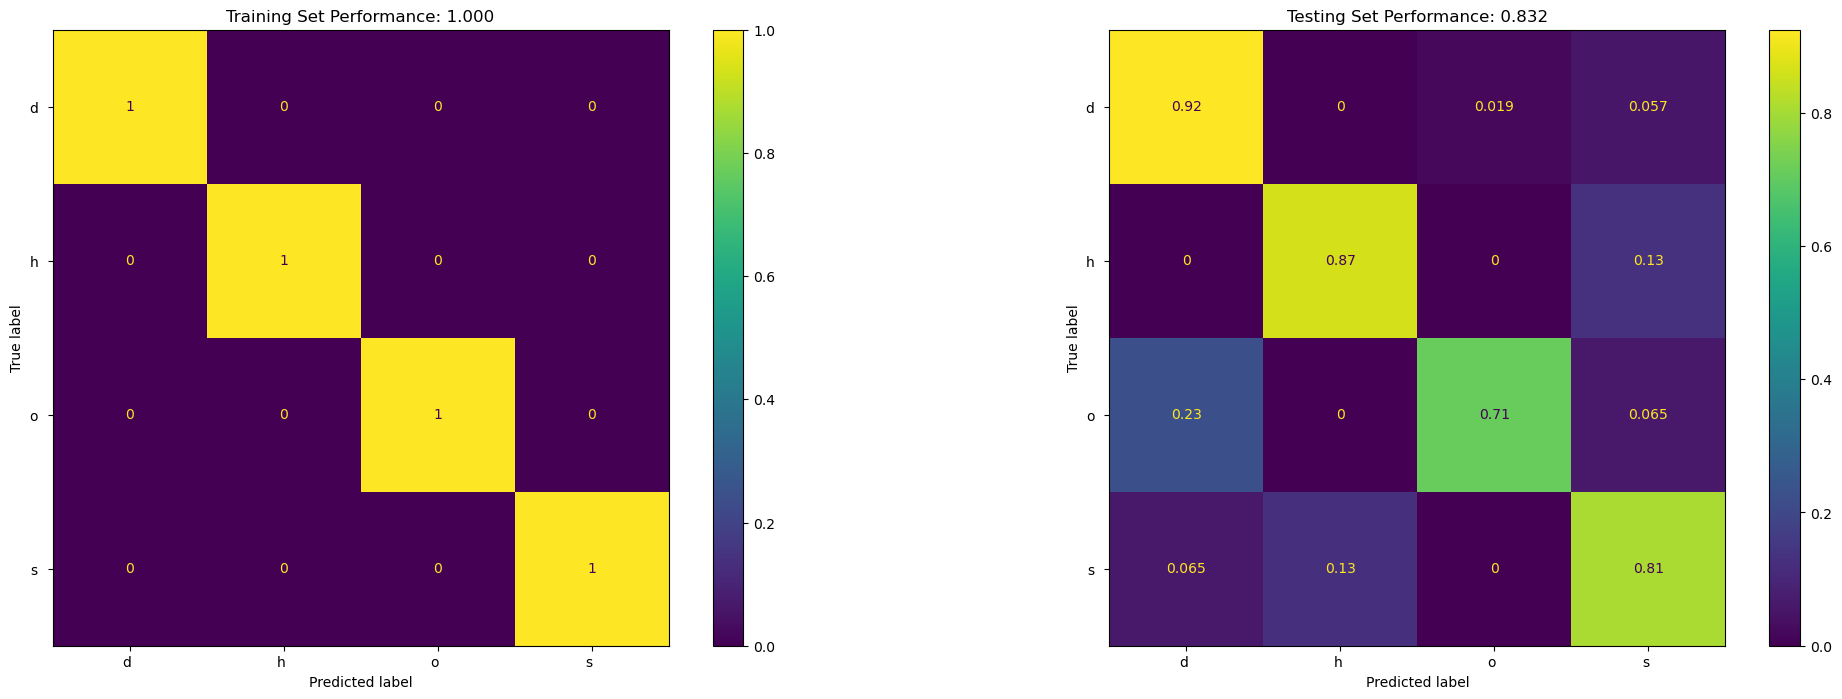

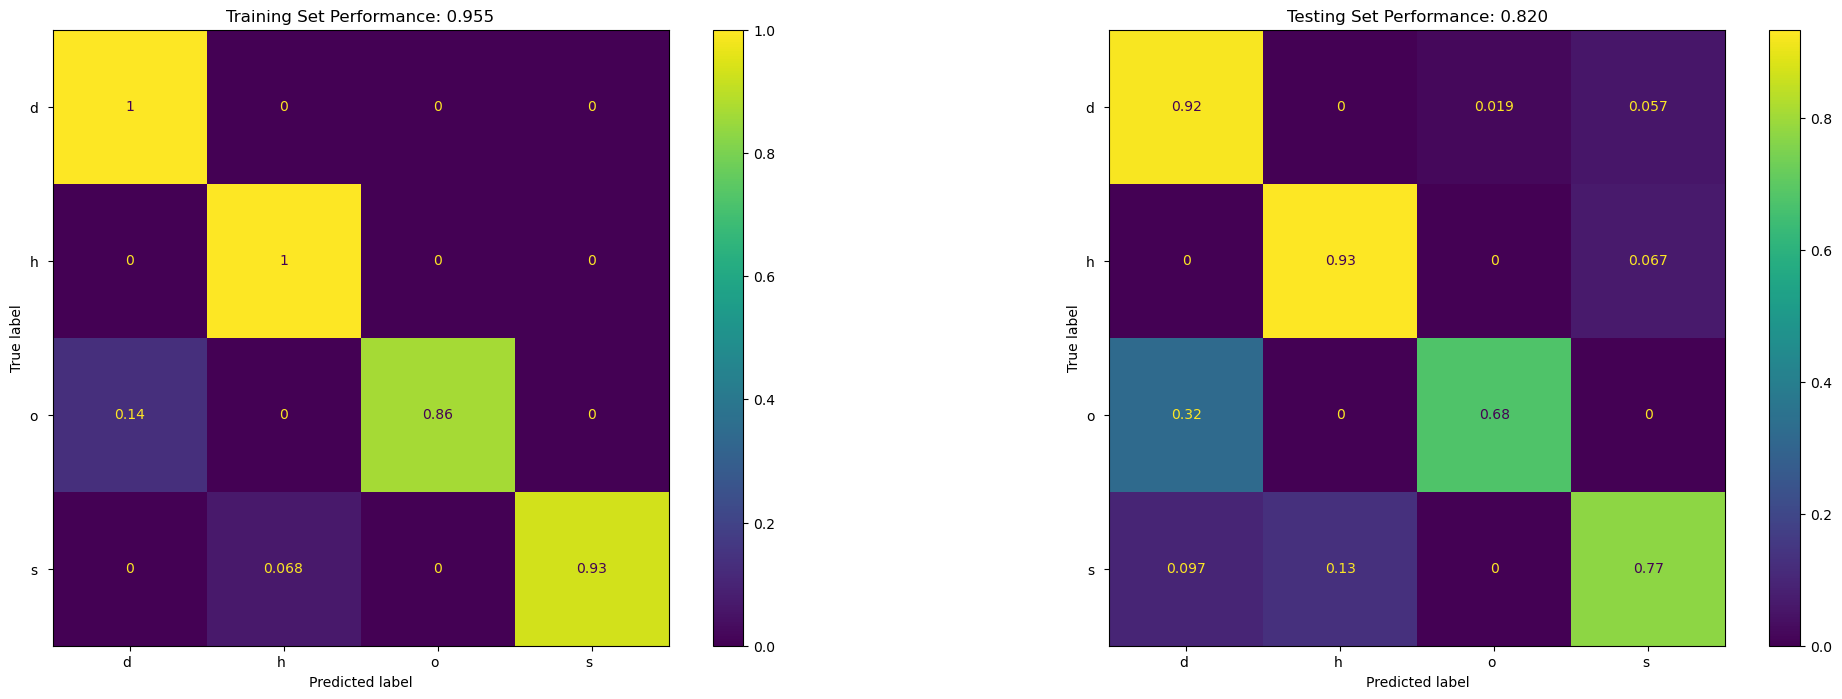

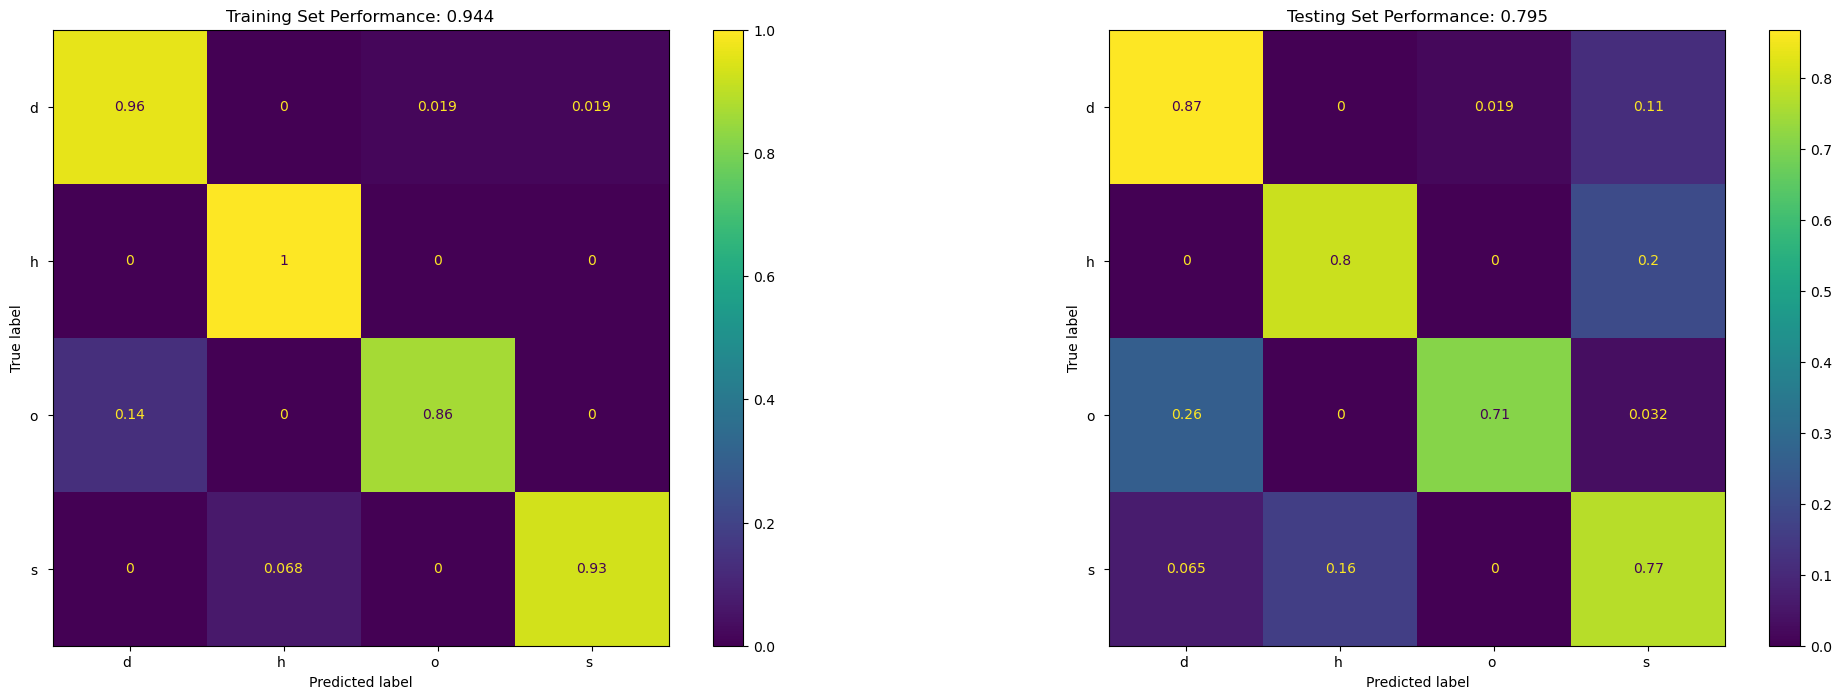

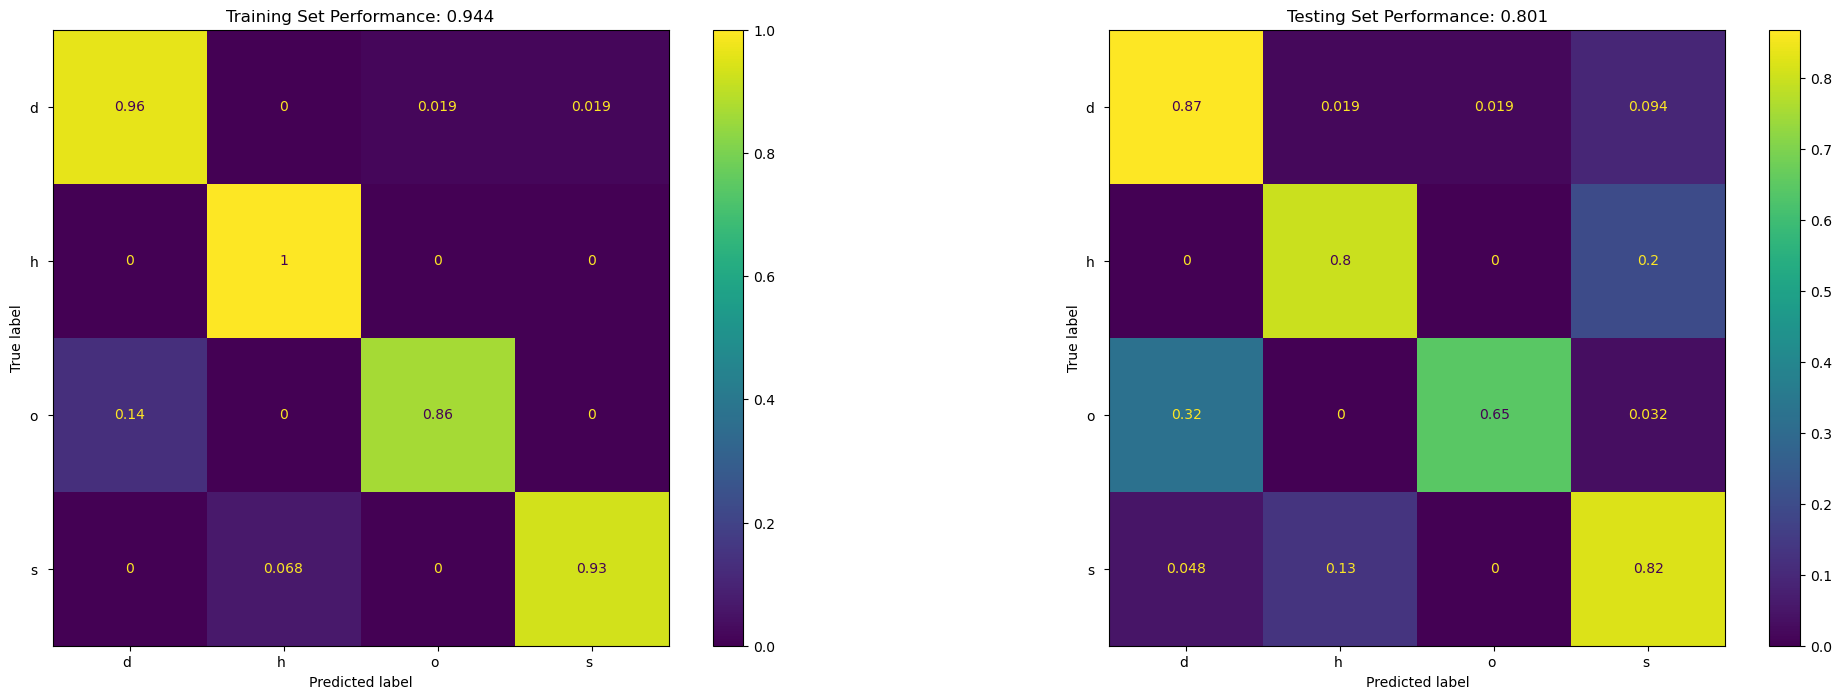

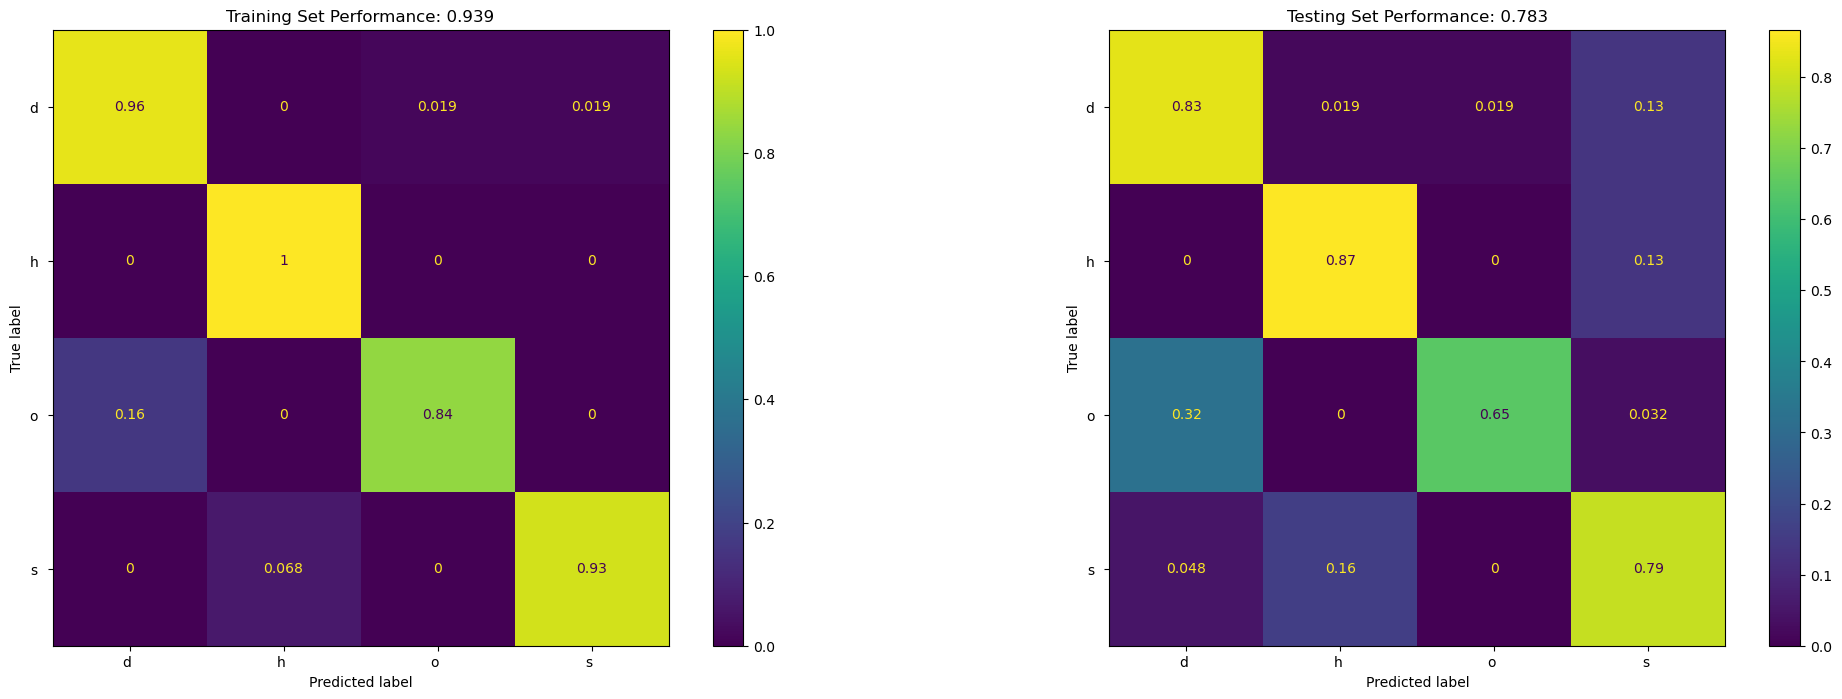

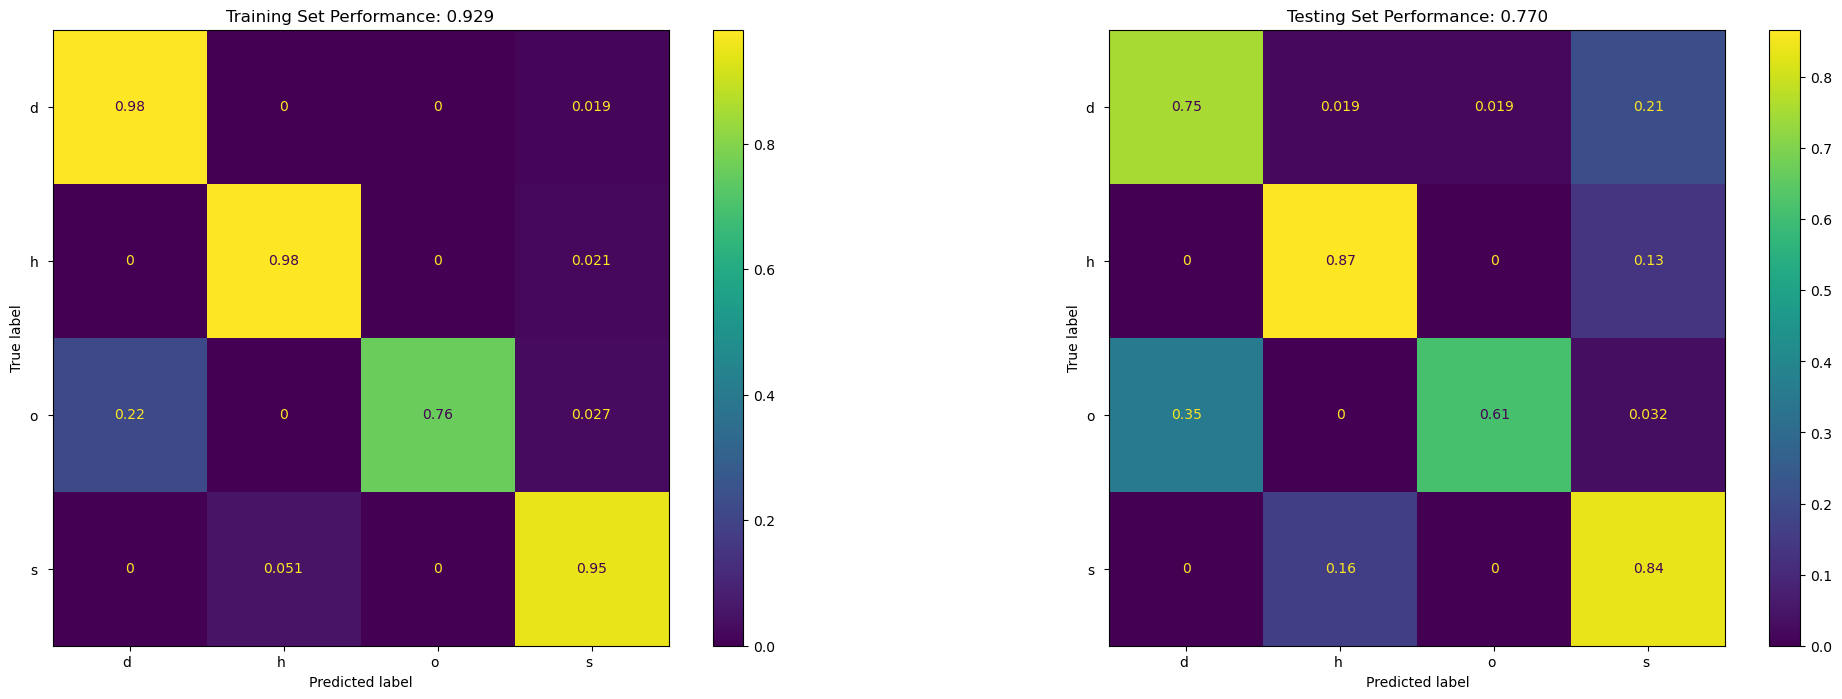

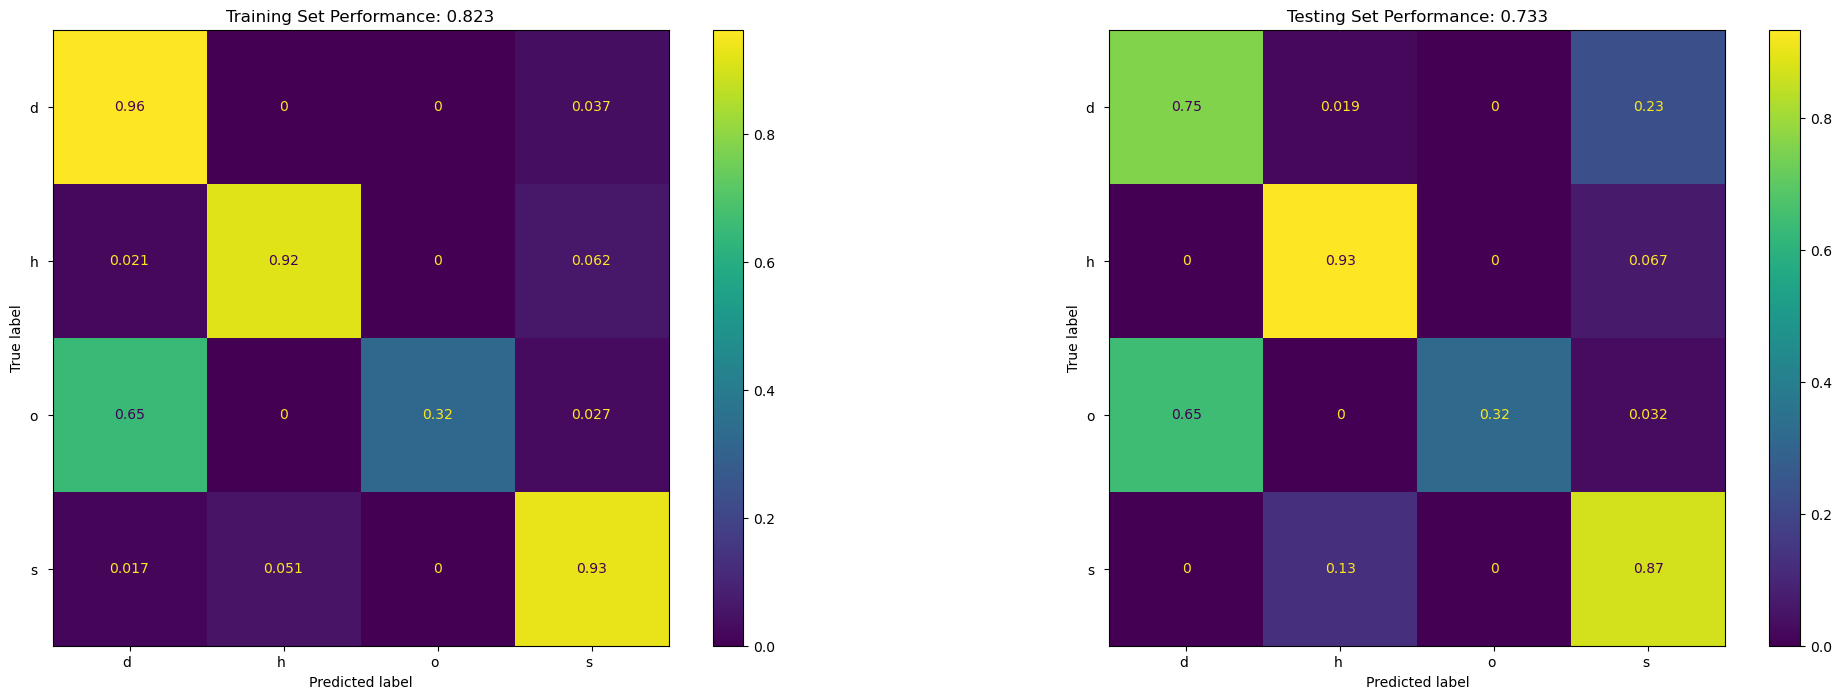

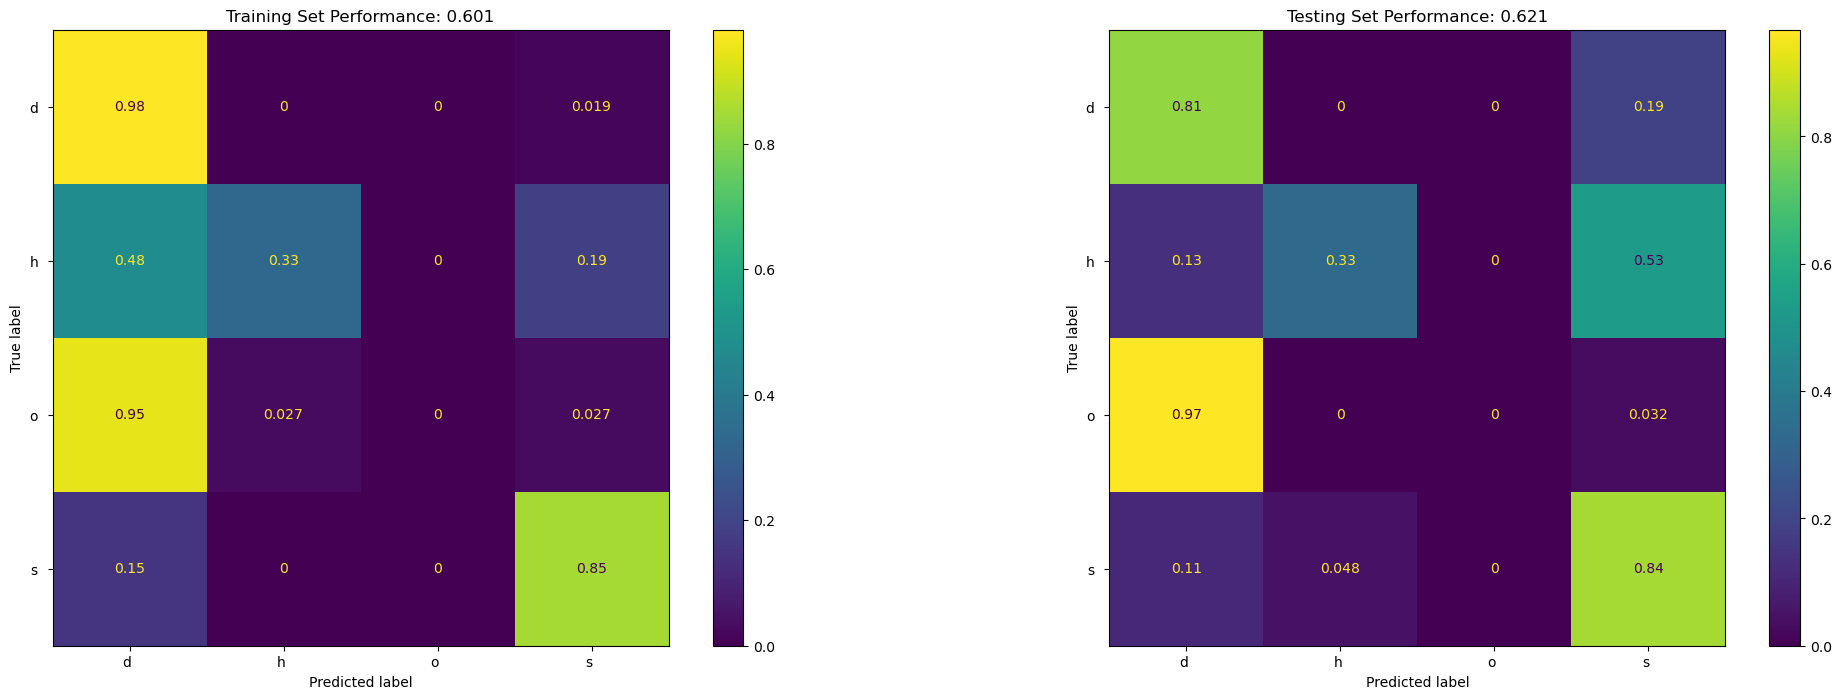

In [152]:
values_of_k = [1, 2, 4, 8, 16, 32, 64, 128]
for k in values_of_k:
    cknn = KNeighborsClassifier(n_neighbors=k)
    cknn.fit(X_train, Y_train)
    eval_model(cknn, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

          d        0.82      0.92      0.87        53
          h        0.62      0.87      0.72        15
          o        0.96      0.71      0.81        31
          s        0.88      0.81      0.84        62

    accuracy                           0.83       161
   macro avg       0.82      0.83      0.81       161
weighted avg       0.85      0.83      0.83       161

              precision    recall  f1-score   support

          d        0.82      0.92      0.87        53
          h        0.62      0.87      0.72        15
          o        0.96      0.71      0.81        31
          s        0.88      0.81      0.84        62

    accuracy                           0.83       161
   macro avg       0.82      0.83      0.81       161
weighted avg       0.85      0.83      0.83       161

              precision    recall  f1-score   support

          d        0.83      0.85      0.84        53
          h        0.

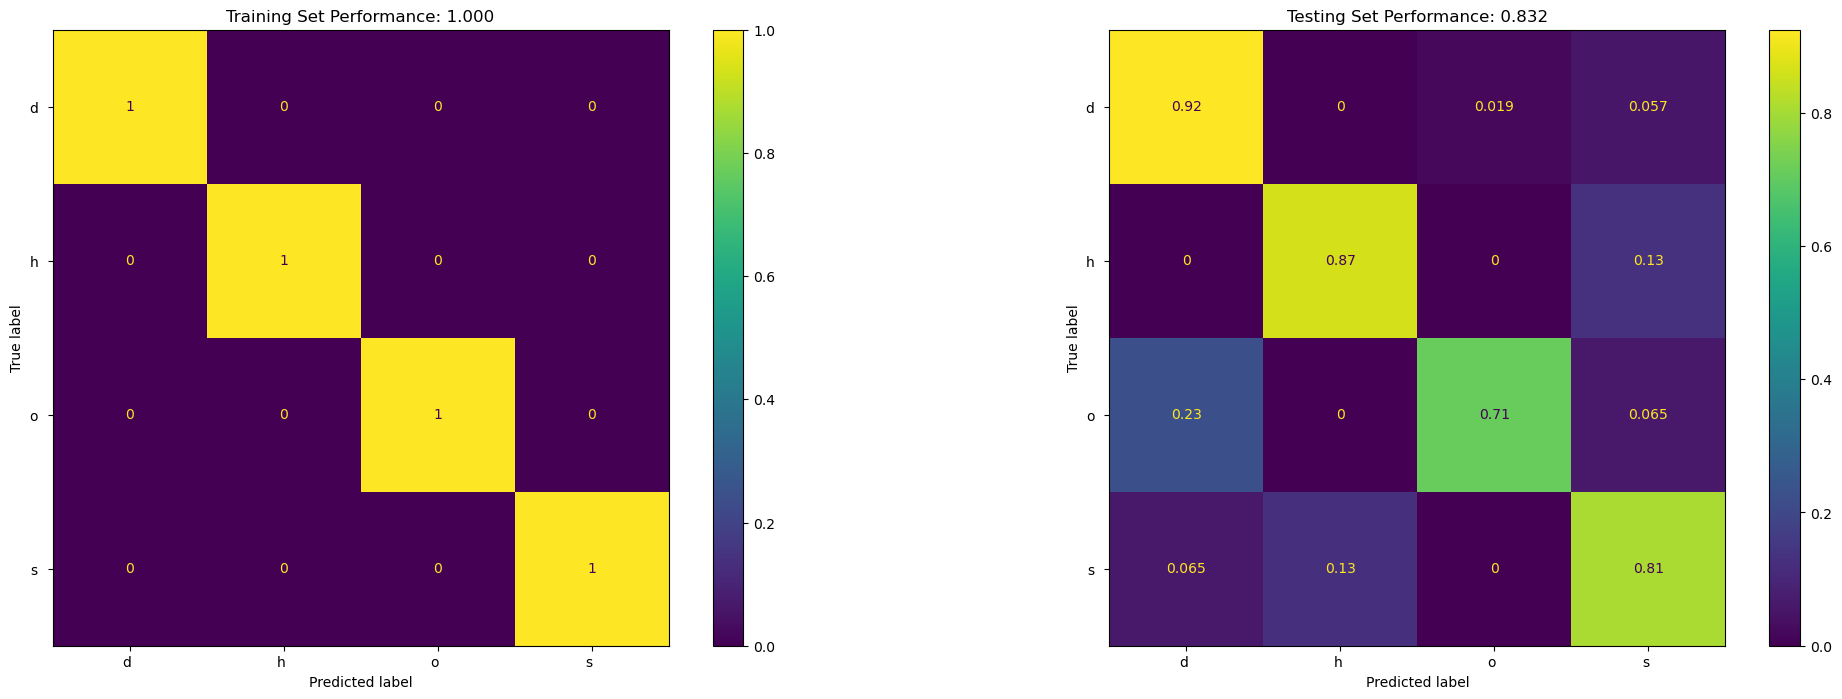

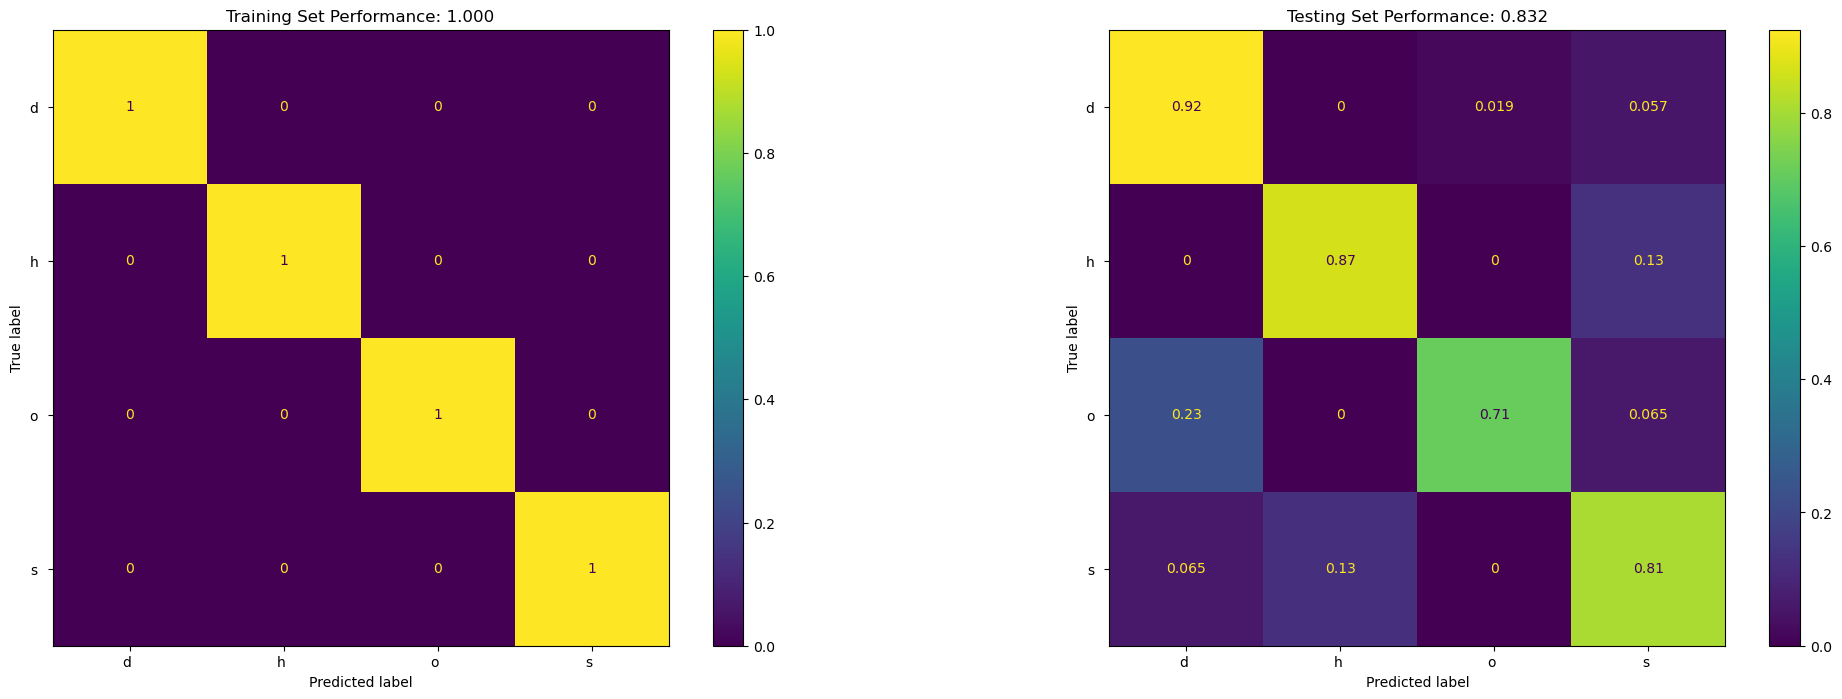

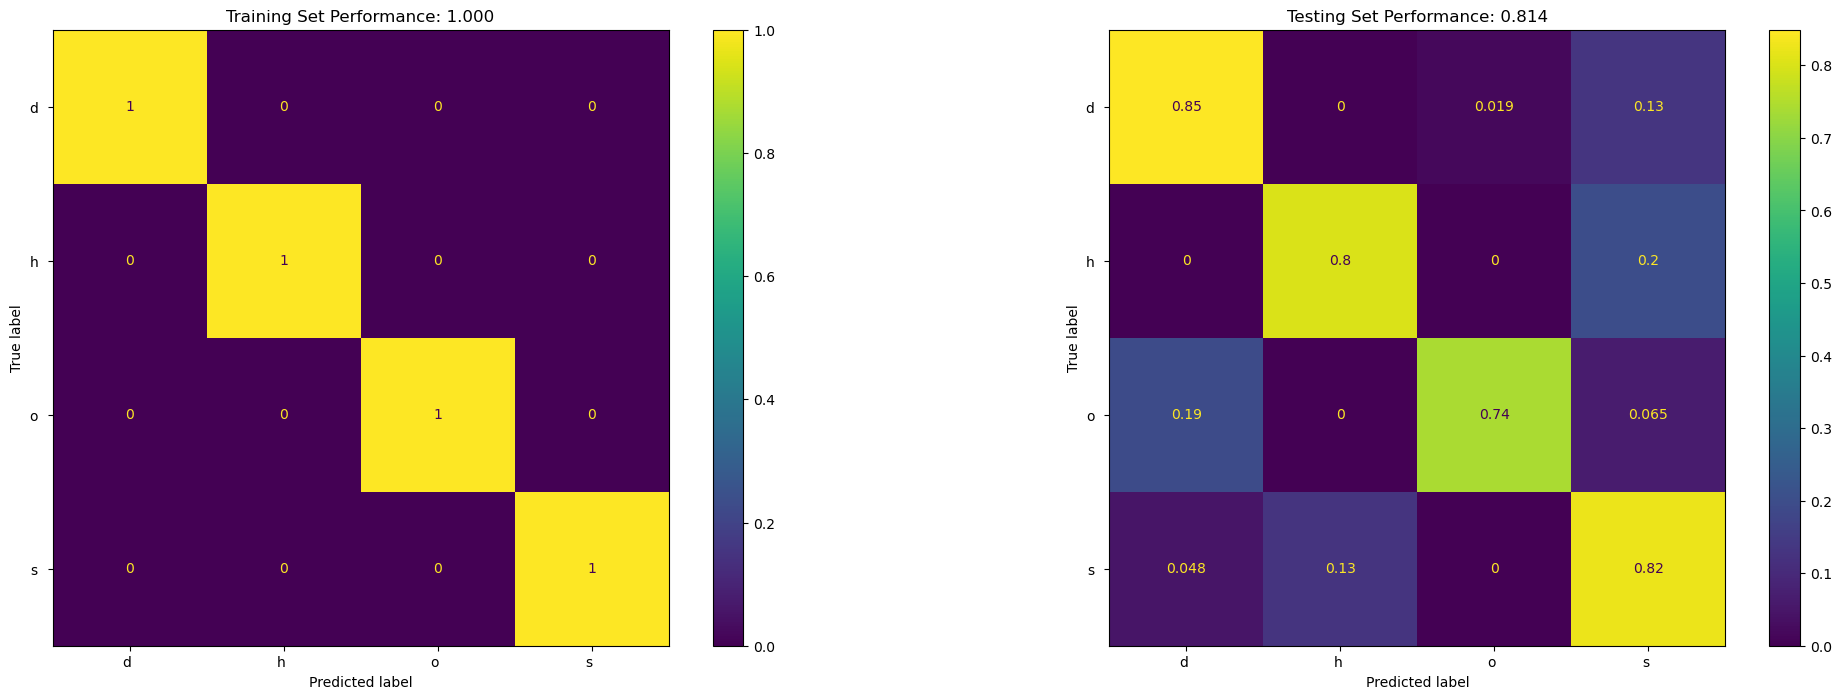

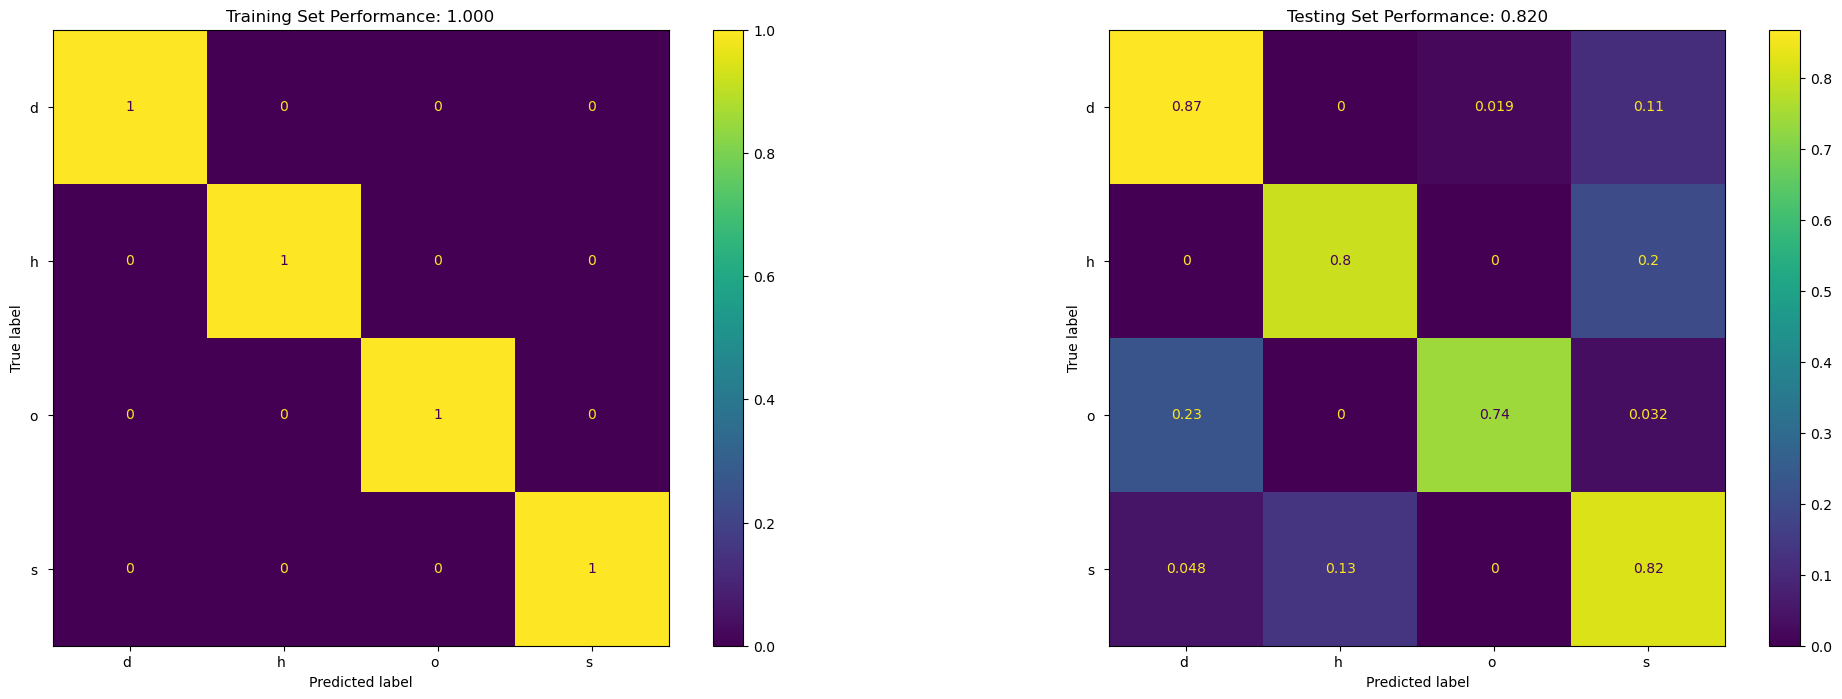

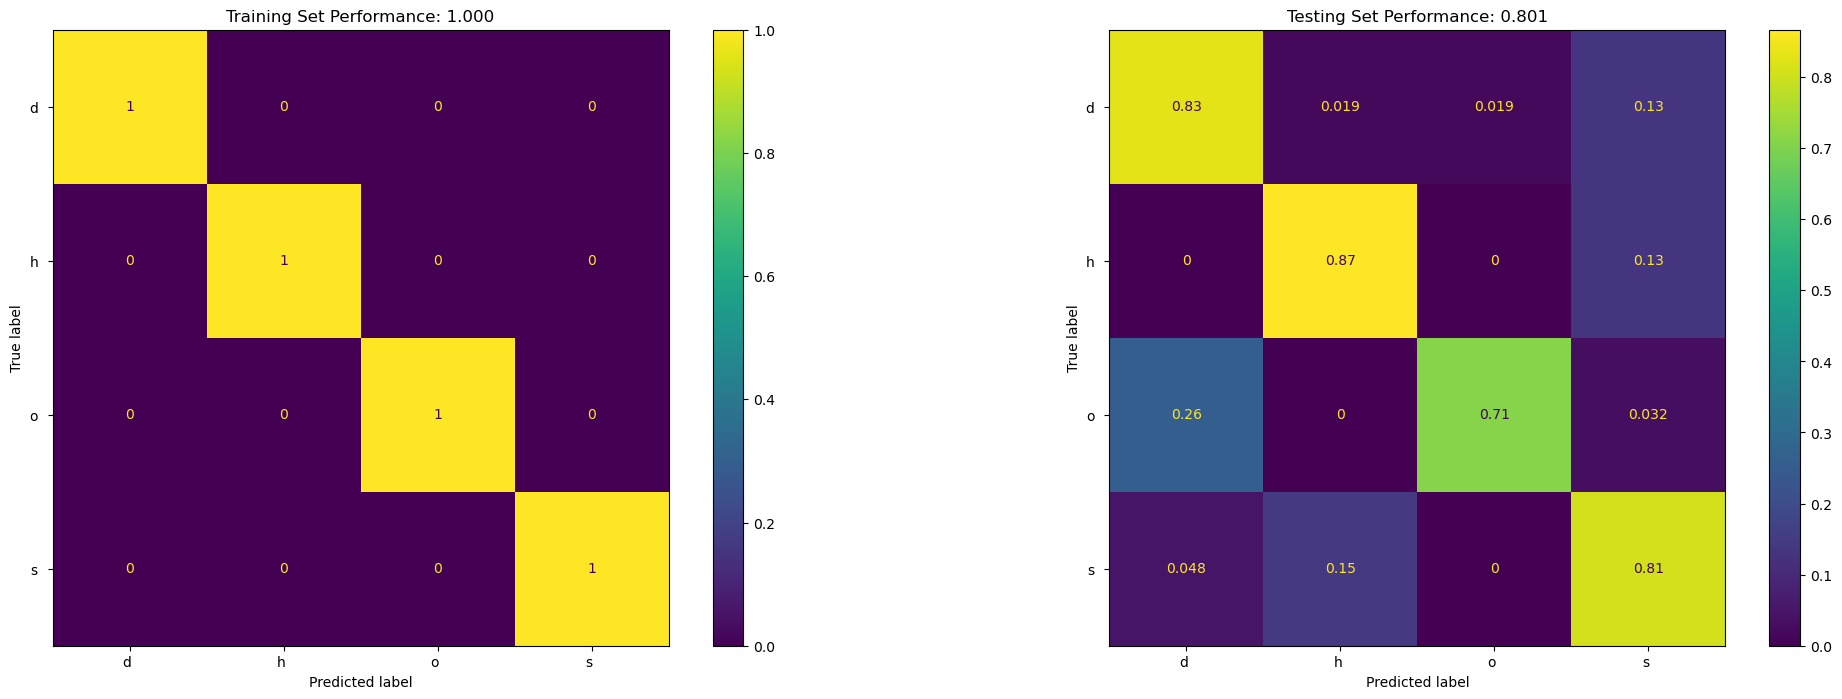

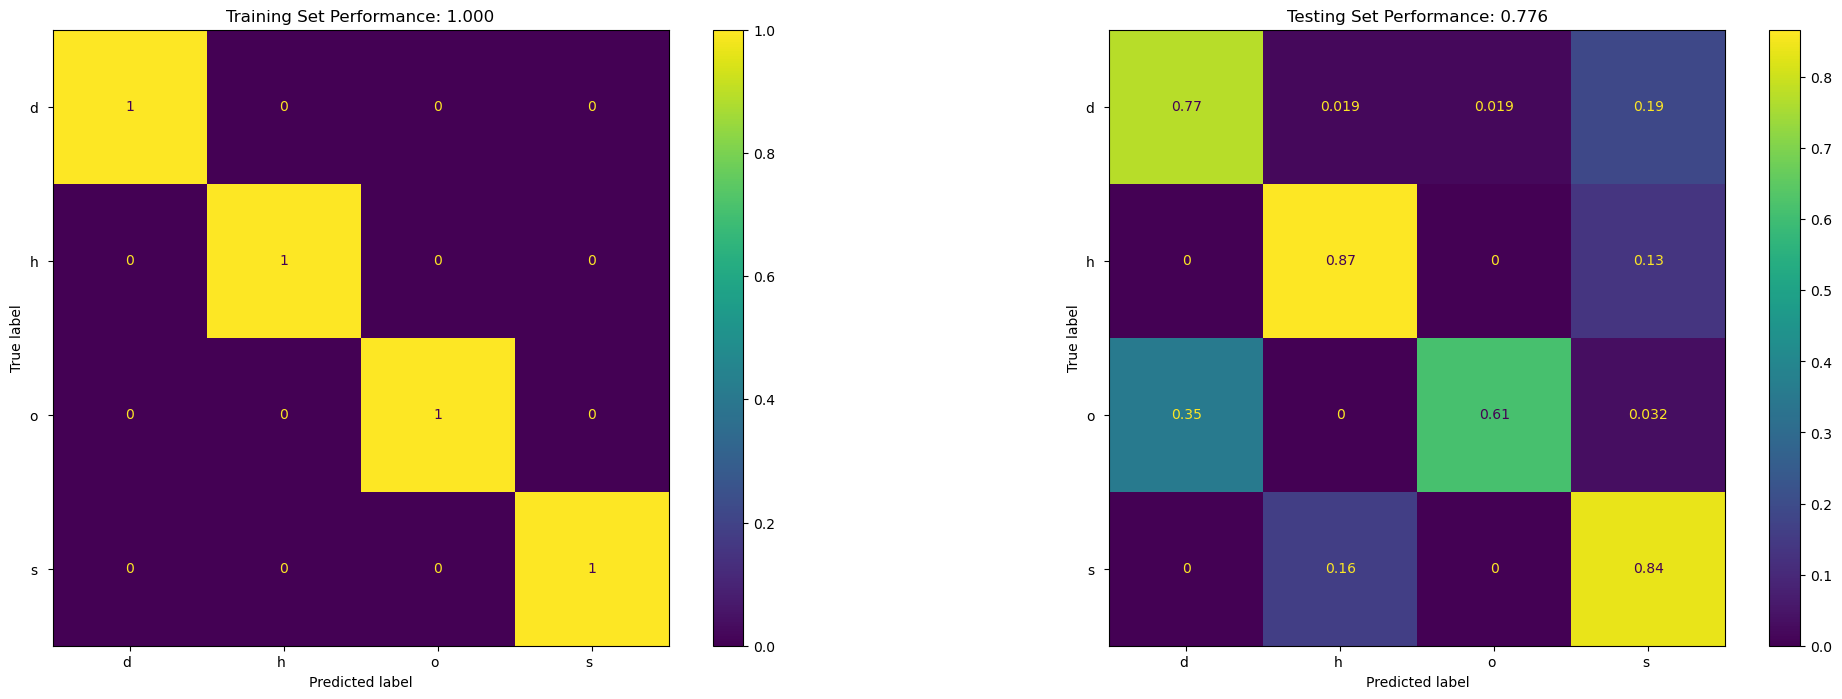

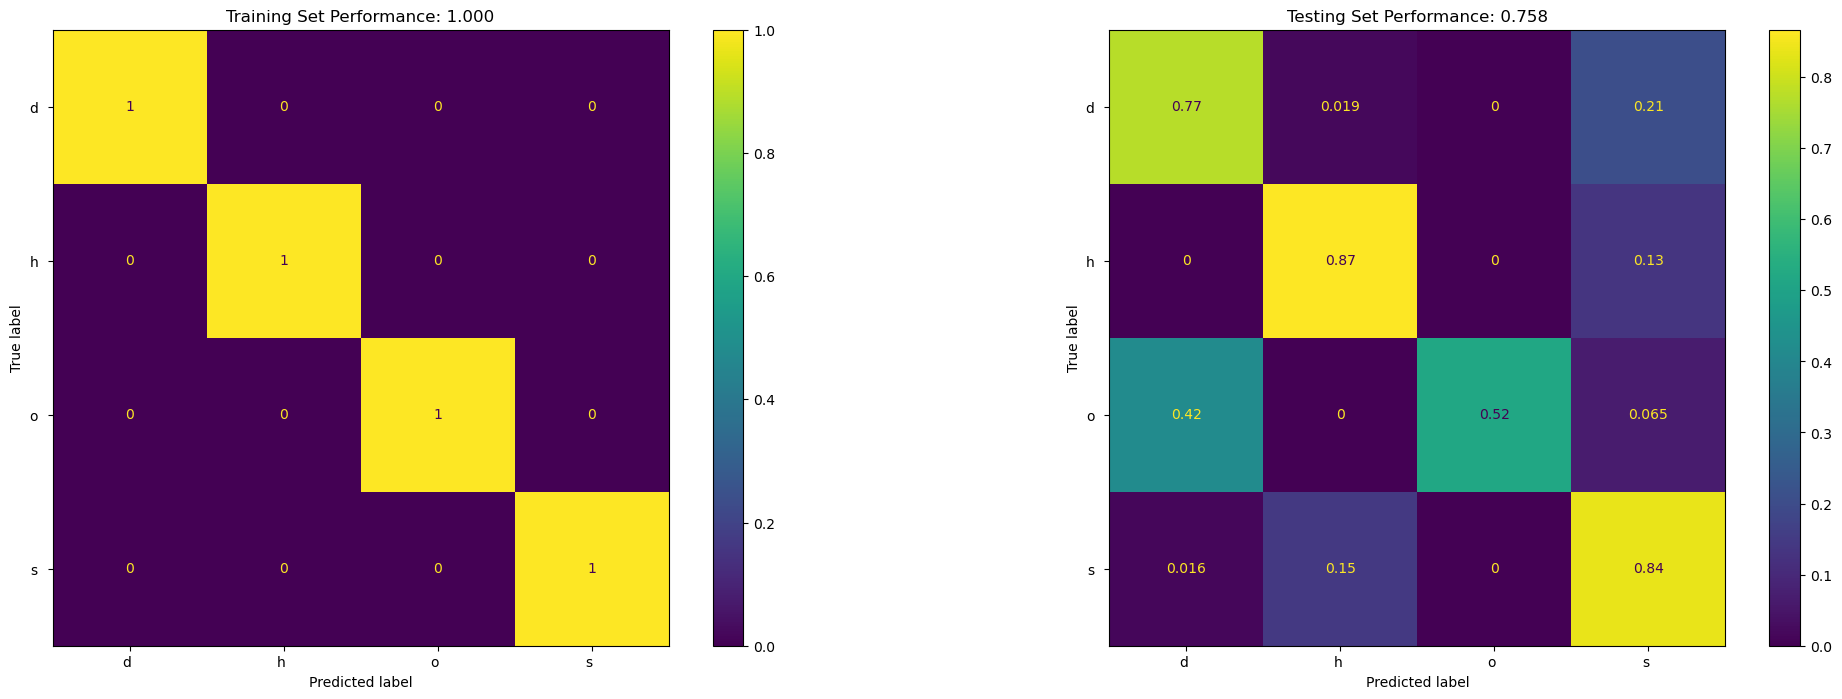

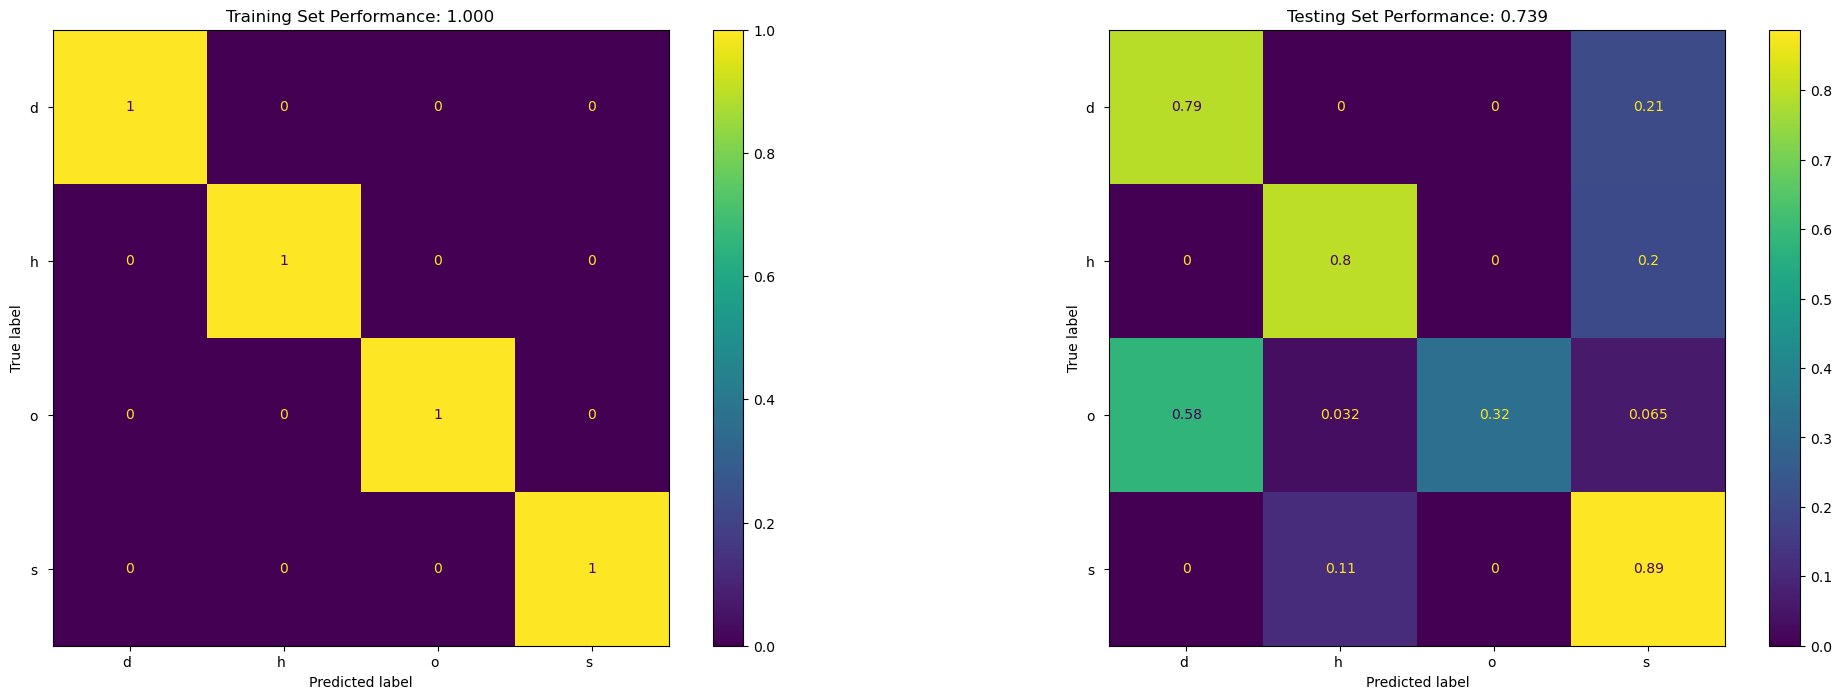

In [153]:
for k in values_of_k:
    cknn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    cknn.fit(X_train, Y_train)
    eval_model(cknn, X_train, Y_train, X_test, Y_test)

### Grid search over multiple hyperparameters


Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

          d        0.82      0.92      0.87        53
          h        0.62      0.87      0.72        15
          o        0.96      0.71      0.81        31
          s        0.88      0.81      0.84        62

    accuracy                           0.83       161
   macro avg       0.82      0.83      0.81       161
weighted avg       0.85      0.83      0.83       161



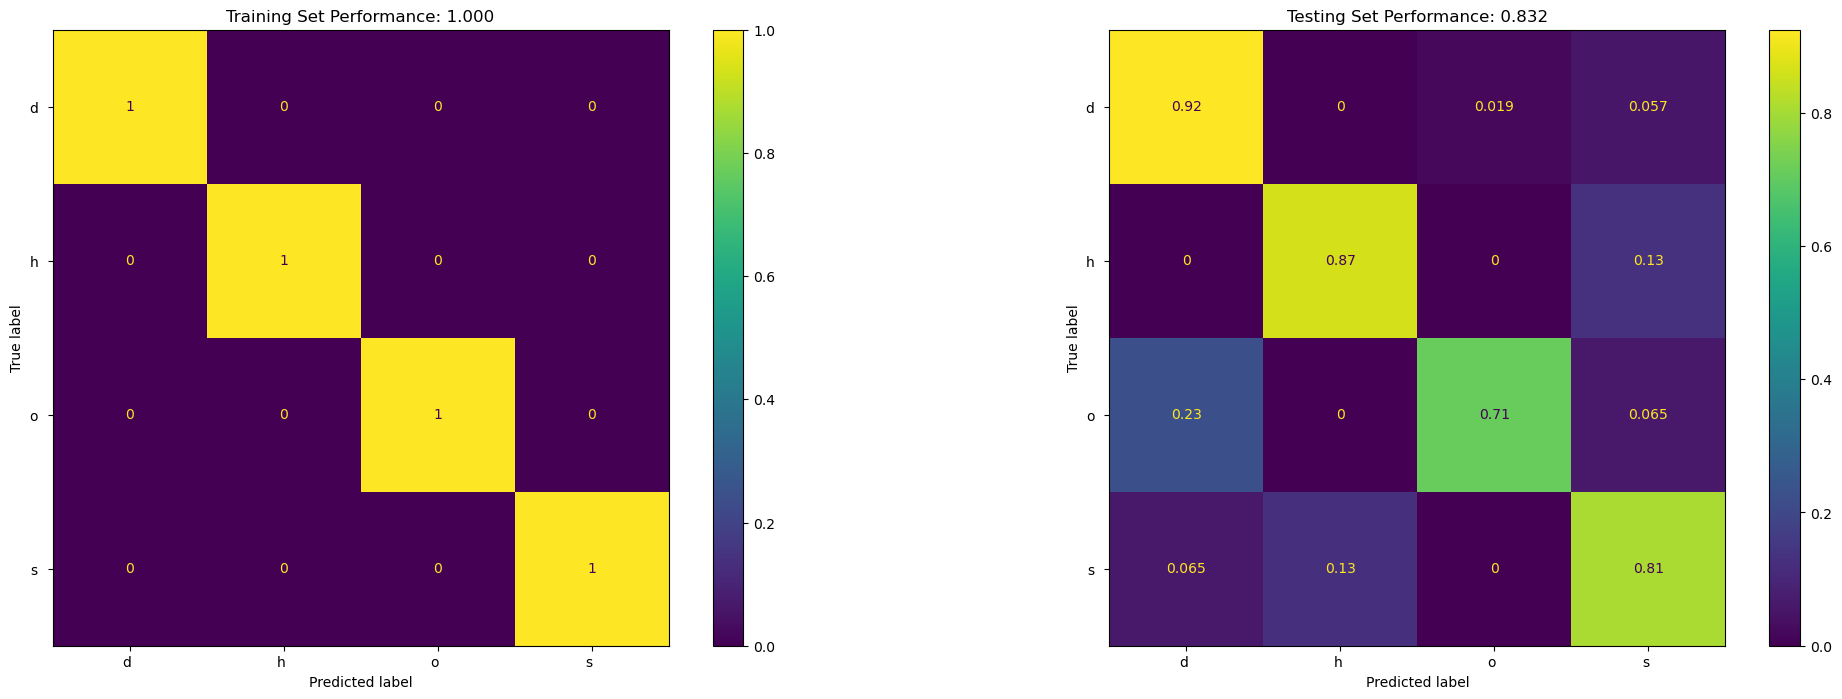

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the range of hyperparameters to search
param_grid = {'n_neighbors': [1, 2, 4, 8, 16, 32, 64, 128],
              'weights': ['uniform', 'distance'],
              'metric': ['manhattan', 'euclidean']}

# Create a CKNN model
cknn = KNeighborsClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(cknn, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model using the best hyperparameters
best_cknn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                  weights=grid_search.best_params_['weights'],
                                  metric=grid_search.best_params_['metric'])
best_cknn.fit(X_train, Y_train)
eval_model(best_cknn, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

          d        0.82      0.92      0.87        53
          h        0.62      0.87      0.72        15
          o        0.96      0.71      0.81        31
          s        0.88      0.81      0.84        62

    accuracy                           0.83       161
   macro avg       0.82      0.83      0.81       161
weighted avg       0.85      0.83      0.83       161

              precision    recall  f1-score   support

          d        0.82      0.92      0.87        53
          h        0.62      0.87      0.72        15
          o        0.96      0.71      0.81        31
          s        0.88      0.81      0.84        62

    accuracy                           0.83       161
   macro avg       0.82      0.83      0.81       161
weighted avg       0.85      0.83      0.83       161

              precision    recall  f1-score   support

          d        0.75      0.92      0.83        53
          h        0.

/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


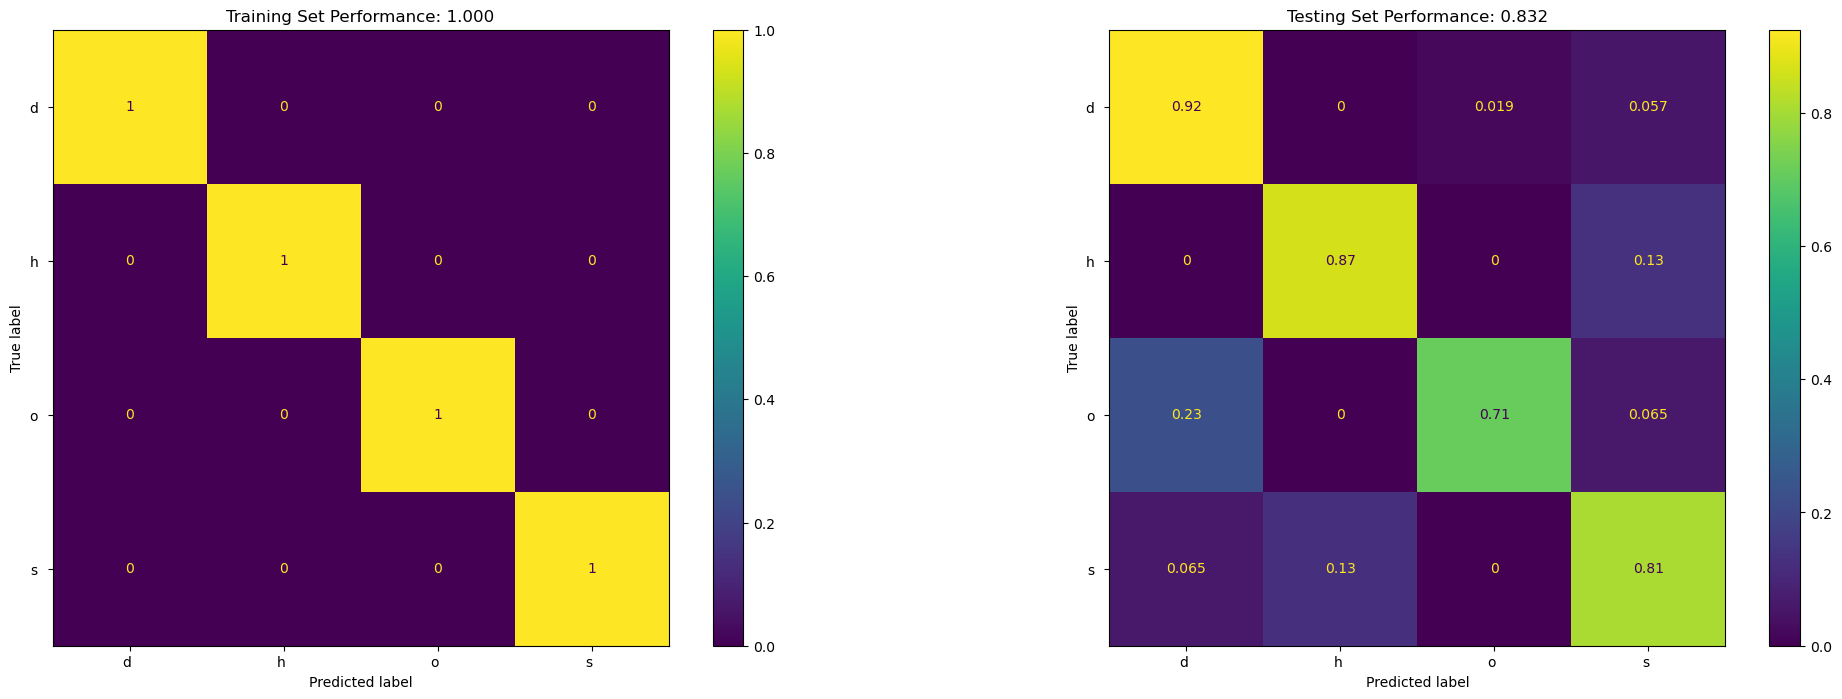

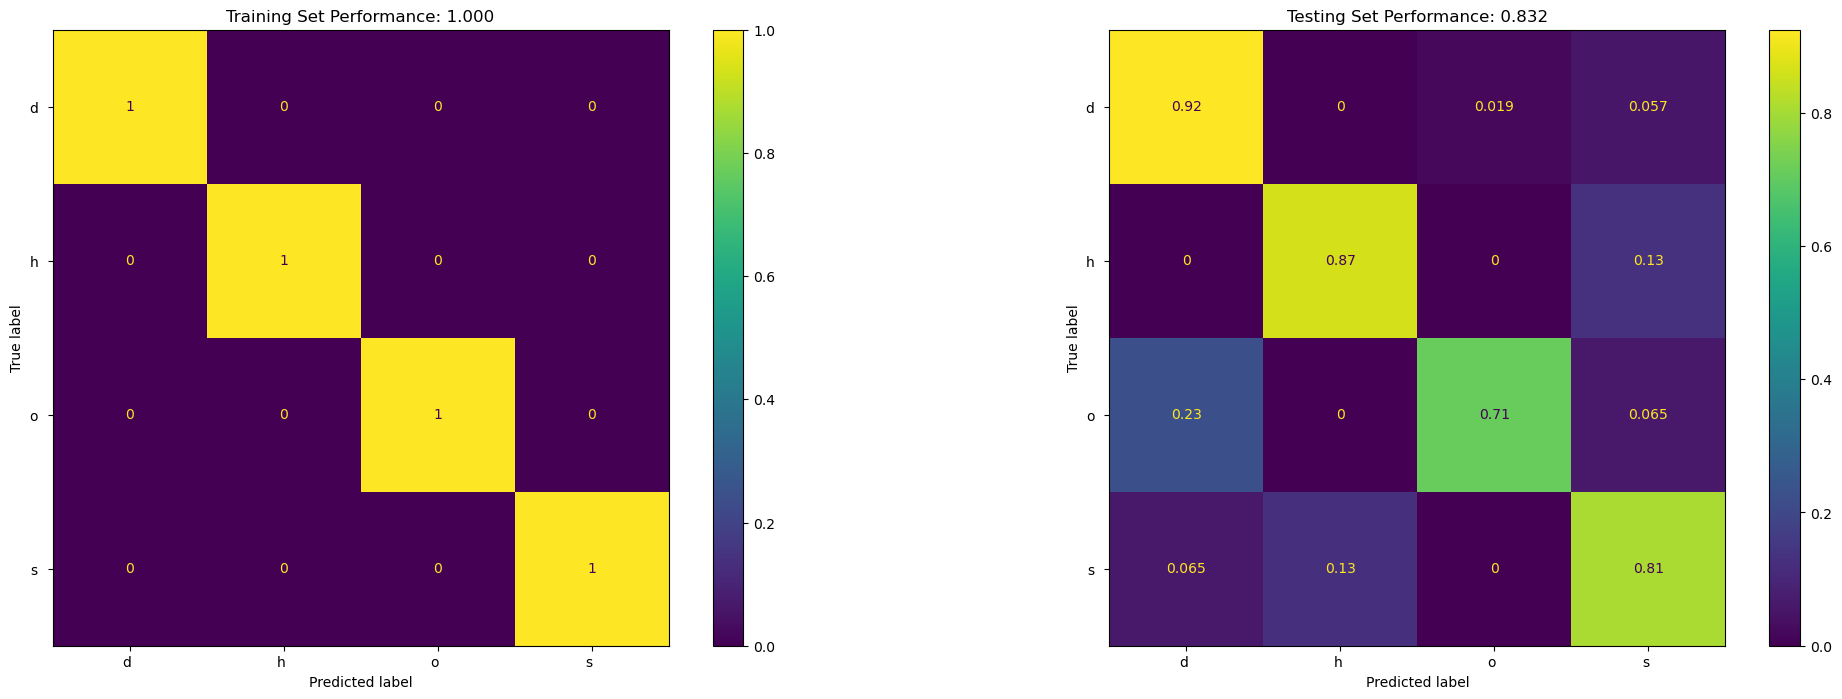

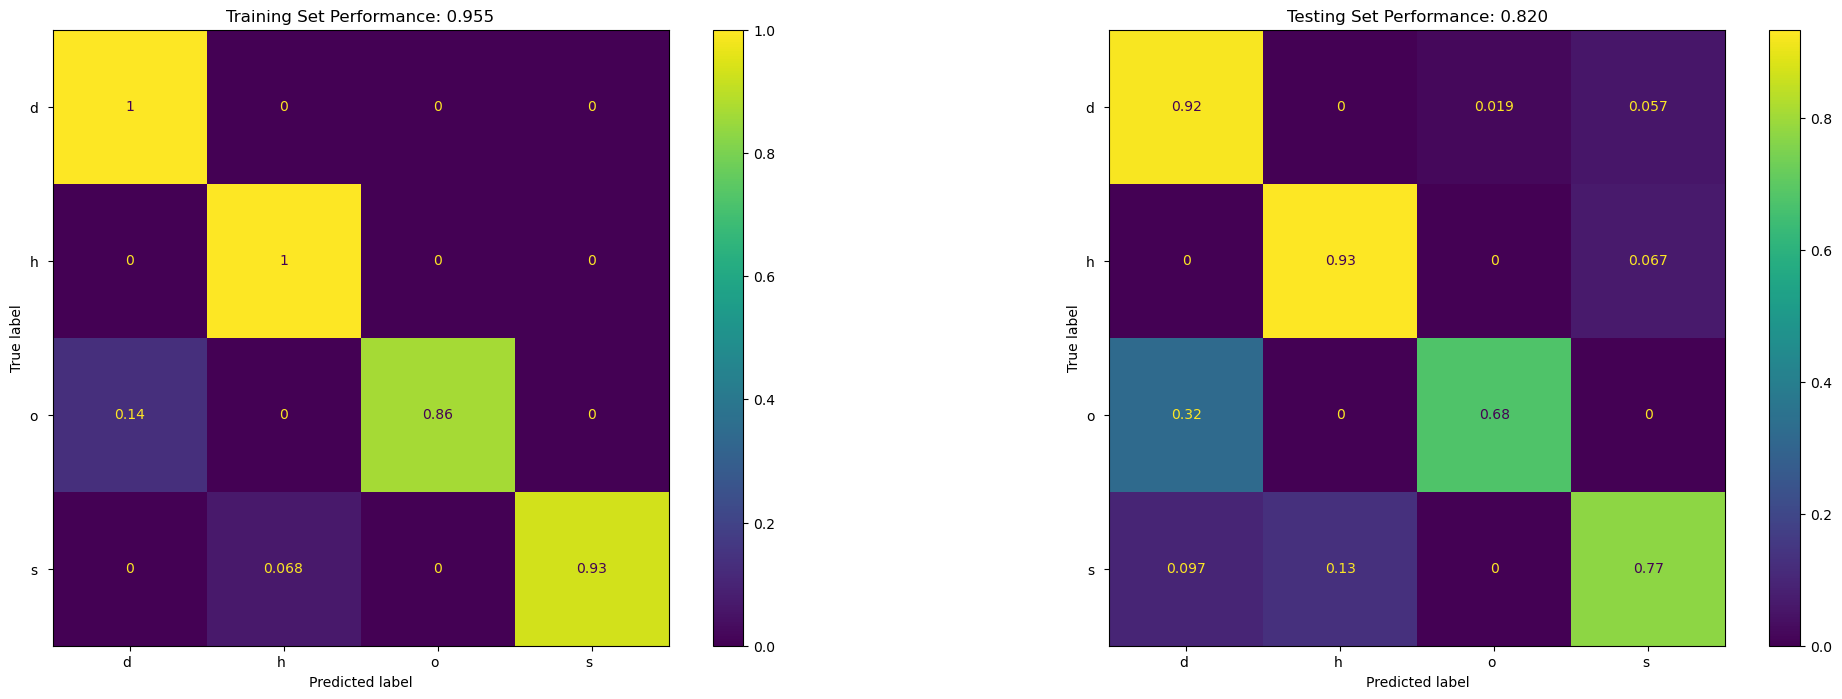

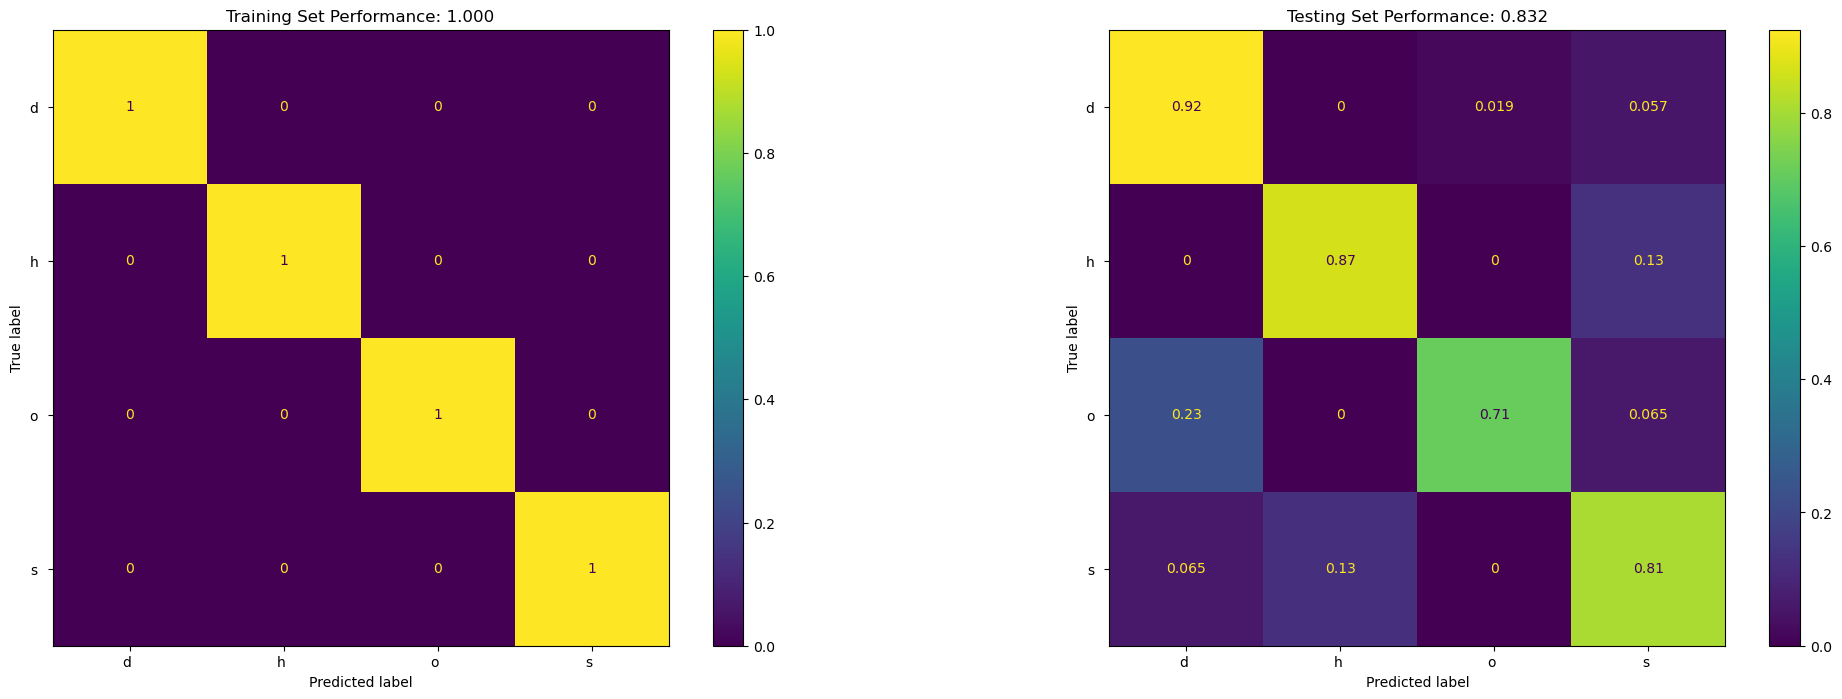

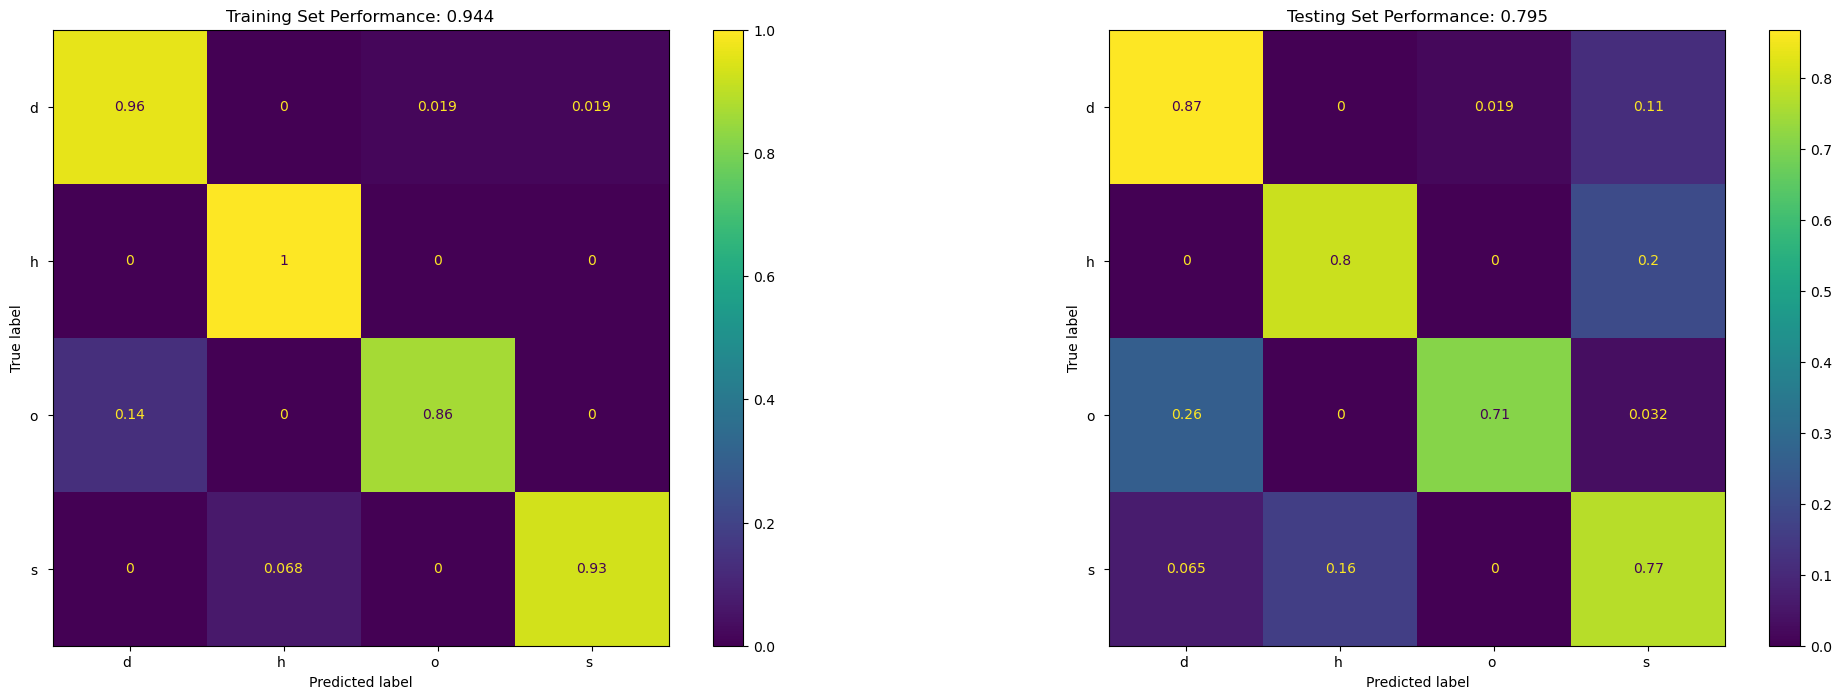

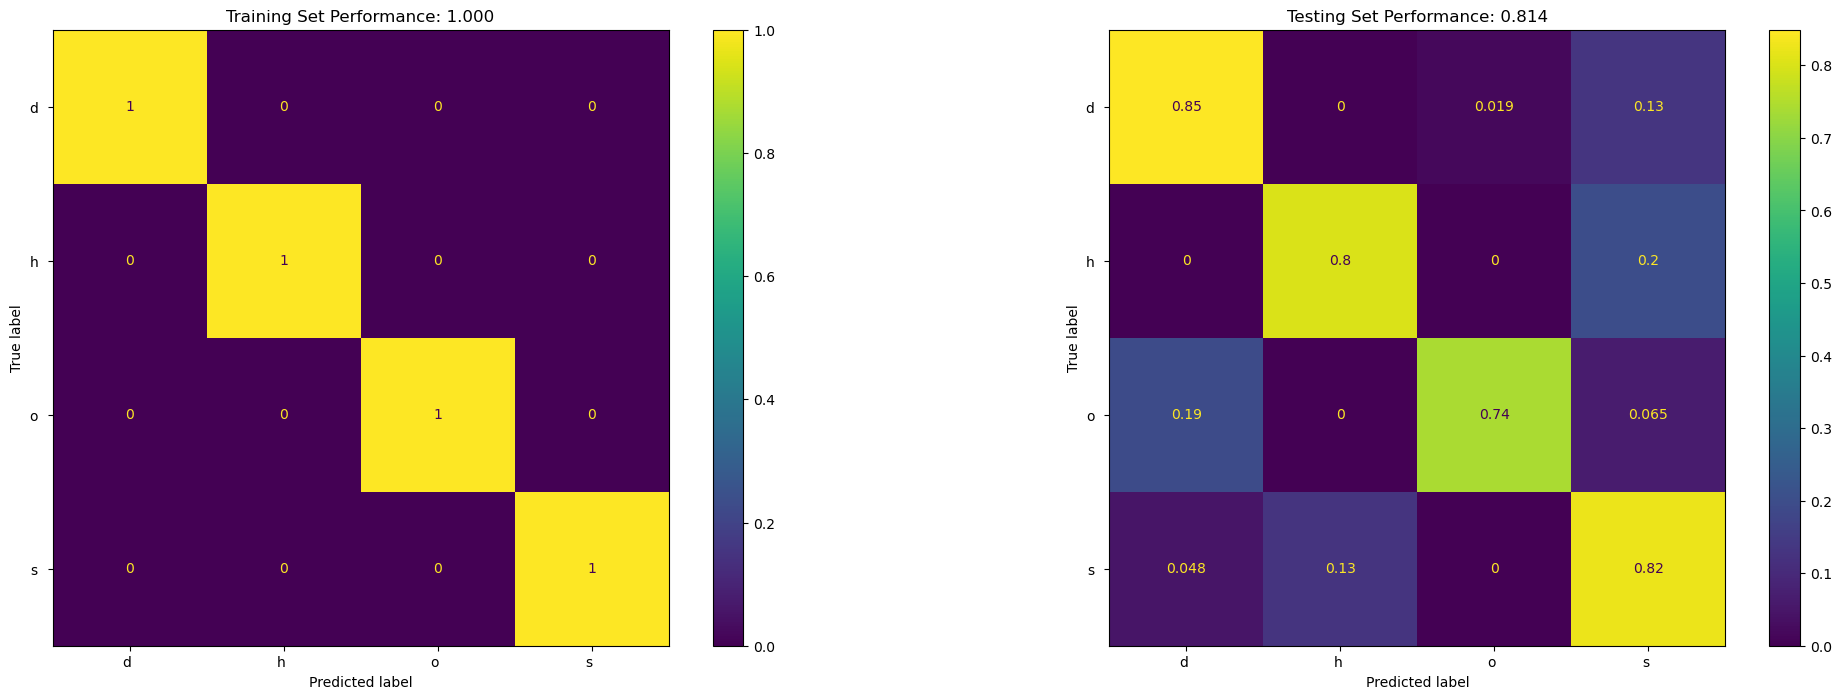

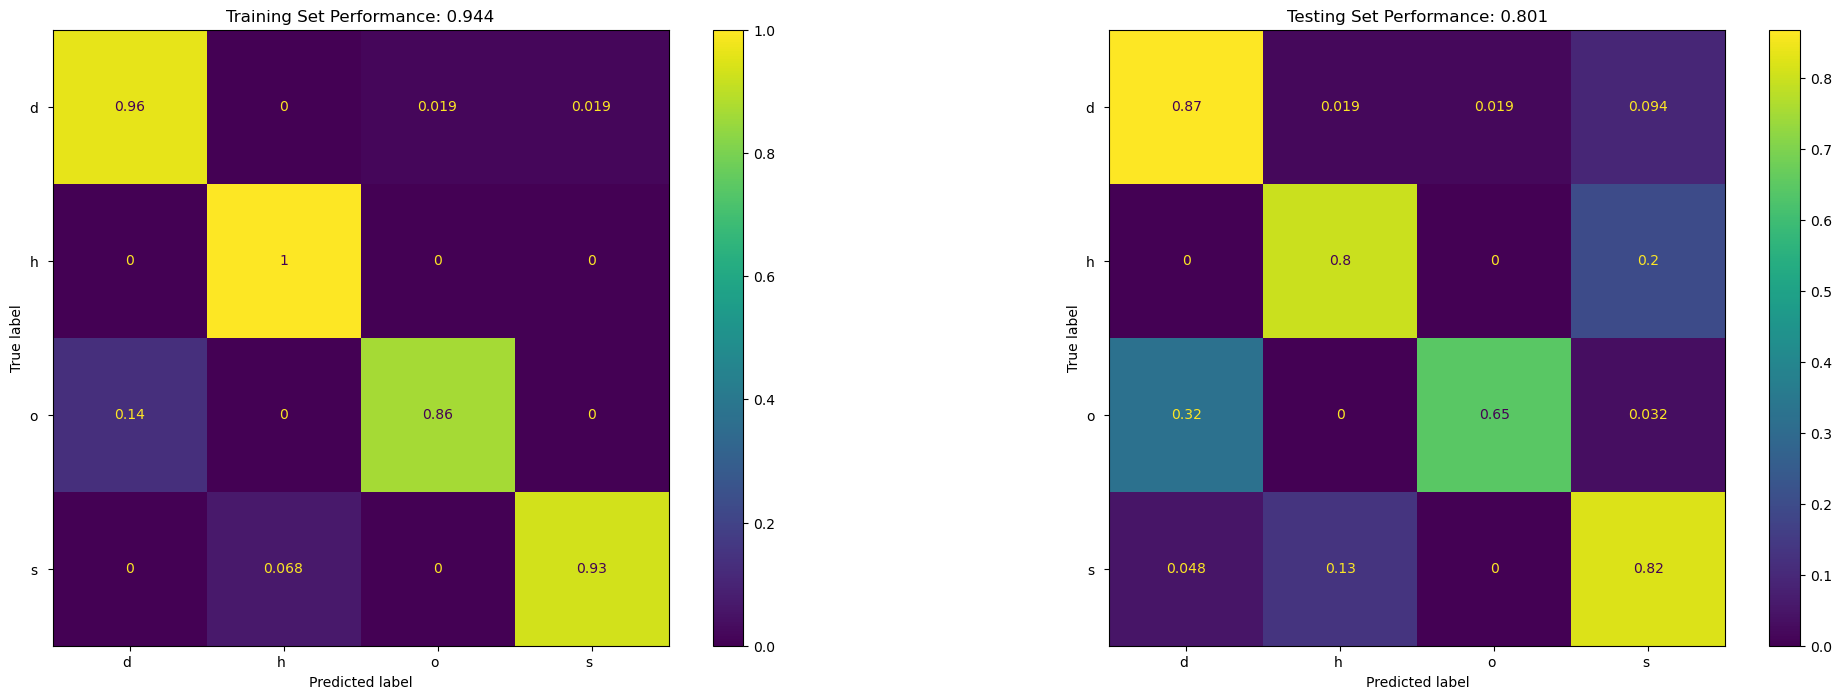

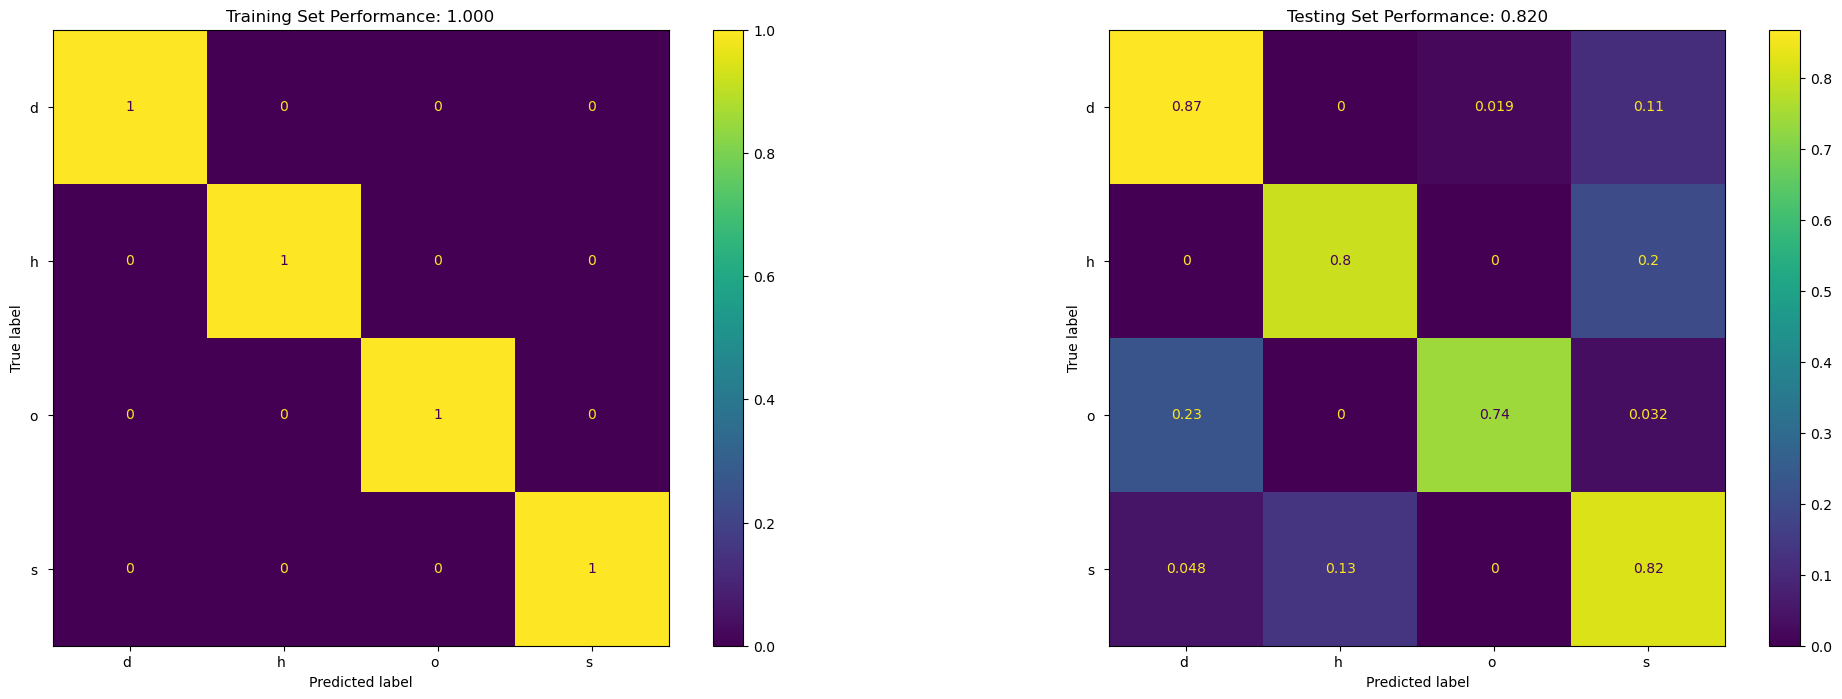

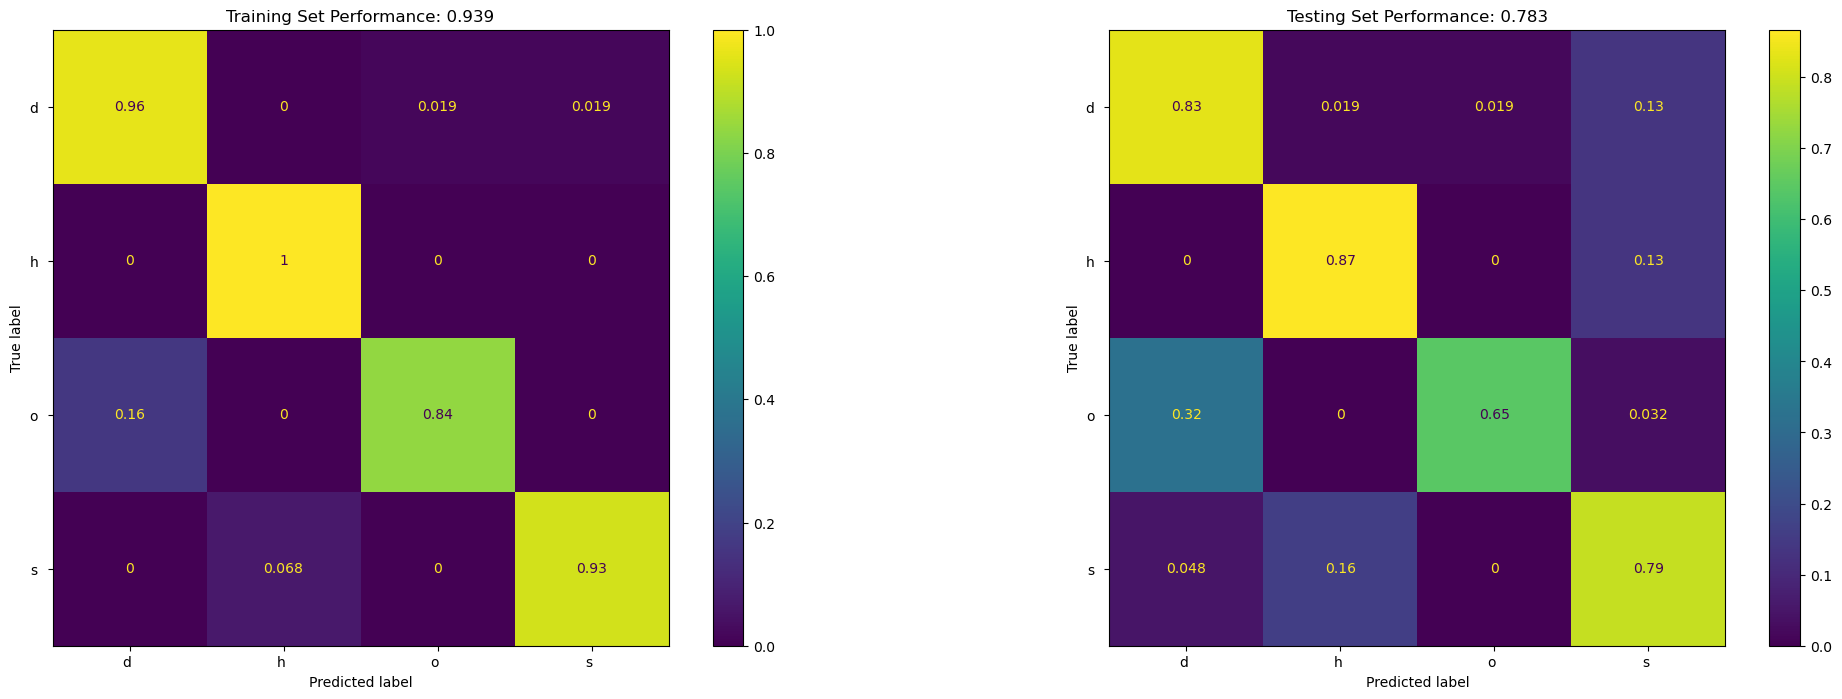

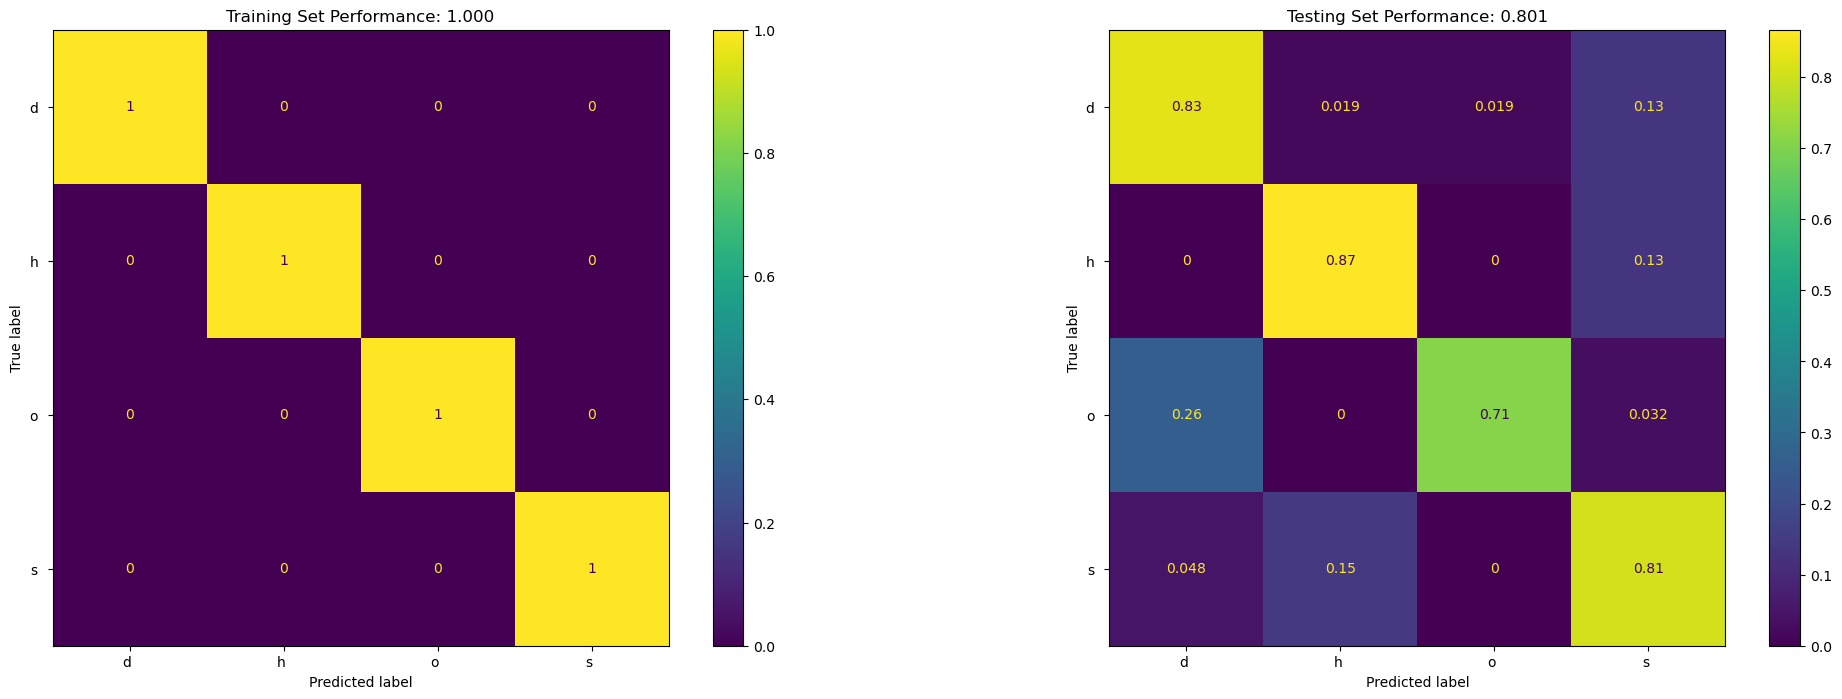

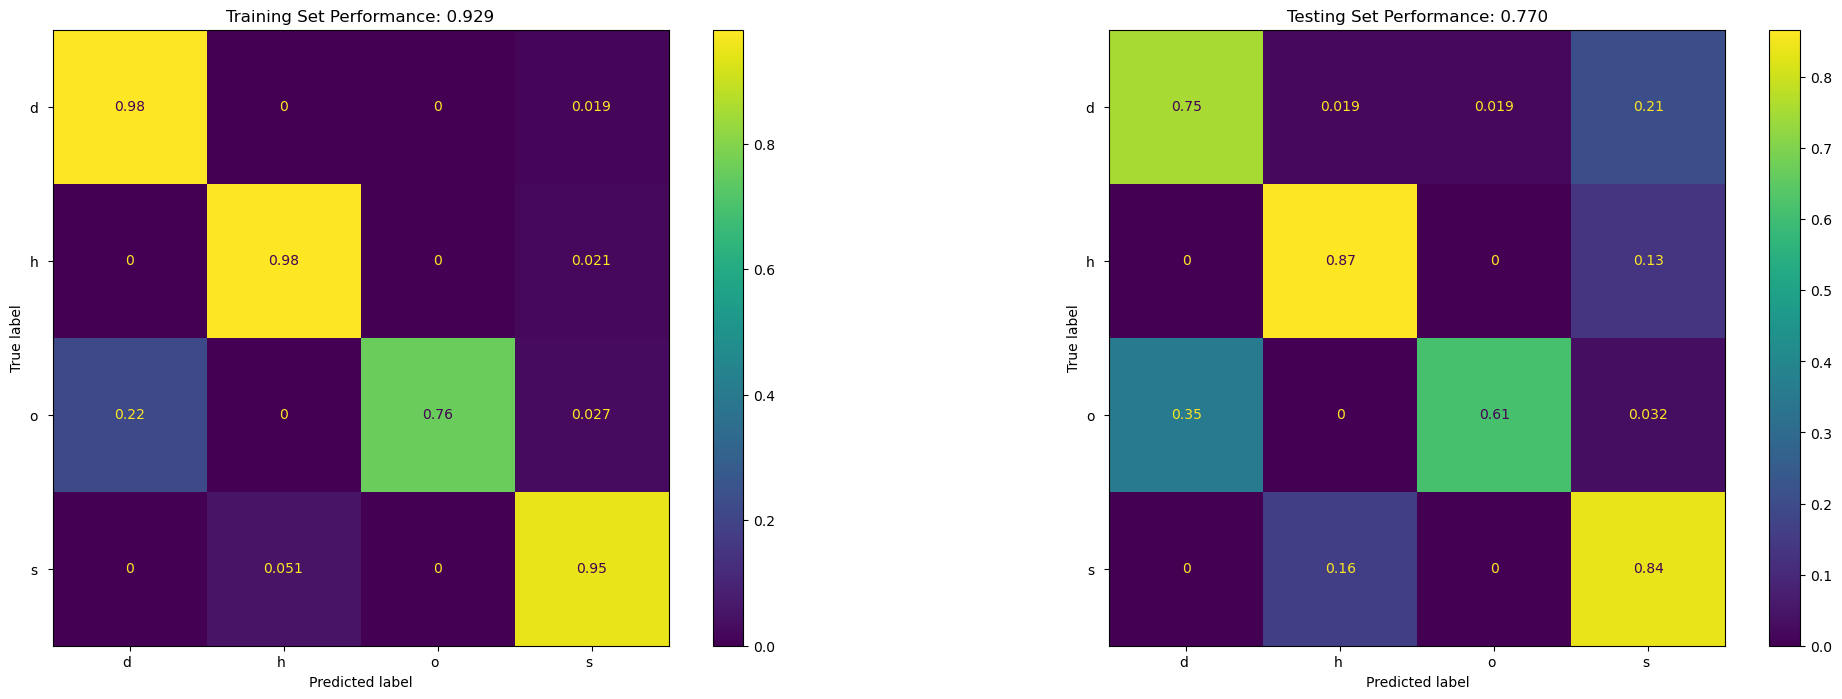

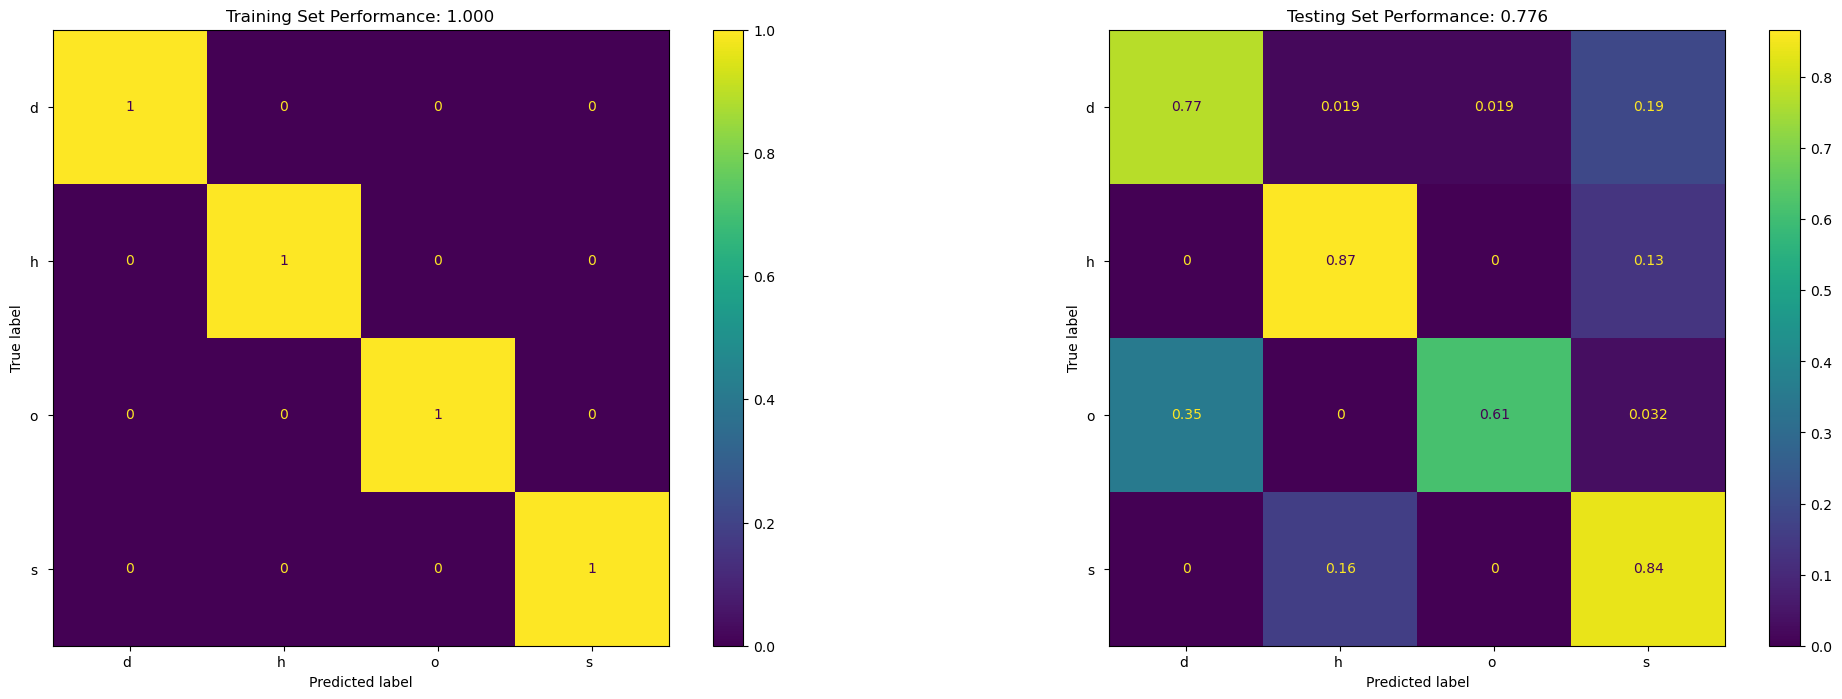

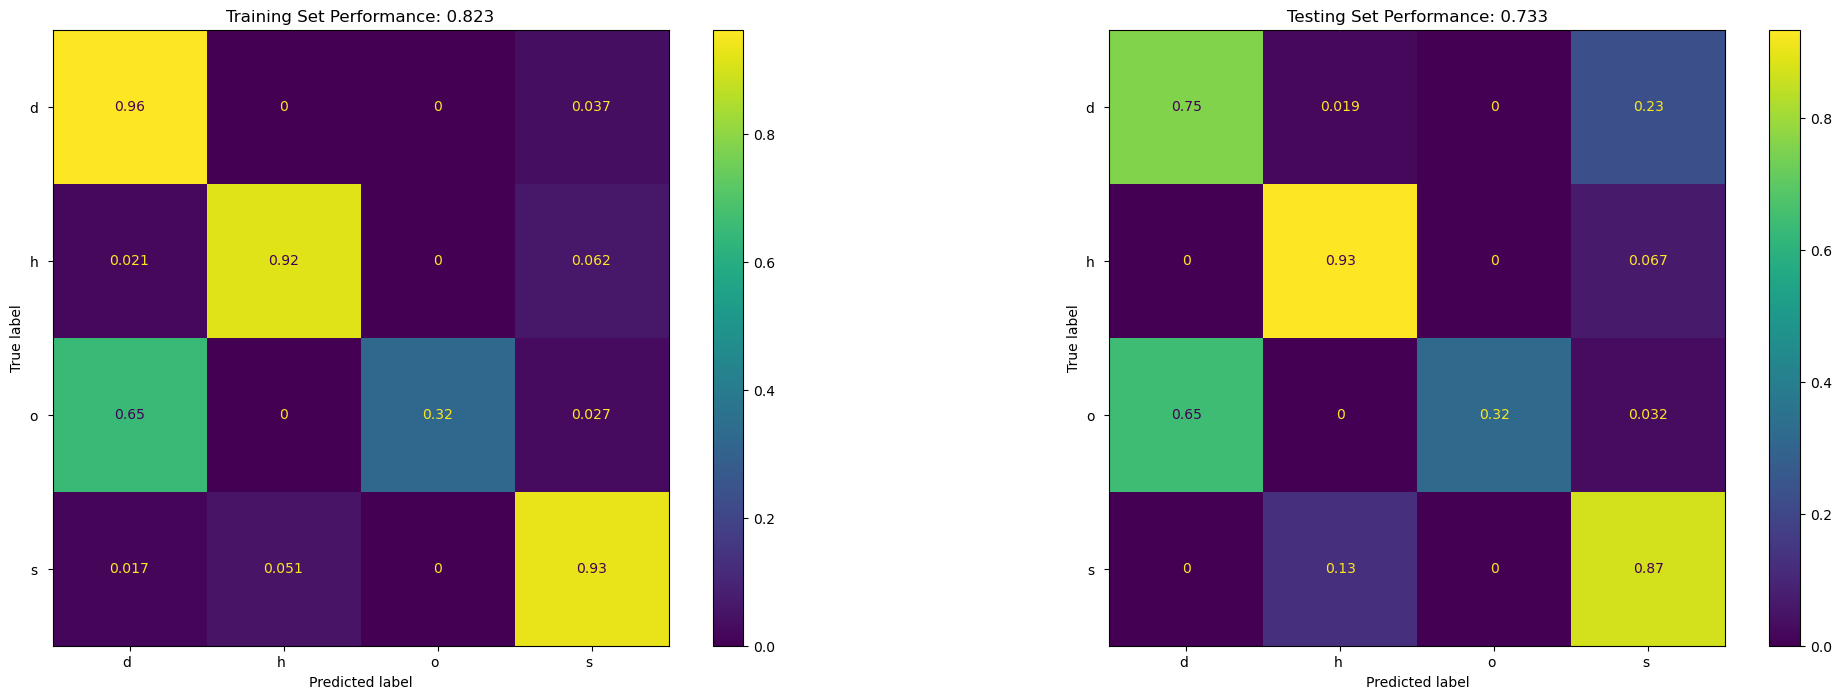

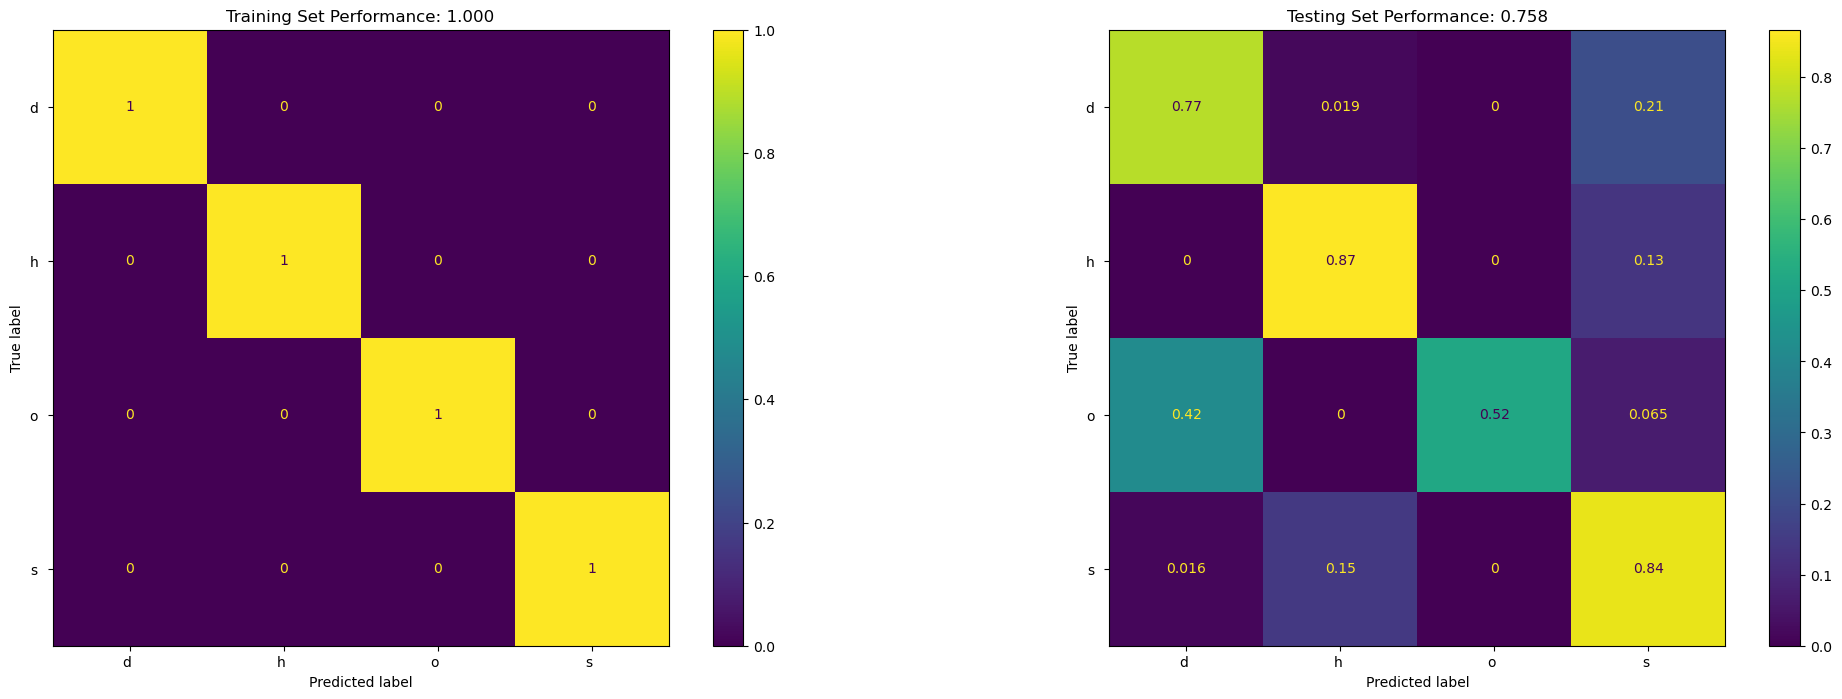

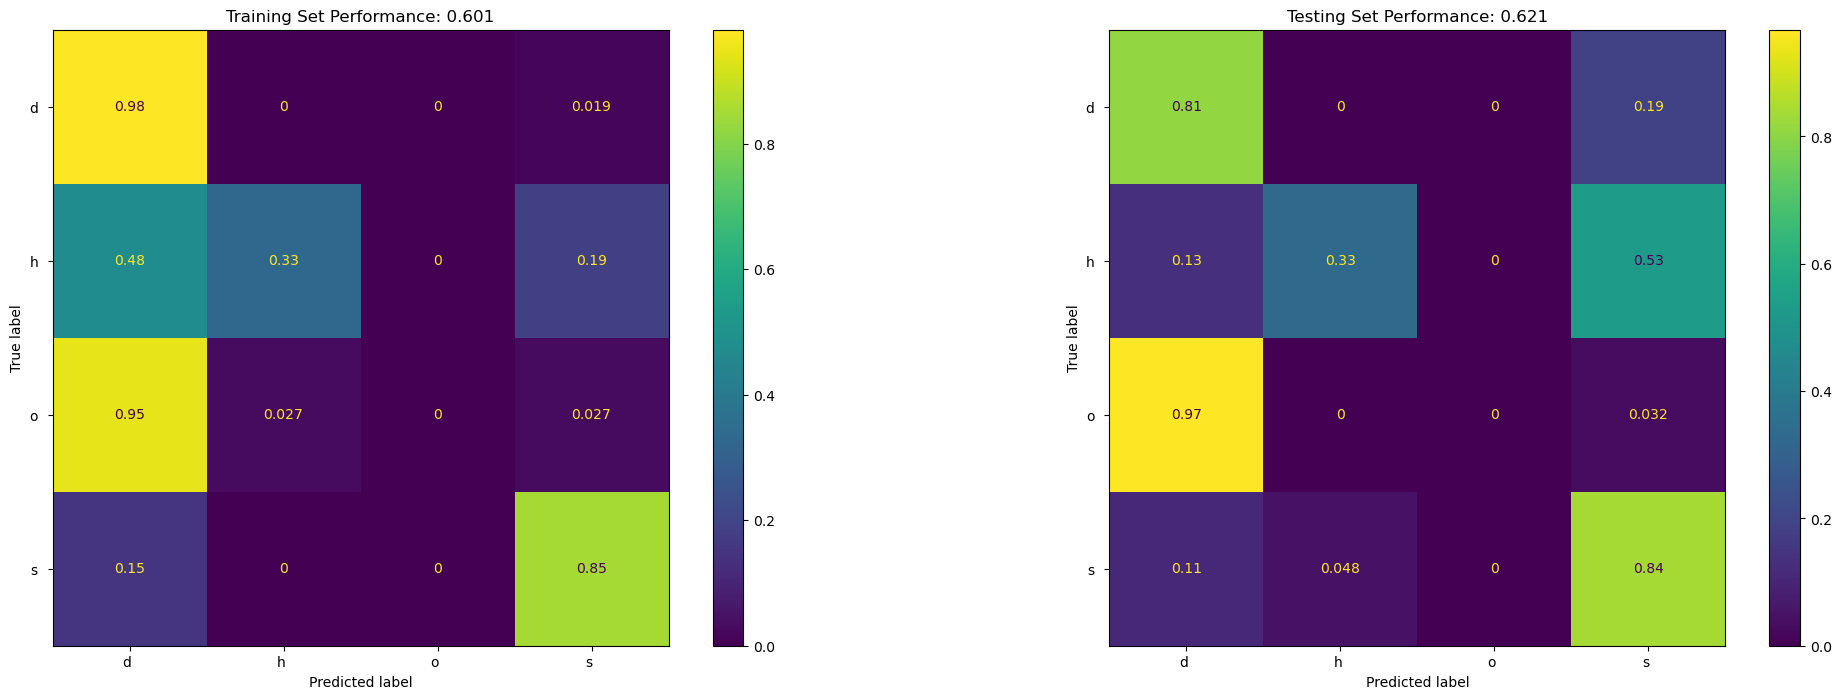

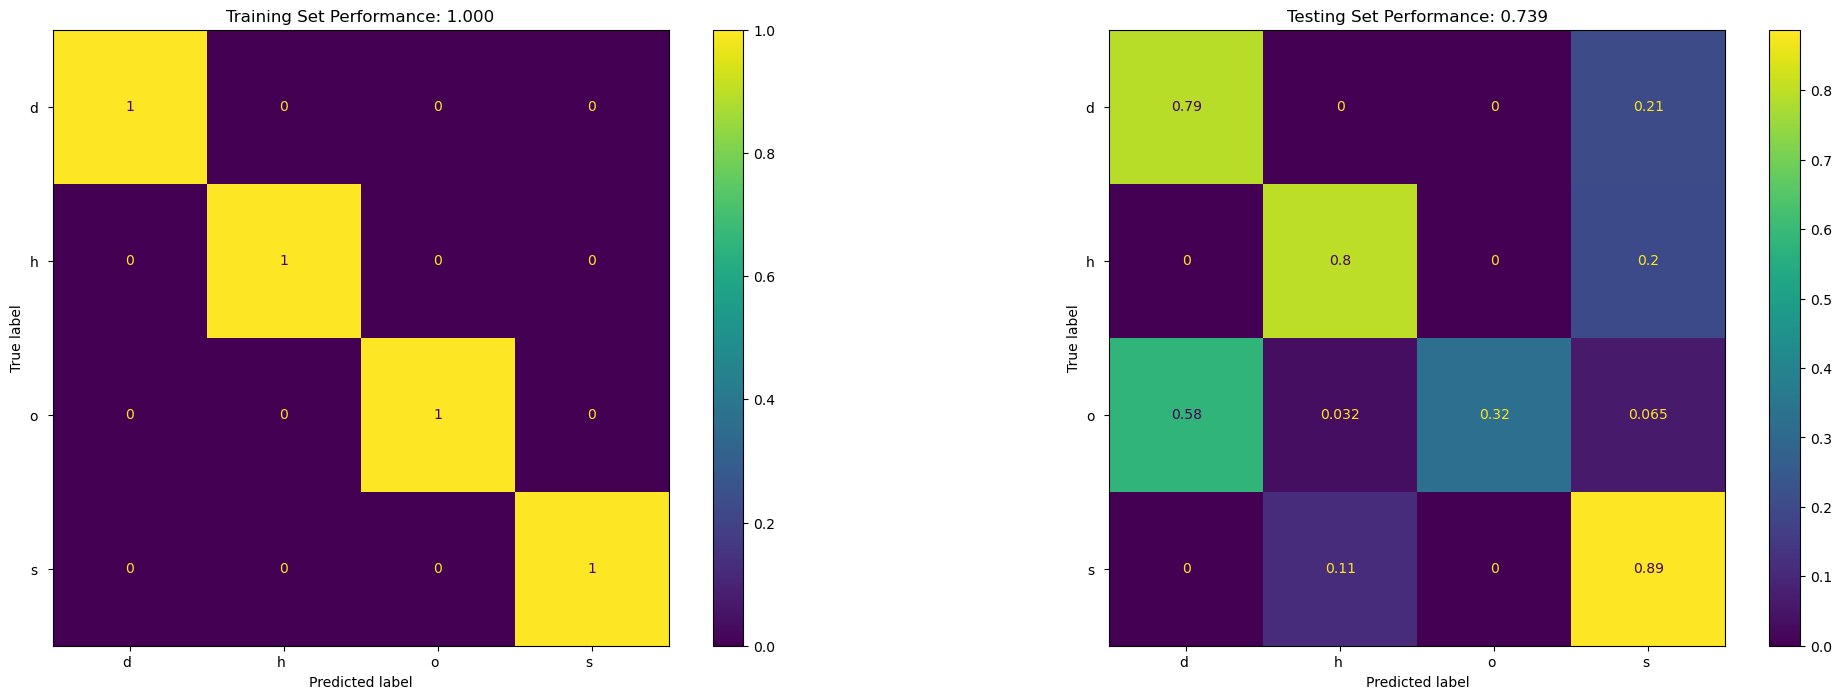

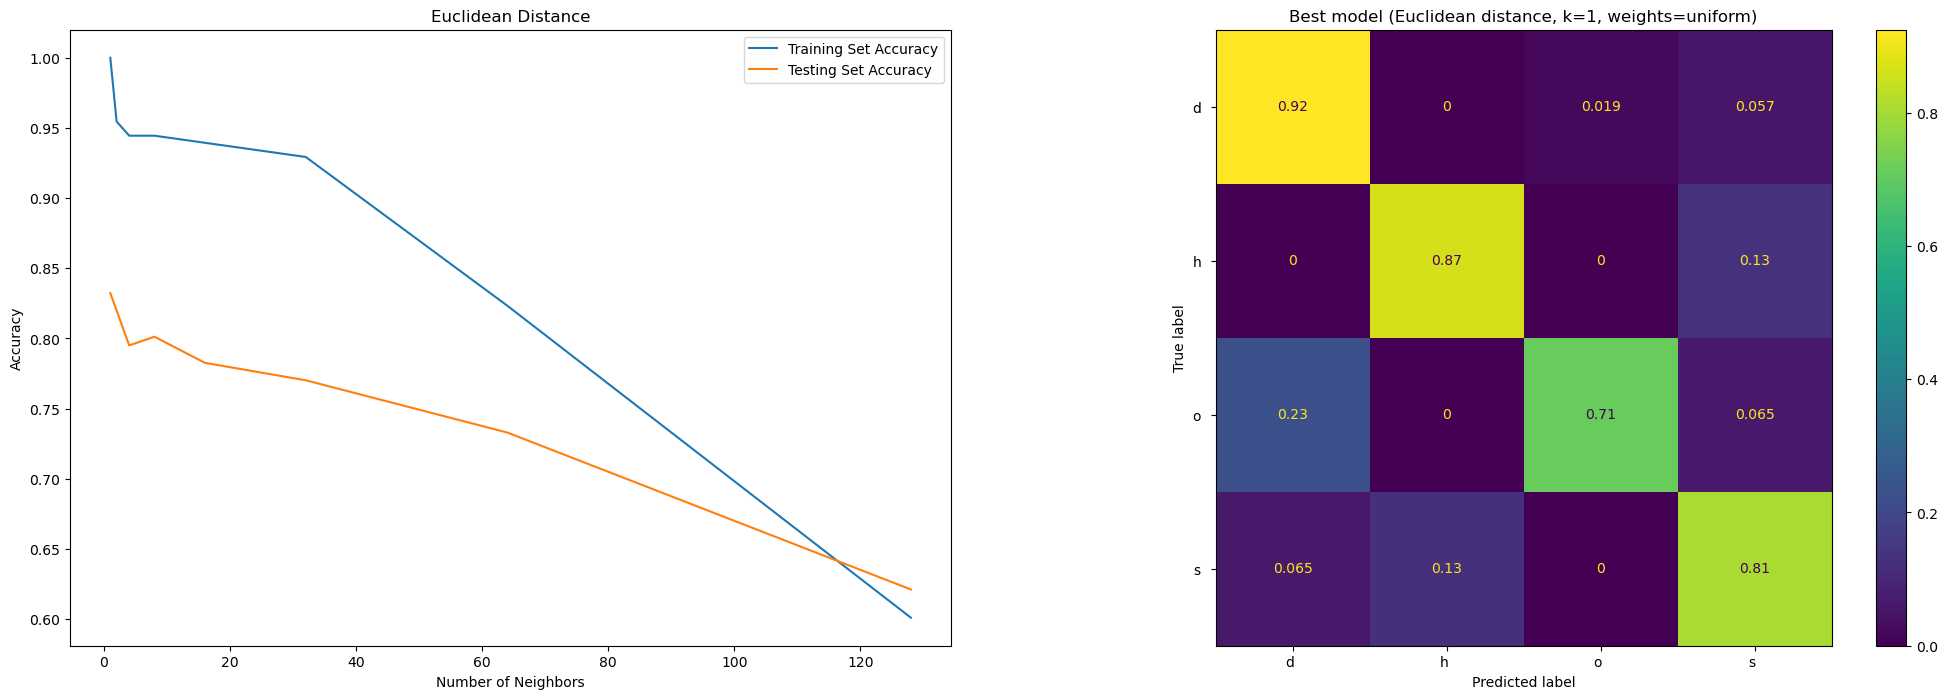

              precision    recall  f1-score   support

          d        0.80      0.91      0.85        53
          h        0.60      0.80      0.69        15
          o        0.95      0.68      0.79        31
          s        0.86      0.82      0.84        62

    accuracy                           0.82       161
   macro avg       0.80      0.80      0.79       161
weighted avg       0.84      0.82      0.82       161

              precision    recall  f1-score   support

          d        0.80      0.91      0.85        53
          h        0.60      0.80      0.69        15
          o        0.95      0.68      0.79        31
          s        0.86      0.82      0.84        62

    accuracy                           0.82       161
   macro avg       0.80      0.80      0.79       161
weighted avg       0.84      0.82      0.82       161

              precision    recall  f1-score   support

          d        0.79      0.94      0.86        53
          h        0.

/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          d        0.52      0.74      0.61        53
          h        0.40      0.27      0.32        15
          o        0.00      0.00      0.00        31
          s        0.70      0.85      0.77        62

    accuracy                           0.60       161
   macro avg       0.40      0.46      0.42       161
weighted avg       0.48      0.60      0.53       161

              precision    recall  f1-score   support

          d        0.69      0.77      0.73        53
          h        0.63      0.80      0.71        15
          o        1.00      0.42      0.59        31
          s        0.79      0.89      0.83        62

    accuracy                           0.75       161
   macro avg       0.78      0.72      0.72       161
weighted avg       0.78      0.75      0.74       161



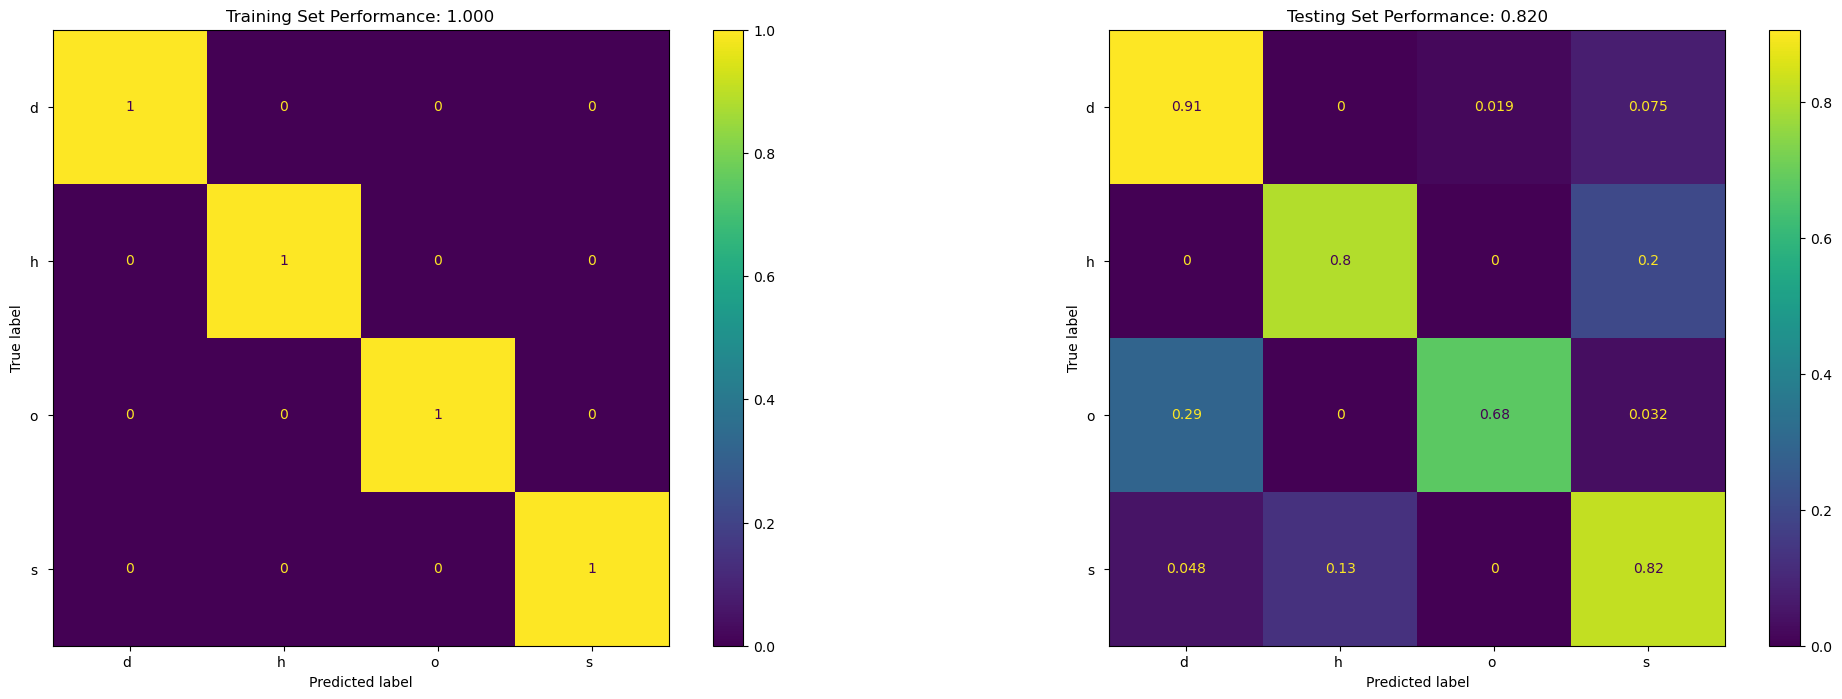

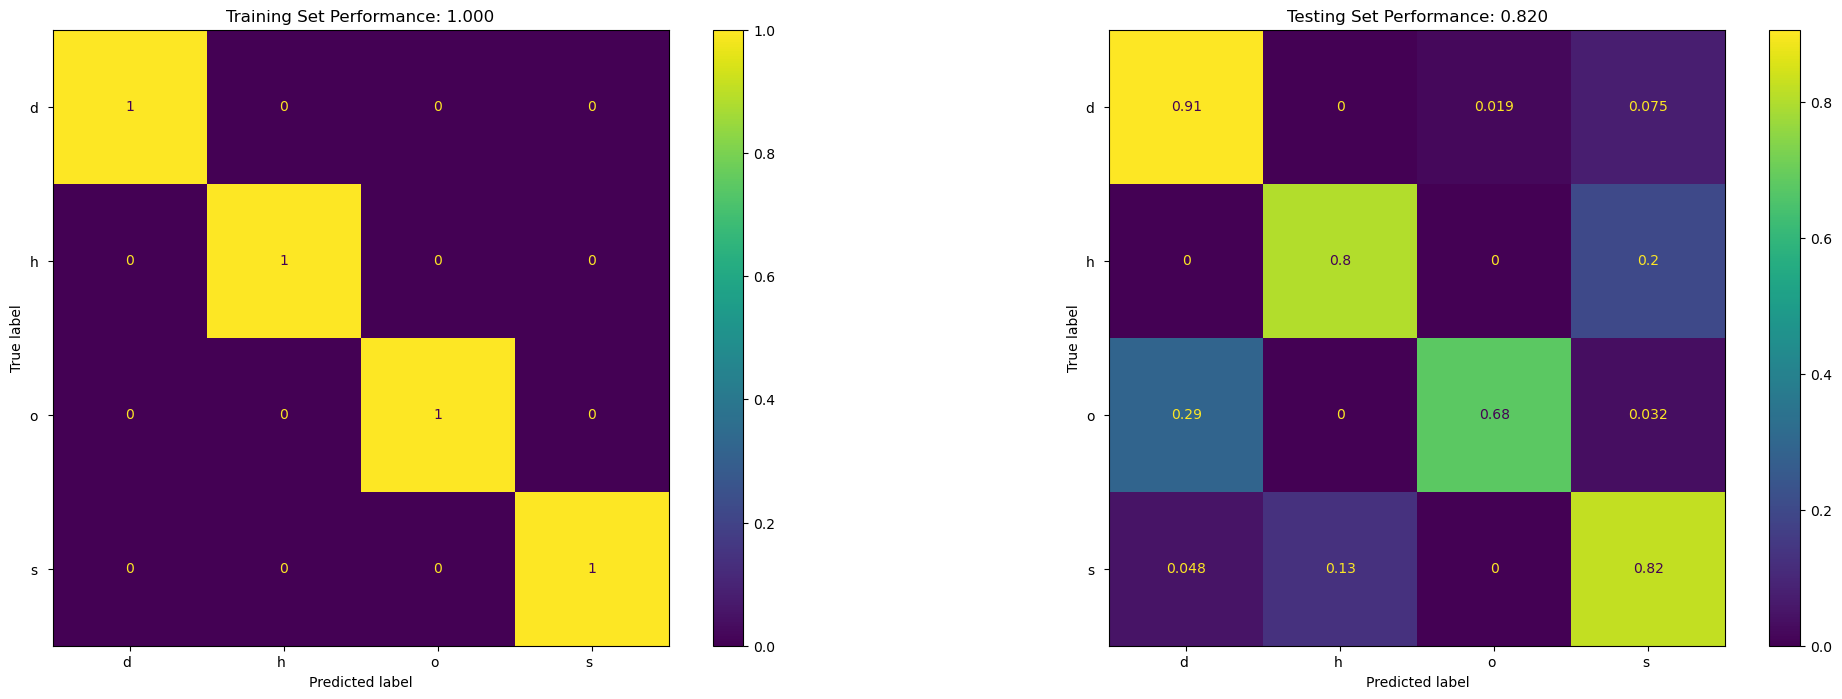

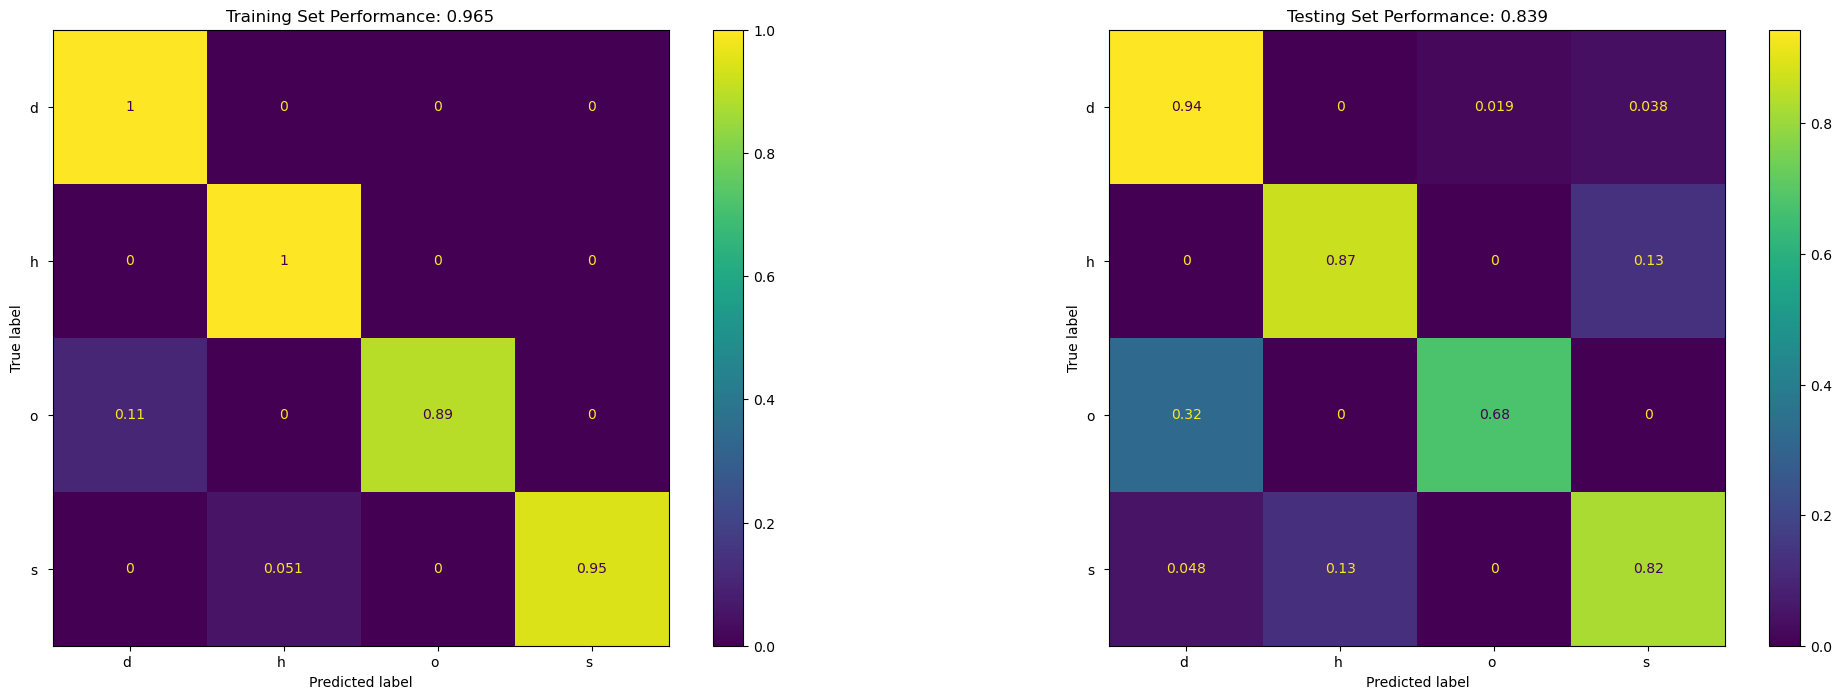

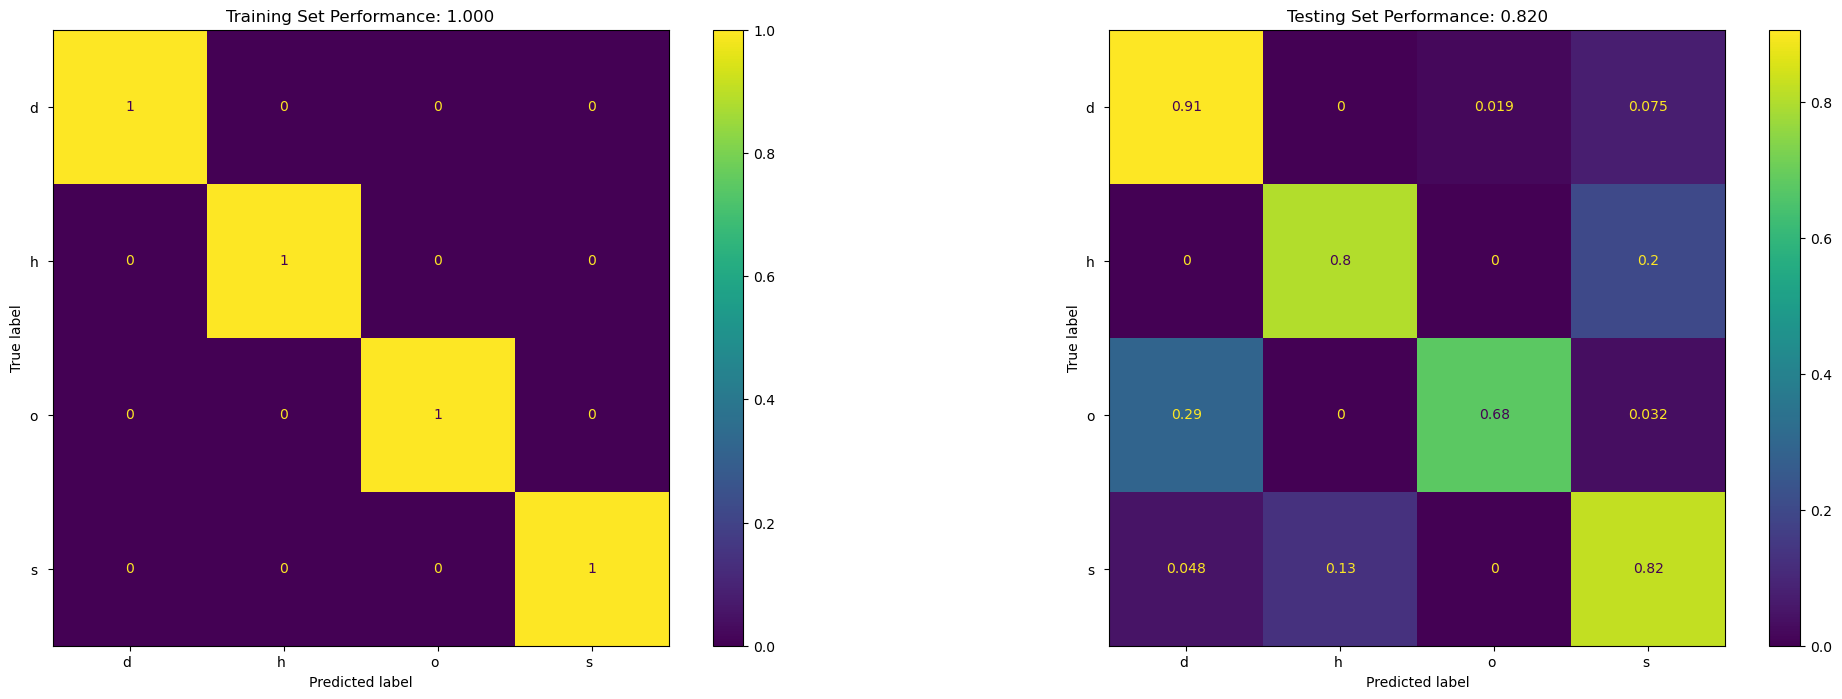

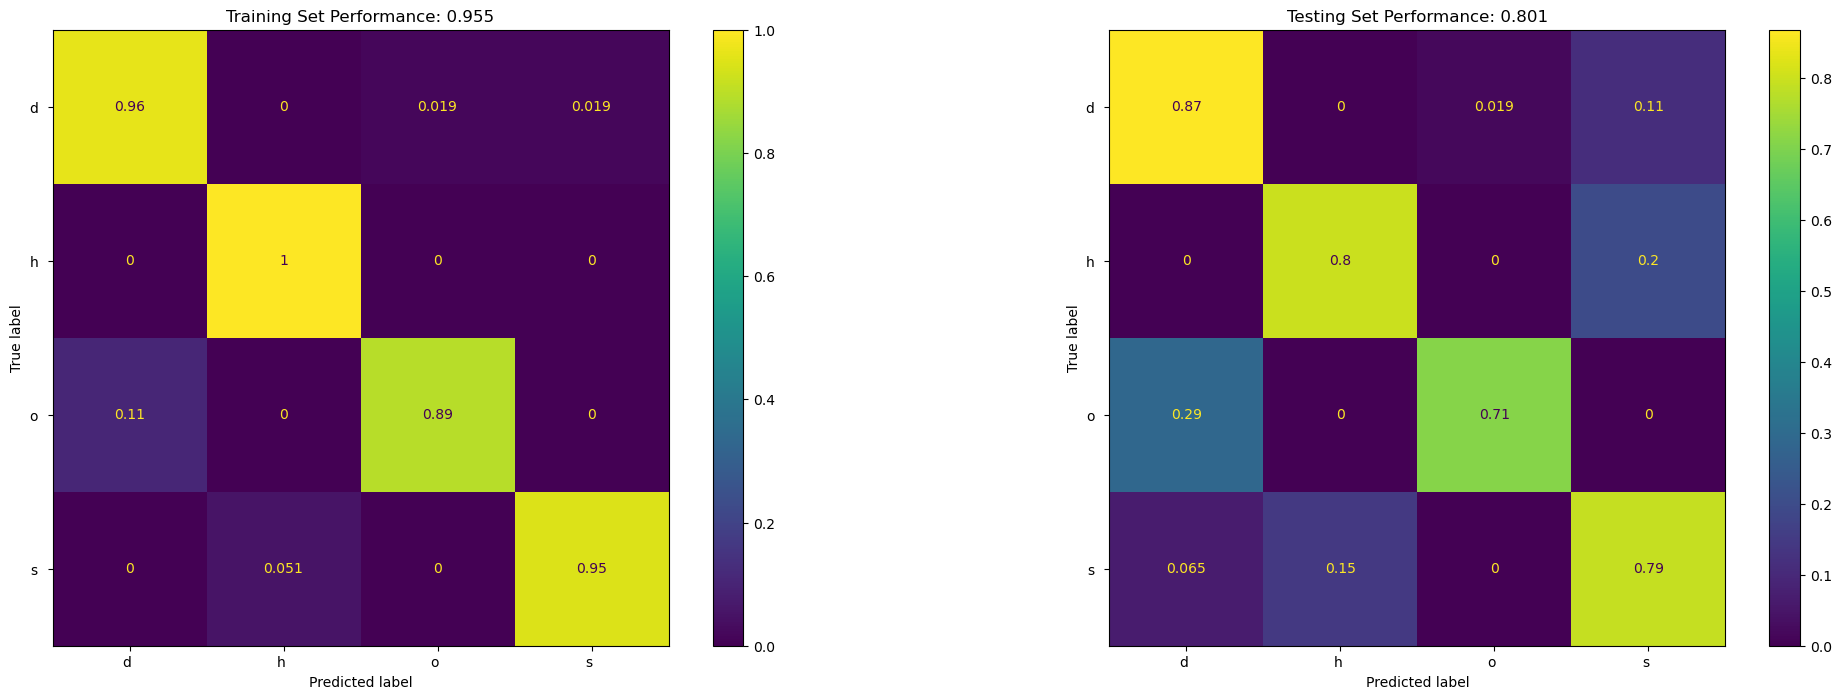

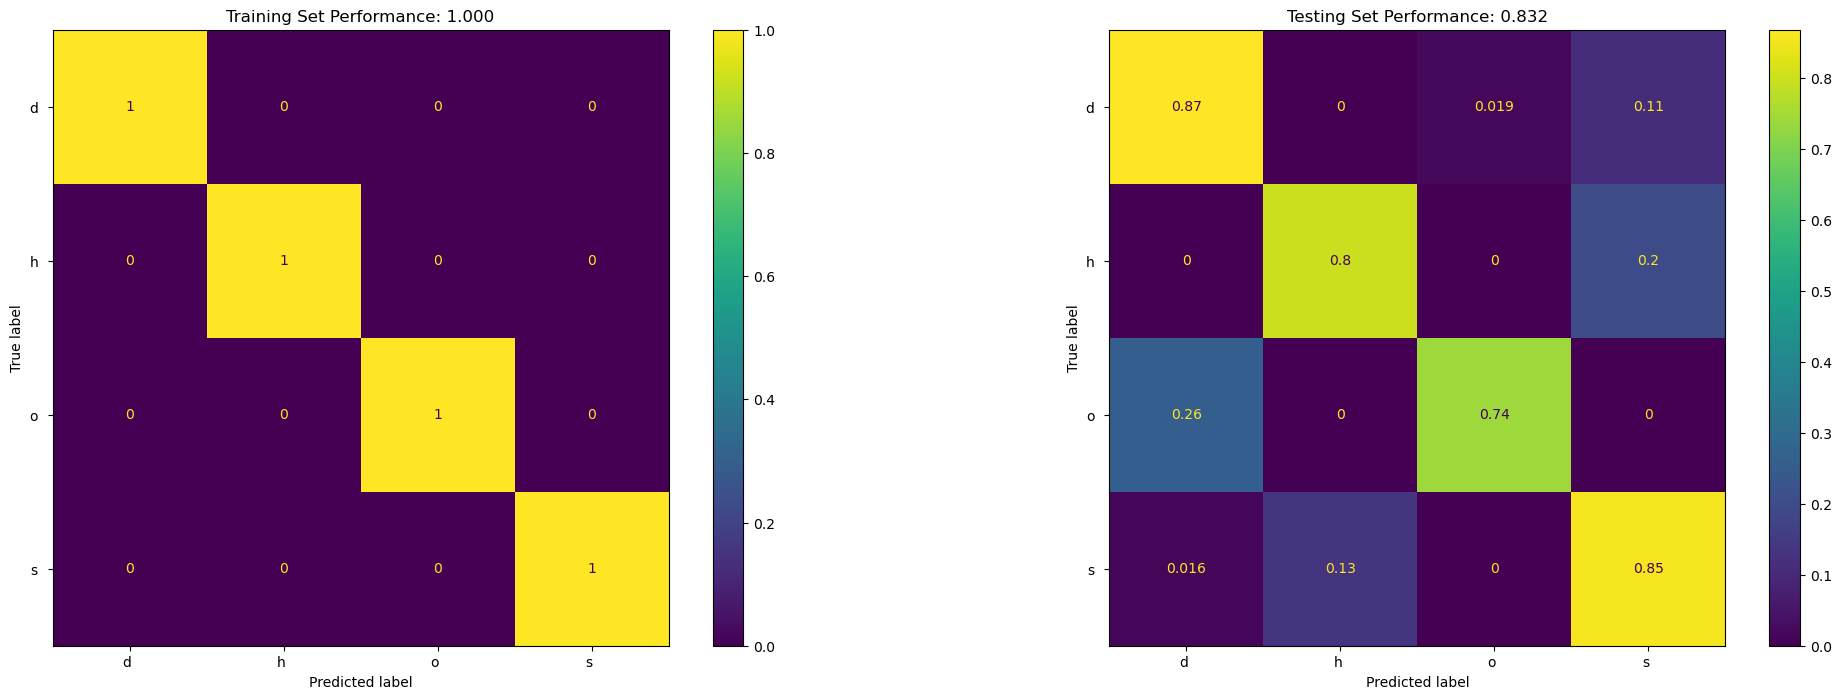

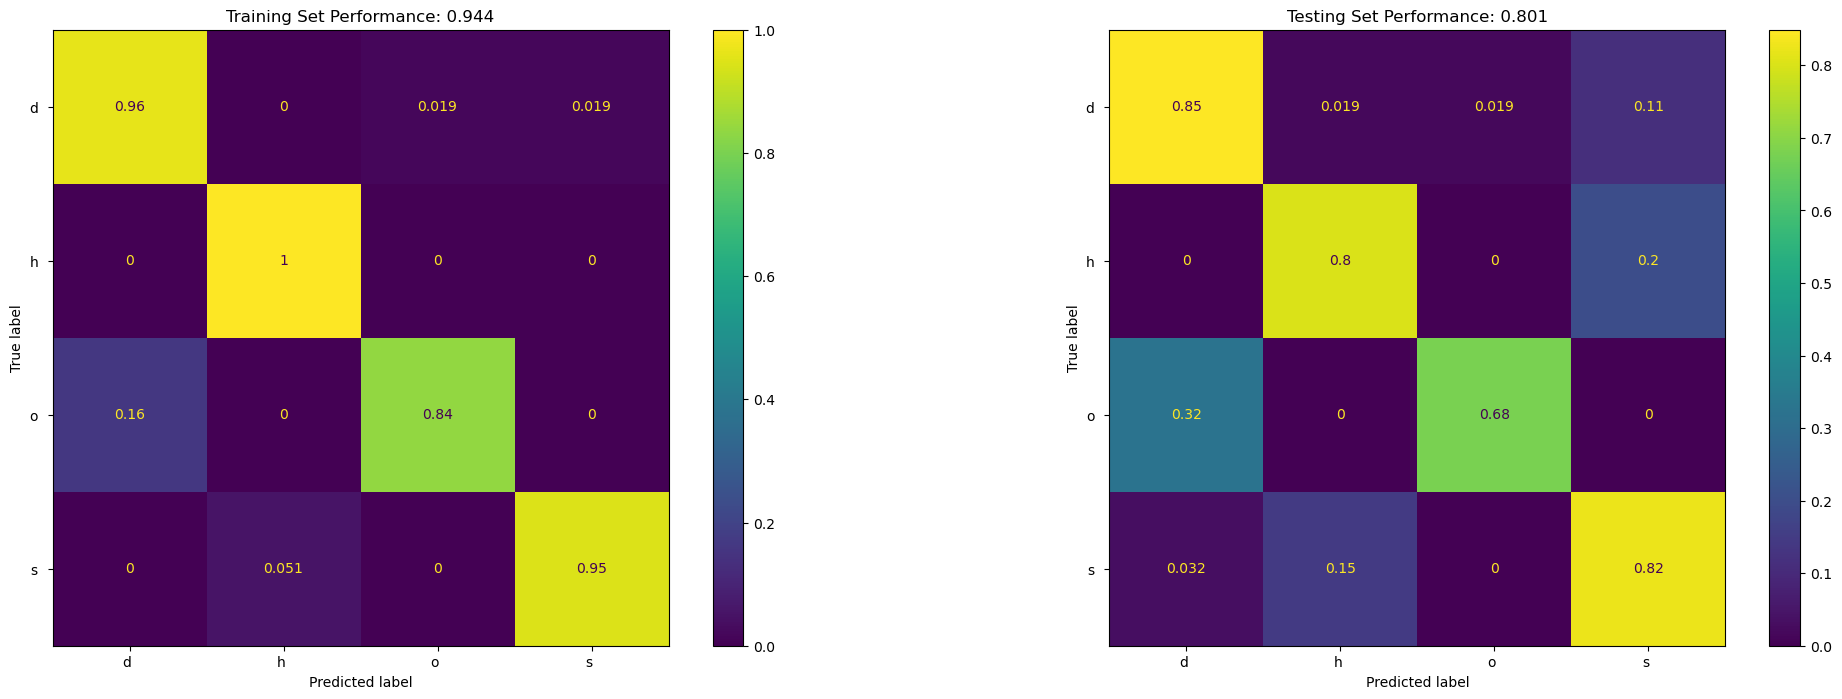

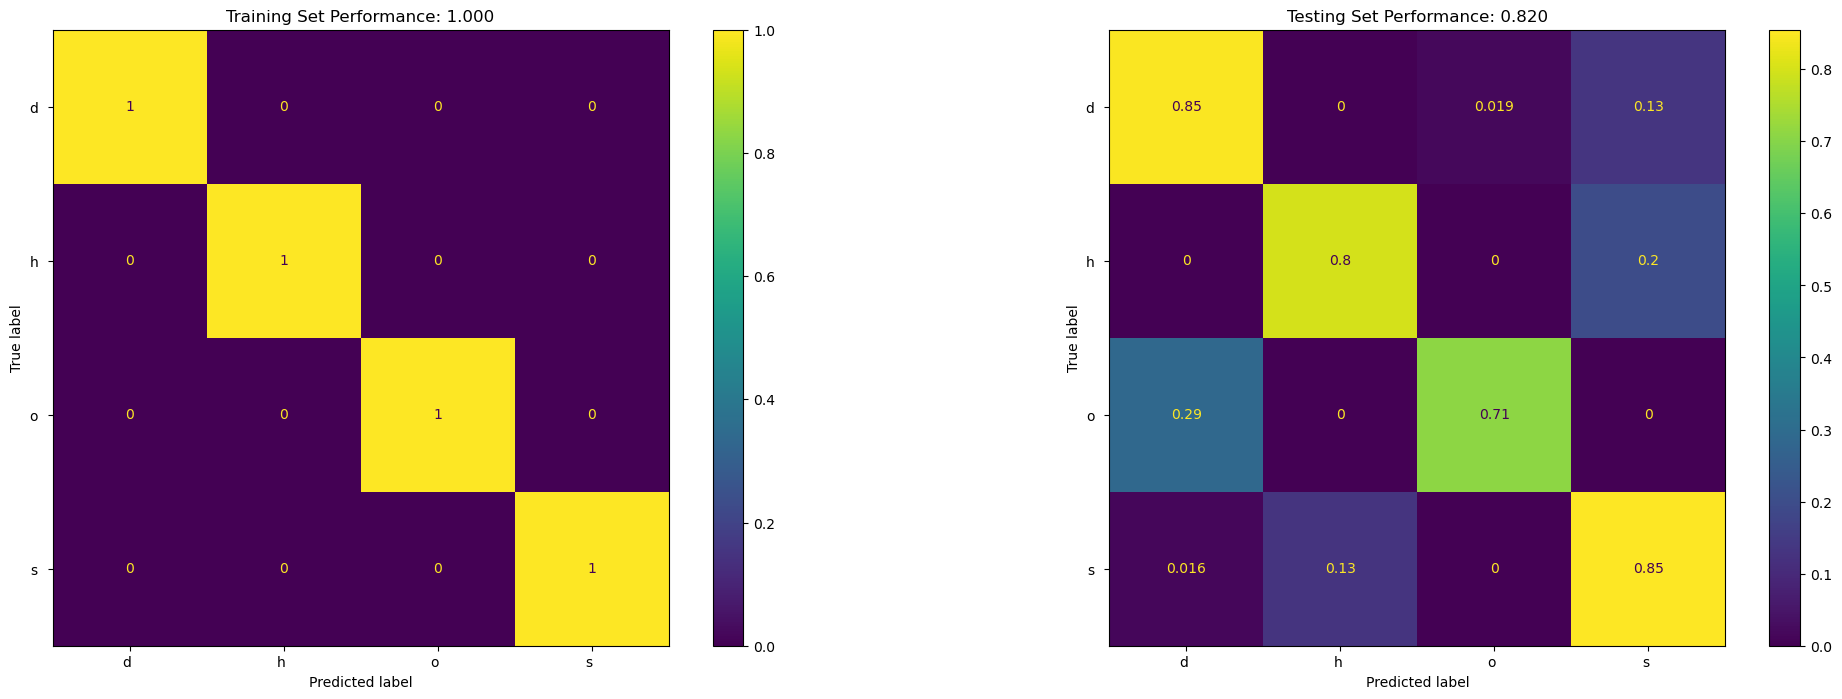

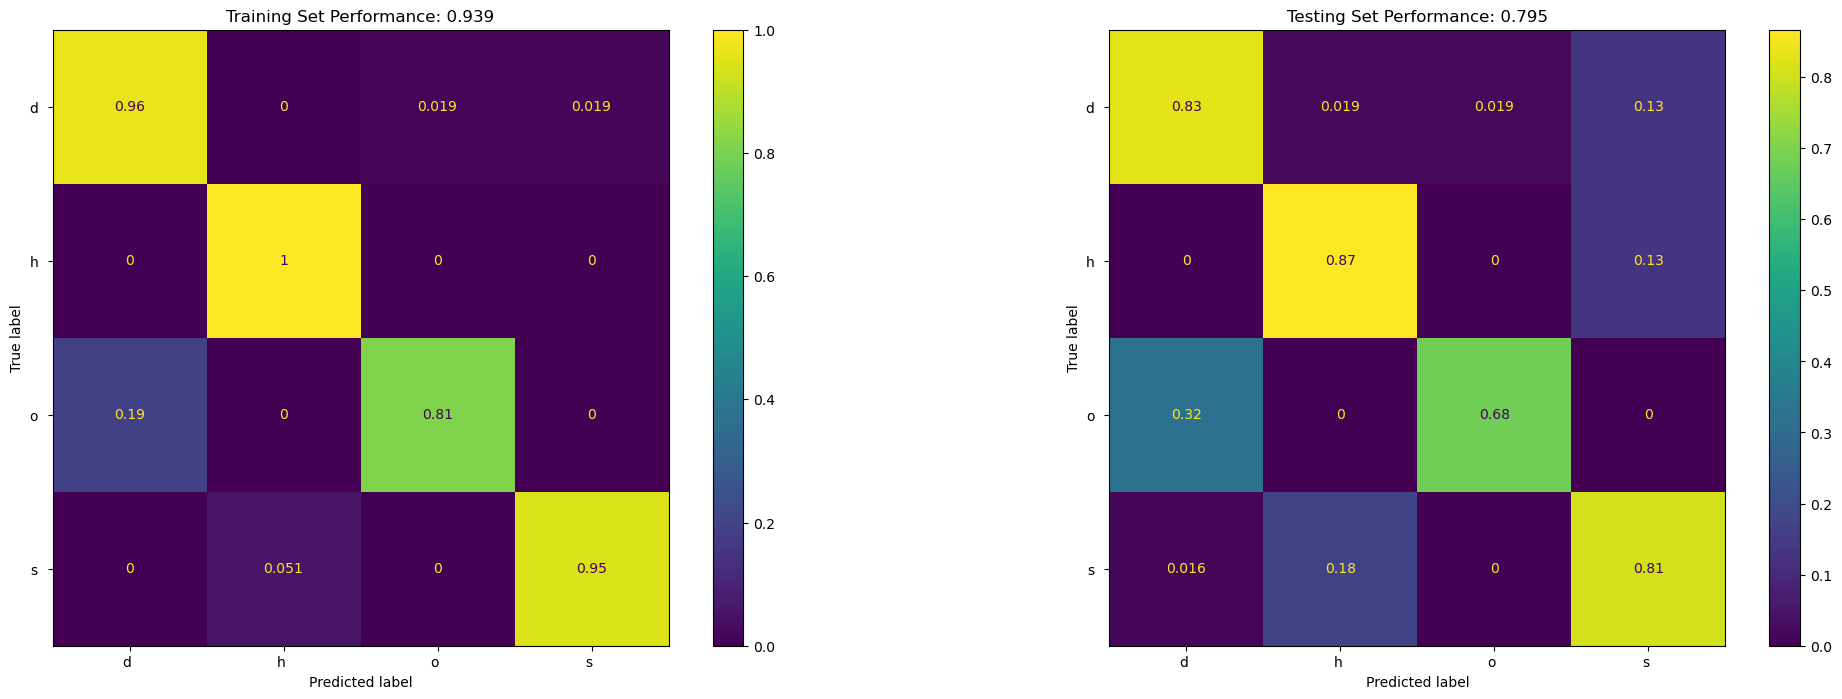

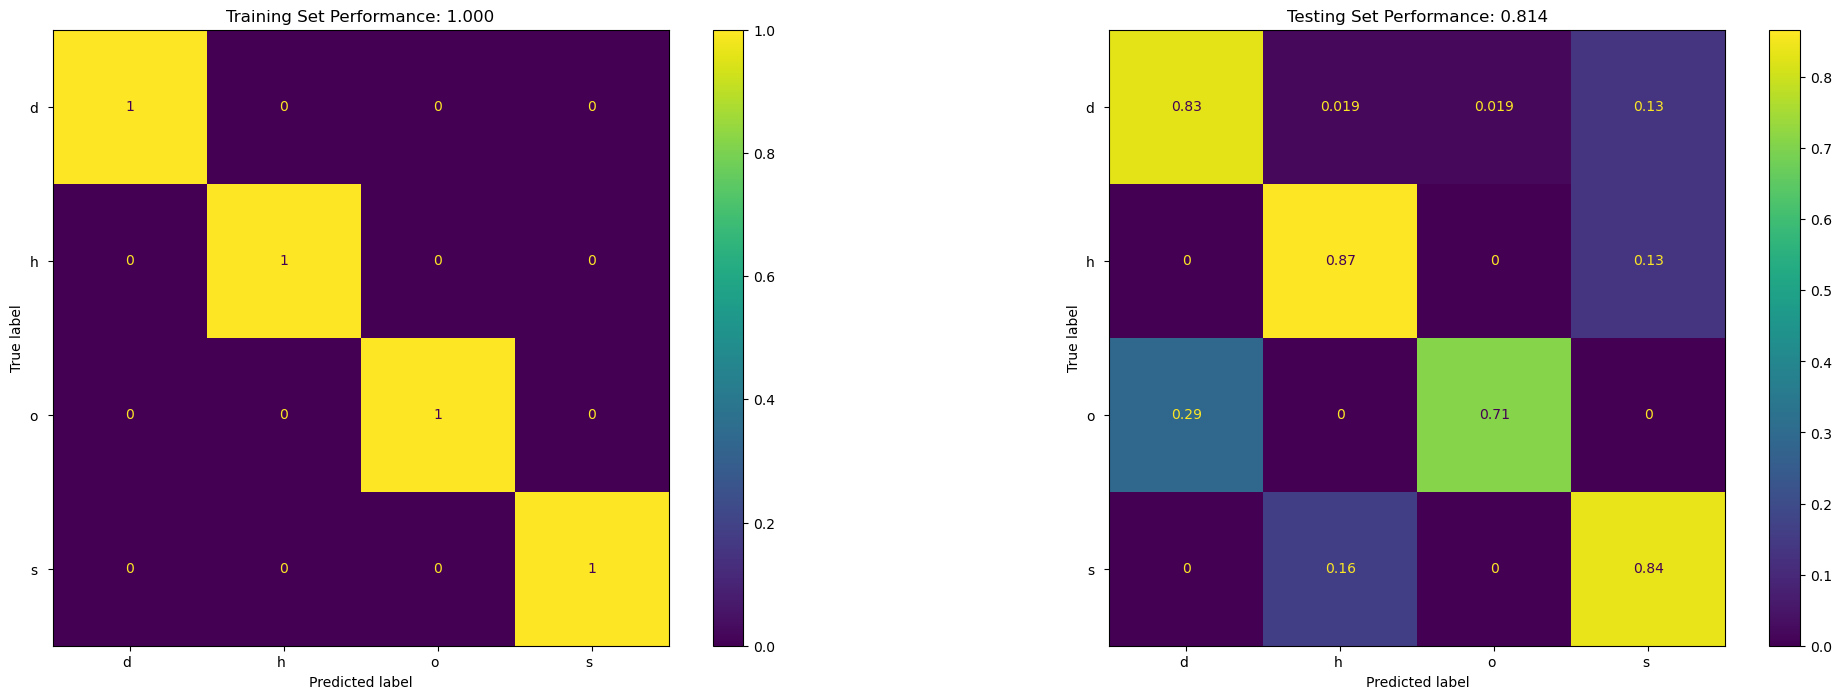

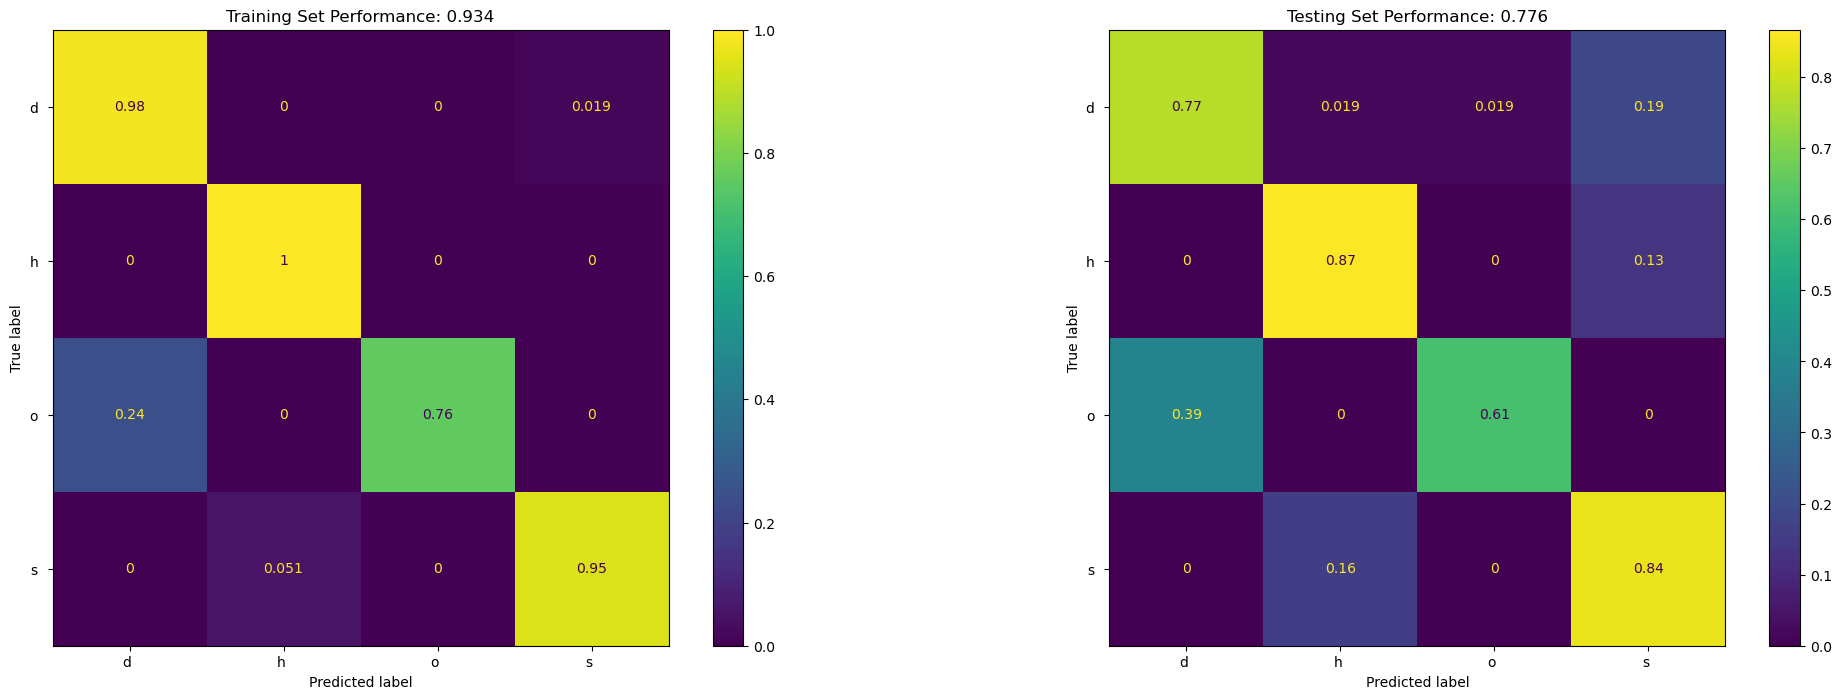

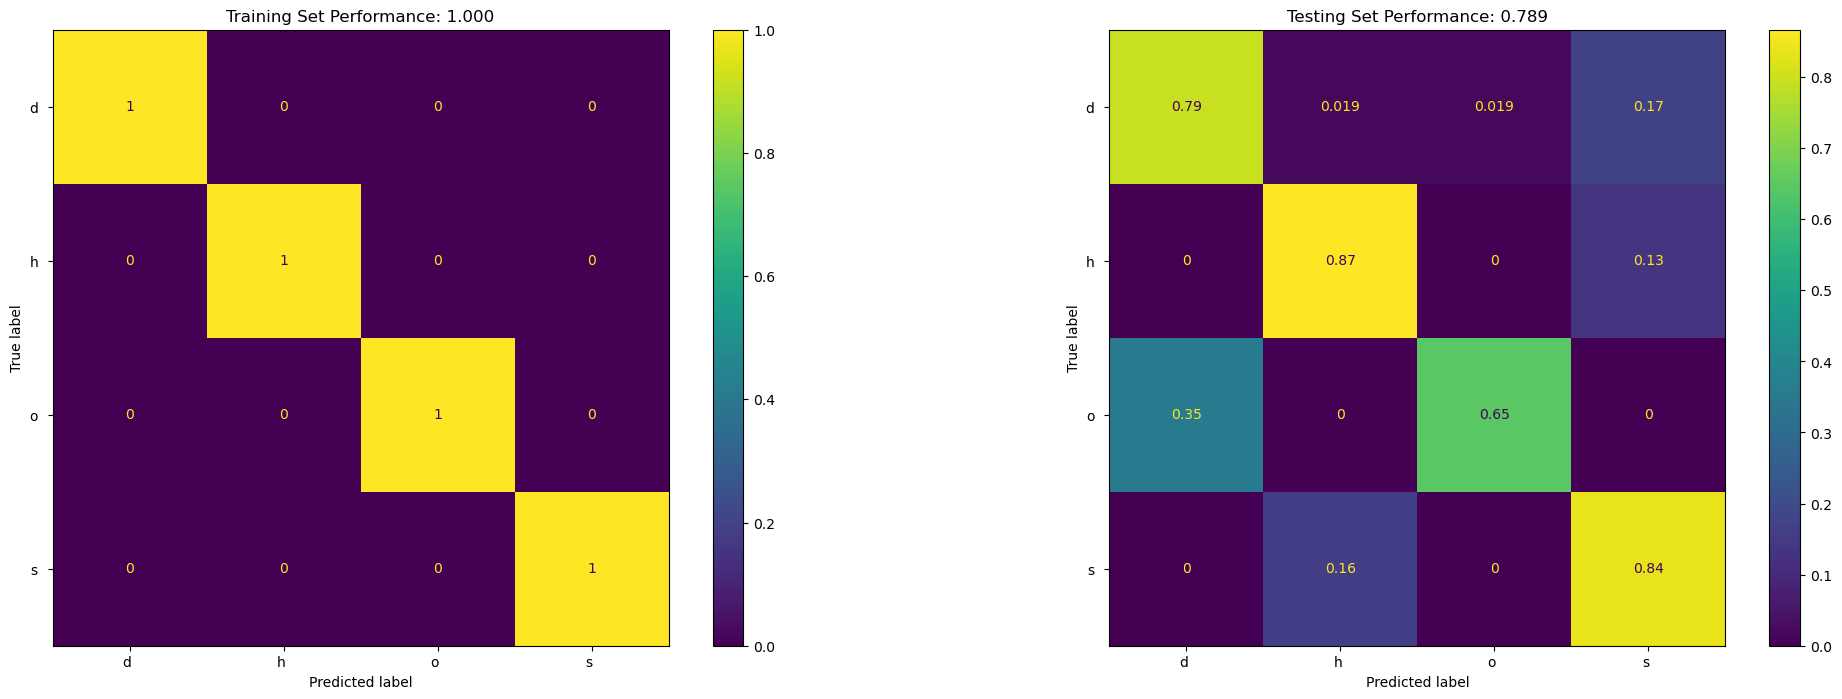

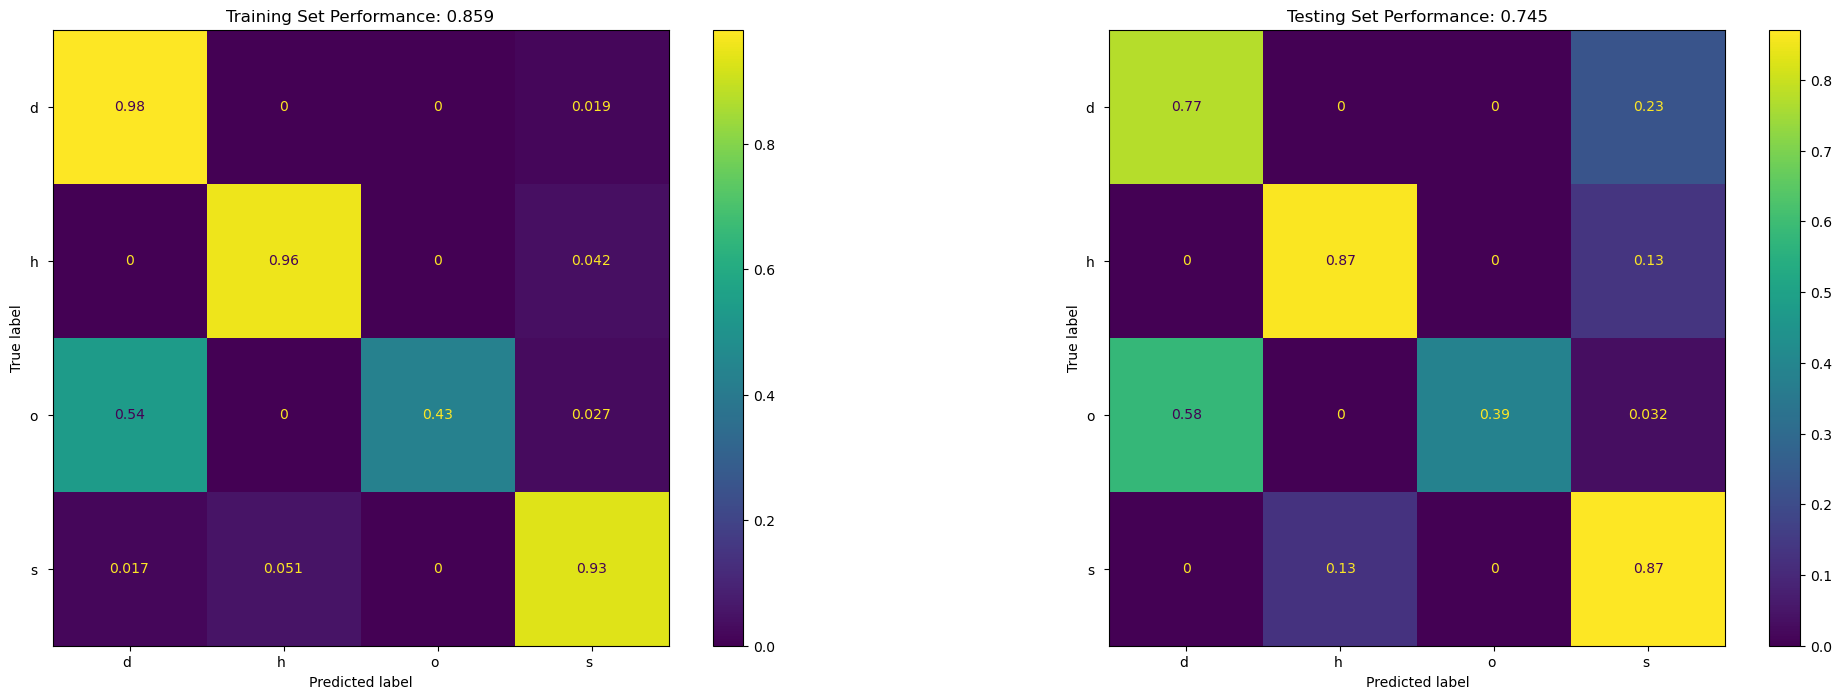

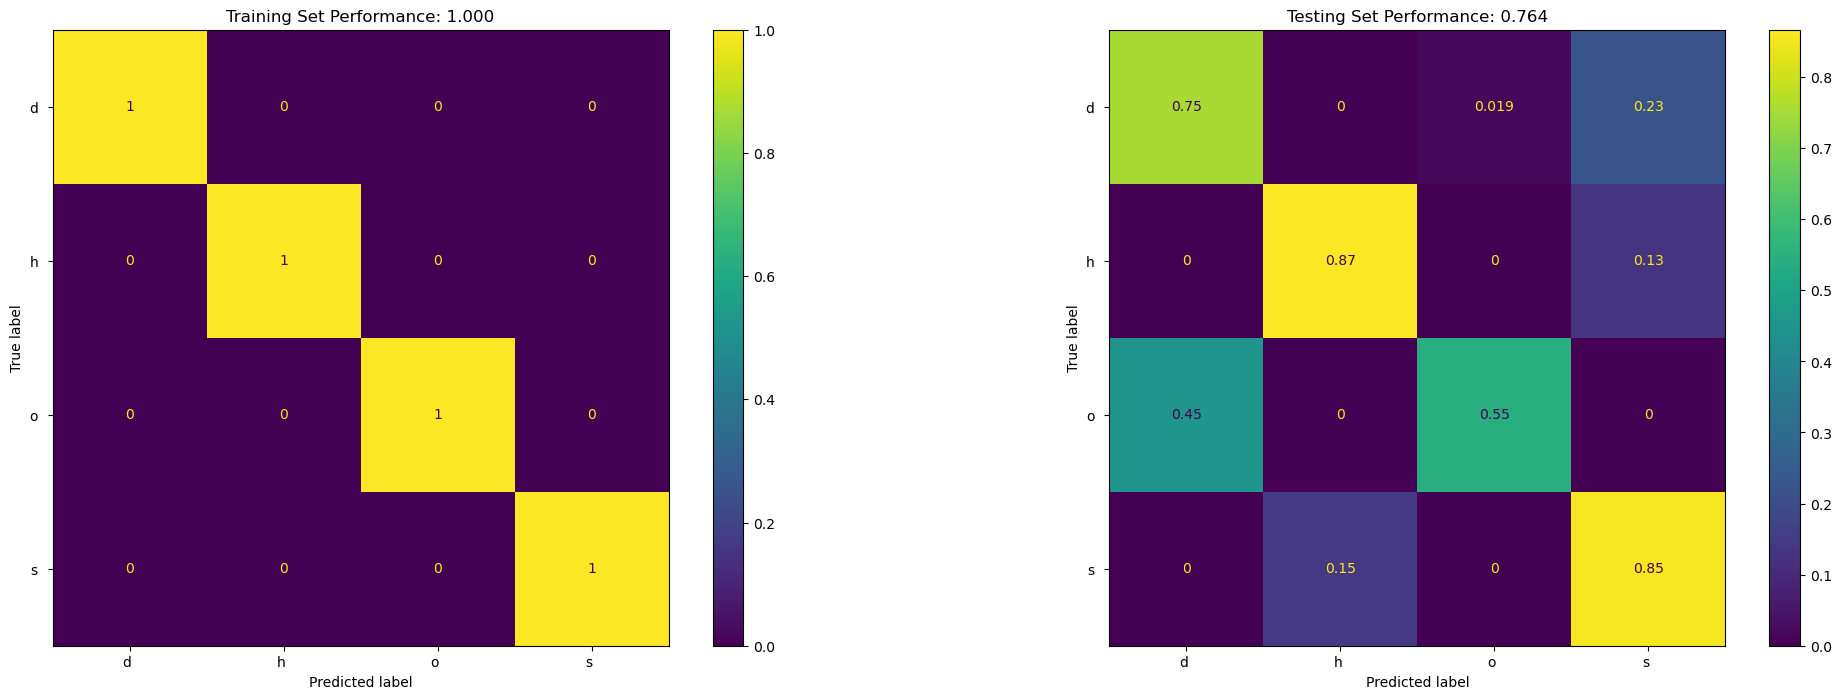

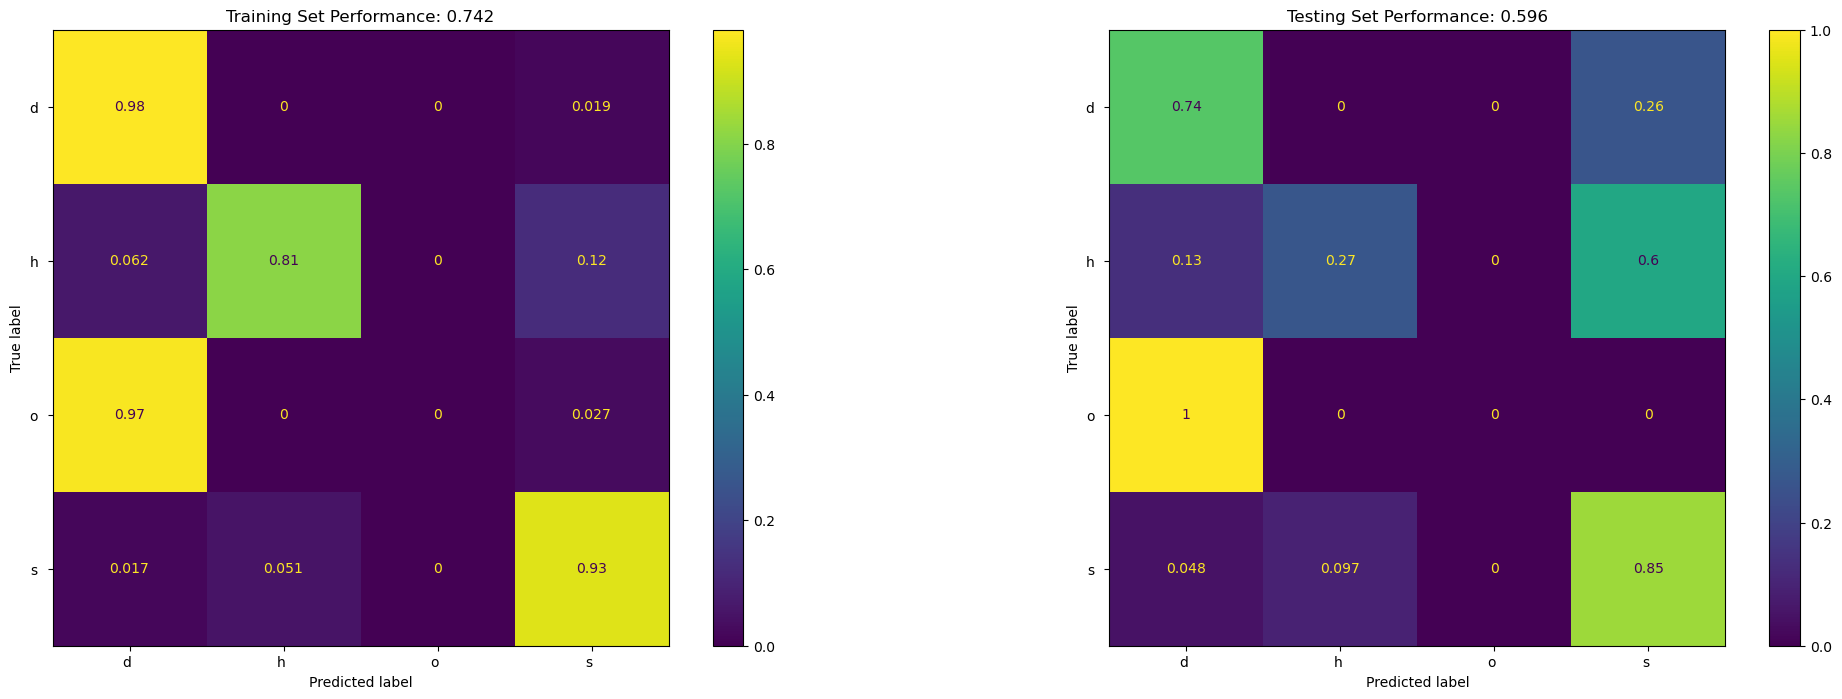

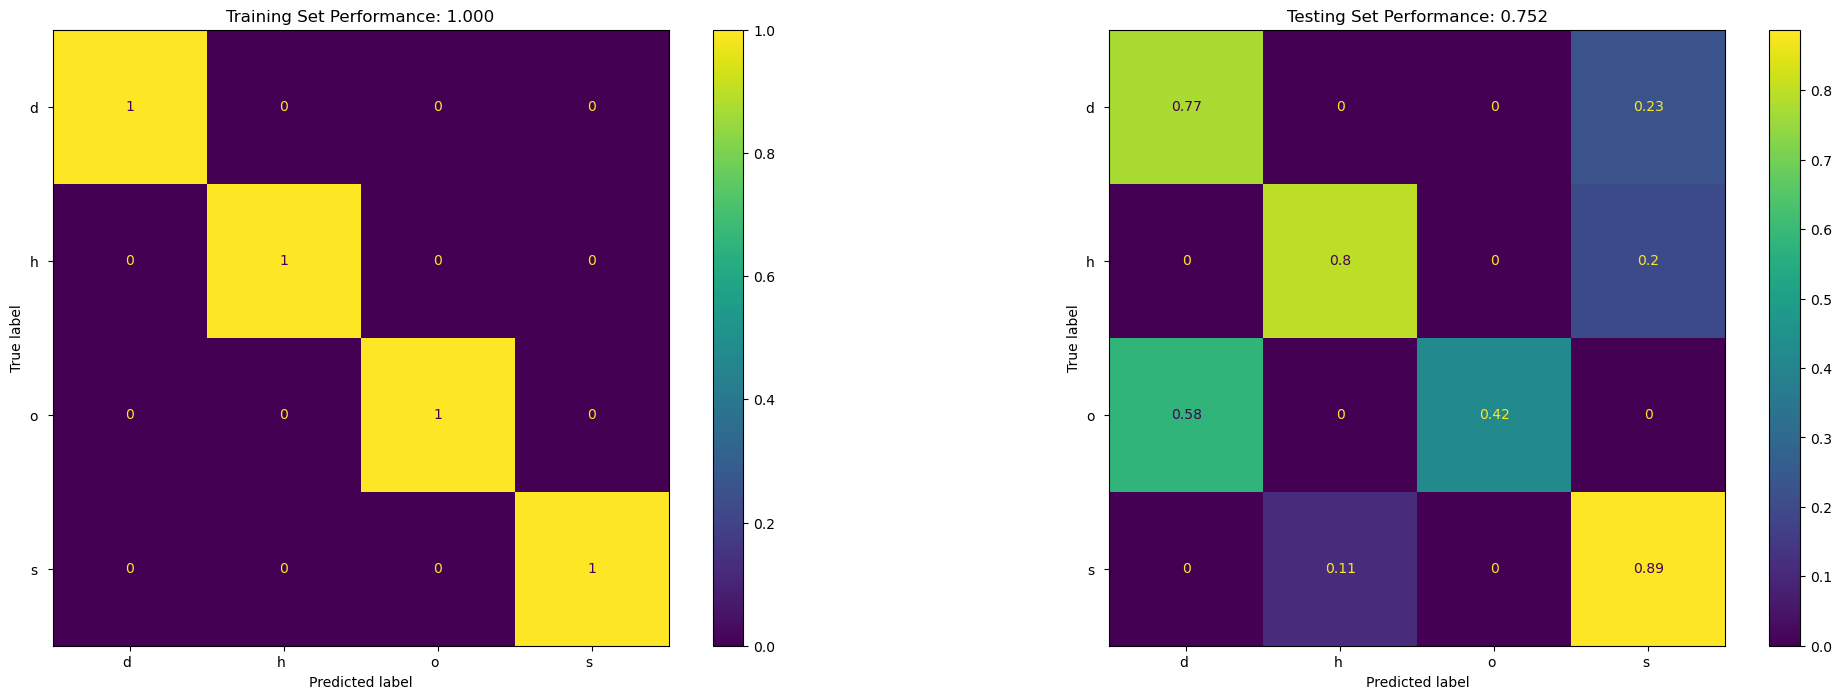

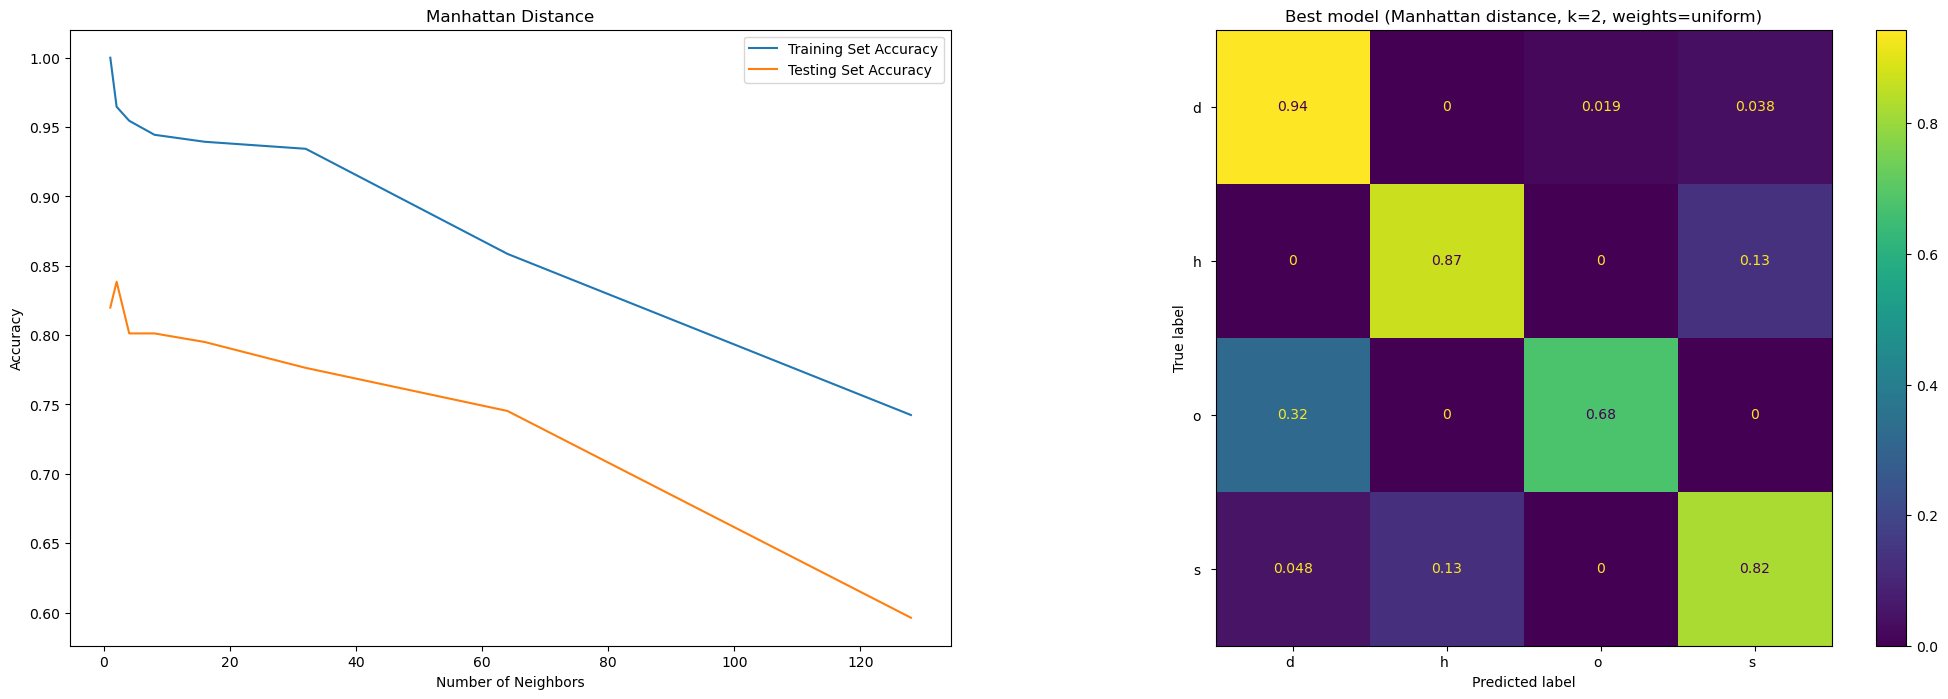

In [155]:
for i, metric in enumerate(['euclidean', 'manhattan']):
    train_scores = []
    test_scores = []
    ks = [1, 2, 4, 8, 16, 32, 64, 128]
    for k in ks:
        train_scores_uniform = []
        test_scores_uniform = []
        for j, weights in enumerate(['uniform', 'distance']):
            cross_cknn = KNeighborsClassifier(n_neighbors=k, weights=weights , metric=metric)
            cross_cknn.fit(X_train, Y_train)
            if weights == 'uniform':
                train_scores_uniform.append(sum(cross_cknn.predict(X_train) == Y_train)/len(Y_train))
                test_scores_uniform.append(sum(cross_cknn.predict(X_test) == Y_test)/len(Y_test))
            eval_model(cross_cknn, X_train, Y_train, X_test, Y_test)
        train_scores.append(max(train_scores_uniform))
        test_scores.append(max(test_scores_uniform))

    # Plot results
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(ks, train_scores, label='Training Set Accuracy')
    ax.plot(ks, test_scores, label='Testing Set Accuracy')
    ax.set_xlabel('Number of Neighbors')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'{metric.capitalize()} Distance')
    ax.legend()
    
    ax = fig.add_subplot(1, 2, 2)
    best_k = ks[np.argmax(test_scores)]
    best_weights = 'uniform'
    best_model = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights, metric=metric)
    best_model.fit(X_train, Y_train)
    conf = ConfusionMatrixDisplay.from_estimator(best_model, X_test, Y_test, normalize='true', ax=ax)
    conf.ax_.set_title(f'Best model ({metric.capitalize()} distance, k={best_k}, weights={best_weights})')
    plt.show()


Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

          d        0.82      0.92      0.87        53
          h        0.62      0.87      0.72        15
          o        0.96      0.71      0.81        31
          s        0.88      0.81      0.84        62

    accuracy                           0.83       161
   macro avg       0.82      0.83      0.81       161
weighted avg       0.85      0.83      0.83       161



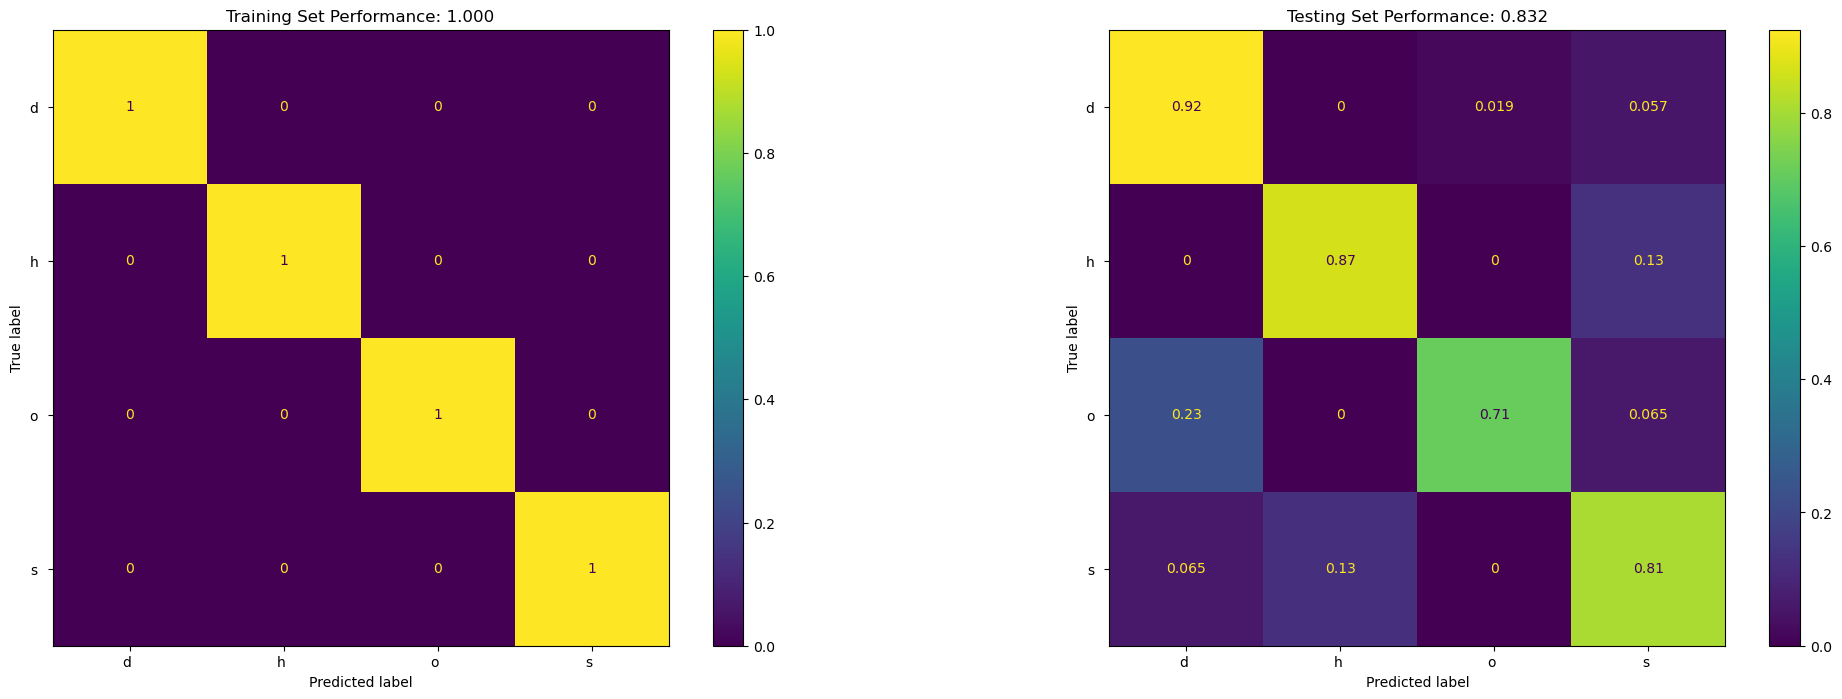

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the range of hyperparameters to search
param_grid = {'n_neighbors': [1, 2, 4, 8, 16, 32, 64, 128],
              'weights': ['uniform', 'distance'],
              'metric': ['manhattan', 'euclidean']}

# Create a CKNN model
cknn = KNeighborsClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(cknn, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model using the best hyperparameters
best_cknn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                  weights=grid_search.best_params_['weights'],
                                  metric=grid_search.best_params_['metric'])
best_cknn.fit(X_train, Y_train)
eval_model(best_cknn, X_train, Y_train, X_test, Y_test)

# Random Forest Classifier


              precision    recall  f1-score   support

          d        0.80      0.70      0.75        53
          h        0.68      0.87      0.76        15
          o        0.81      0.81      0.81        31
          s        0.82      0.85      0.83        62

    accuracy                           0.80       161
   macro avg       0.78      0.81      0.79       161
weighted avg       0.80      0.80      0.79       161



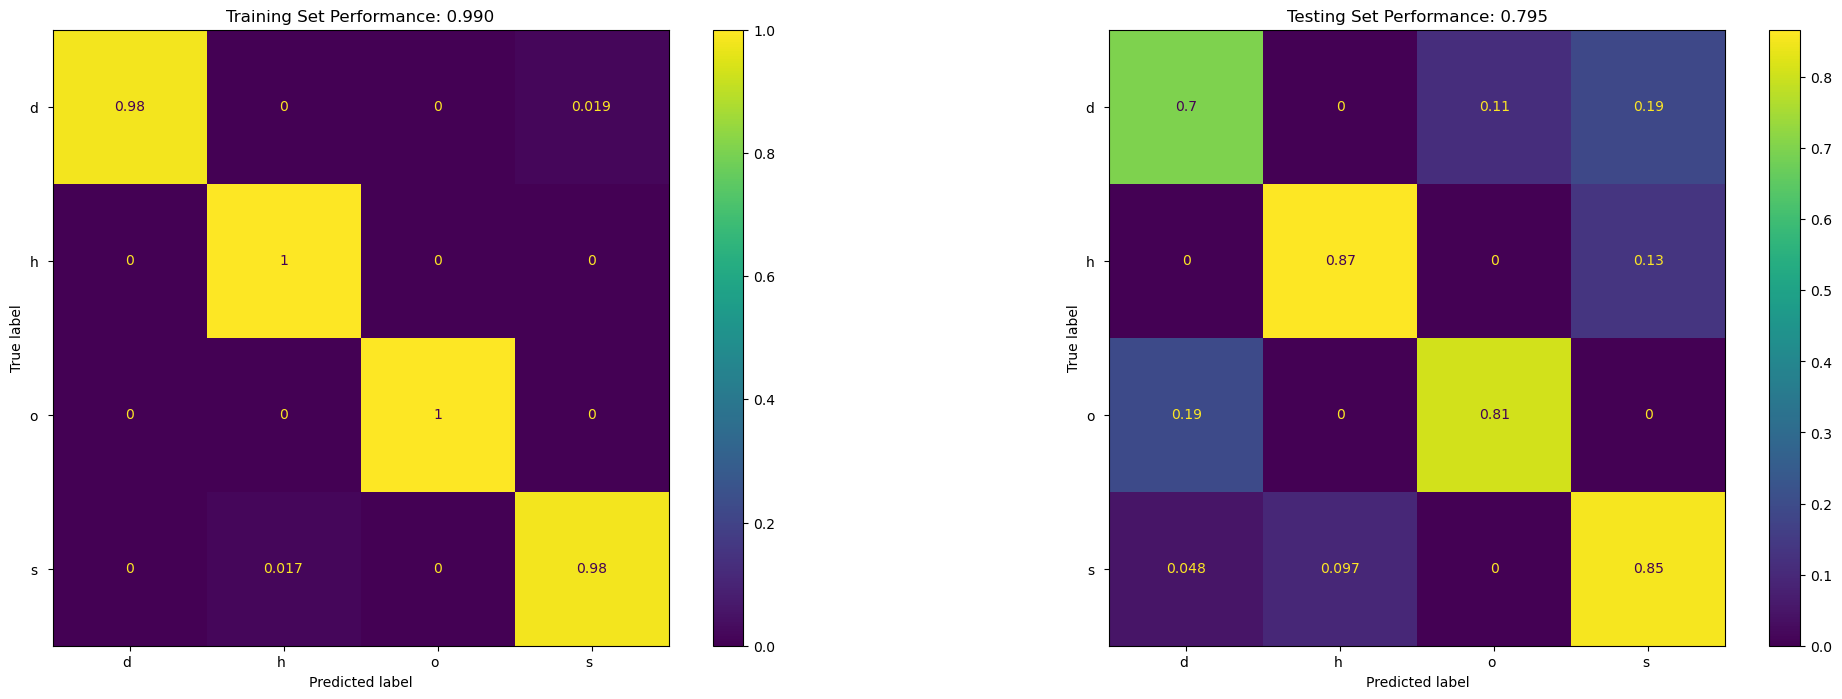

In [156]:
# random forest simple model.
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0).fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)


              precision    recall  f1-score   support

          d        0.80      0.70      0.75        53
          h        0.68      0.87      0.76        15
          o        0.80      0.77      0.79        31
          s        0.80      0.85      0.83        62

    accuracy                           0.79       161
   macro avg       0.77      0.80      0.78       161
weighted avg       0.79      0.79      0.79       161



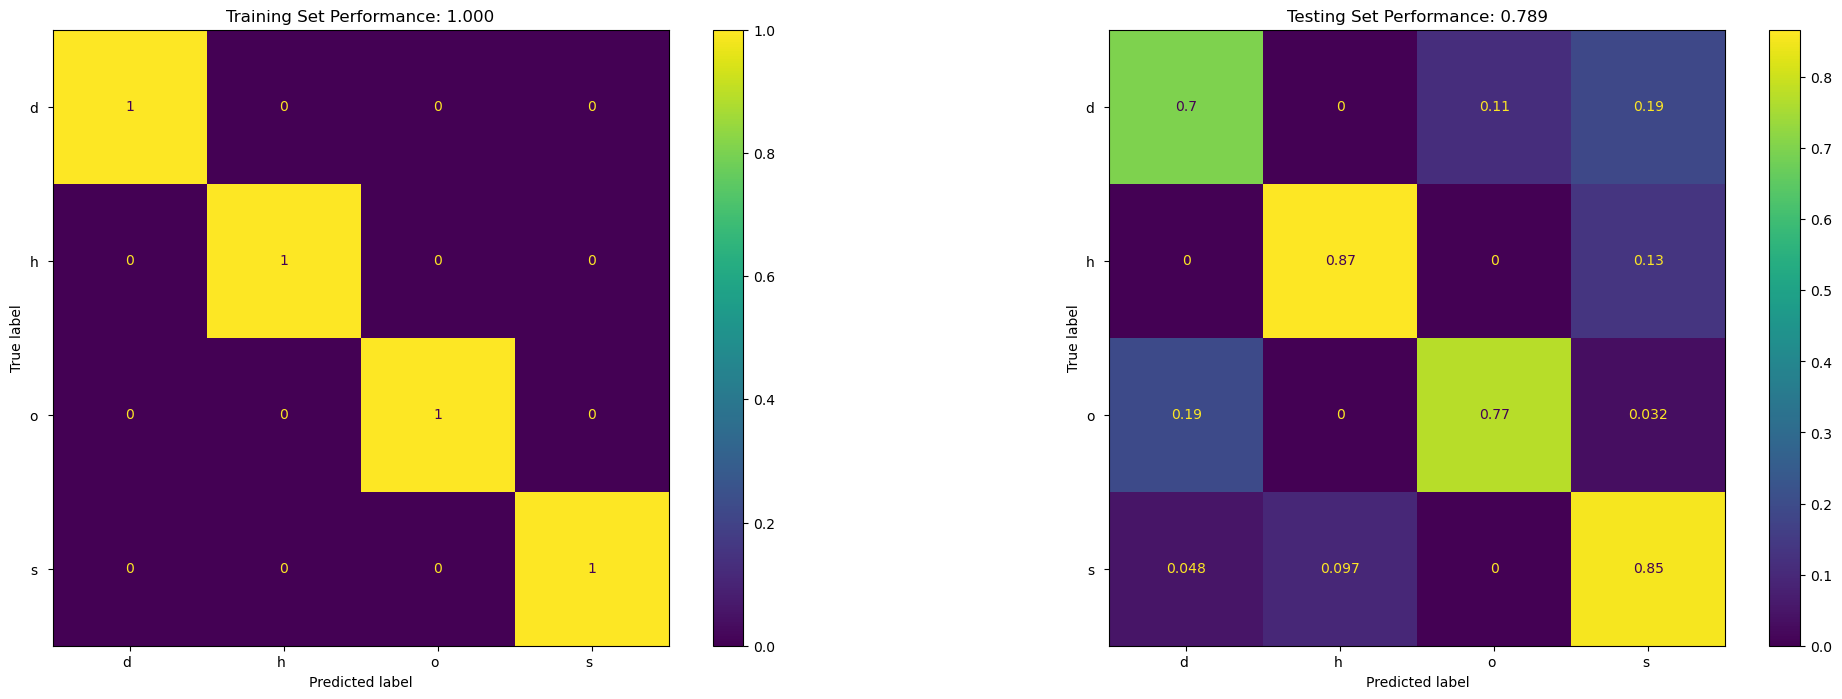

In [157]:
# Balance problems. This can be fixed by  

# 1) Make the trees deeper 
rf = RandomForestClassifier(n_estimators=100, max_depth=32, random_state=0).fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

          d        0.81      0.72      0.76        53
          h        0.68      0.87      0.76        15
          o        0.83      0.81      0.82        31
          s        0.82      0.85      0.83        62

    accuracy                           0.80       161
   macro avg       0.79      0.81      0.79       161
weighted avg       0.80      0.80      0.80       161



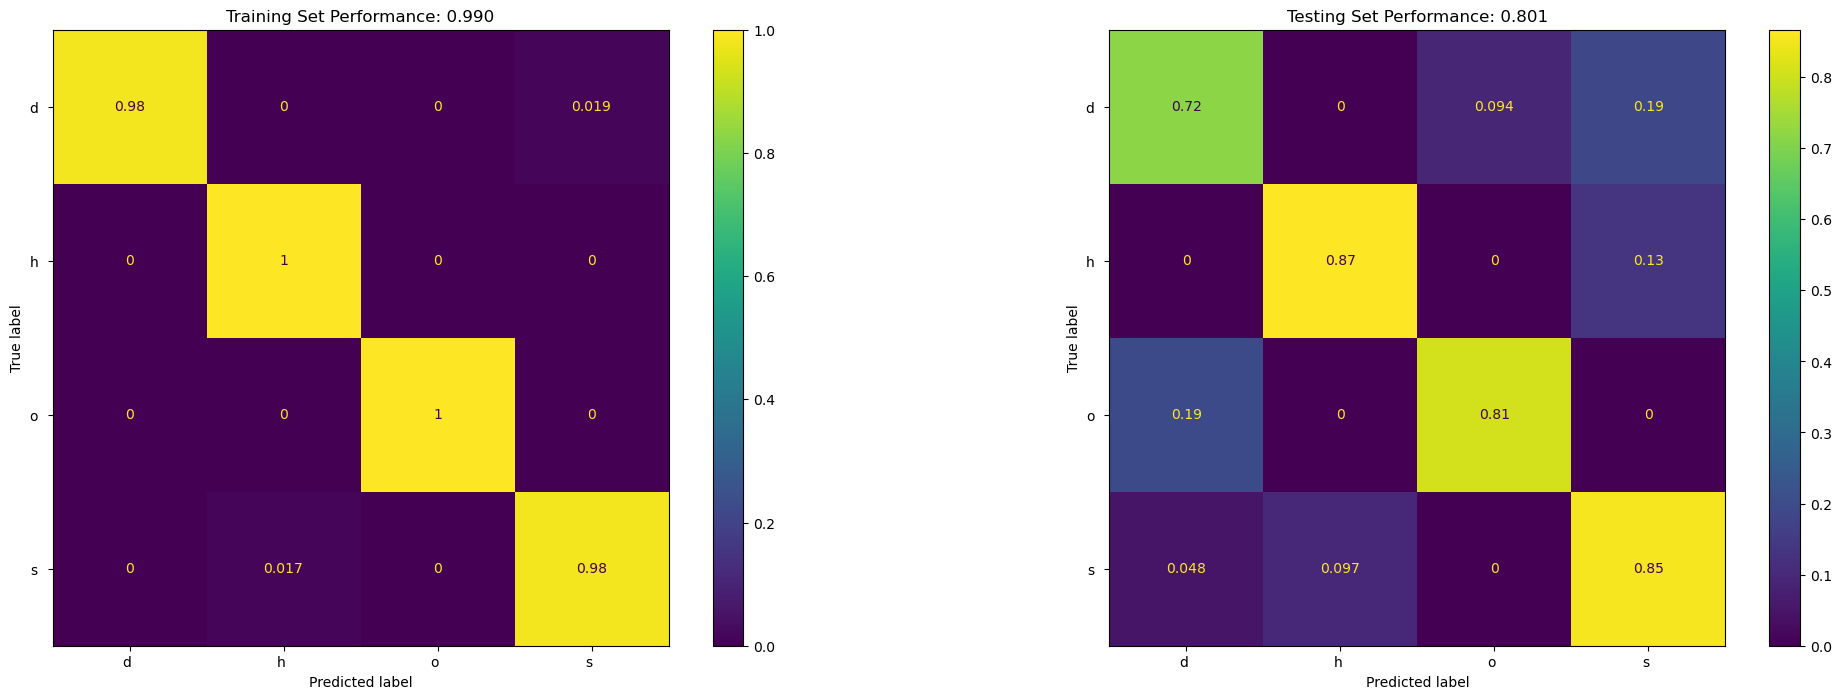

In [158]:
# 2) Setting class weights 
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0, class_weight='balanced_subsample').fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

          d        0.80      0.74      0.76        53
          h        0.68      0.87      0.76        15
          o        0.83      0.77      0.80        31
          s        0.83      0.85      0.84        62

    accuracy                           0.80       161
   macro avg       0.78      0.81      0.79       161
weighted avg       0.80      0.80      0.80       161



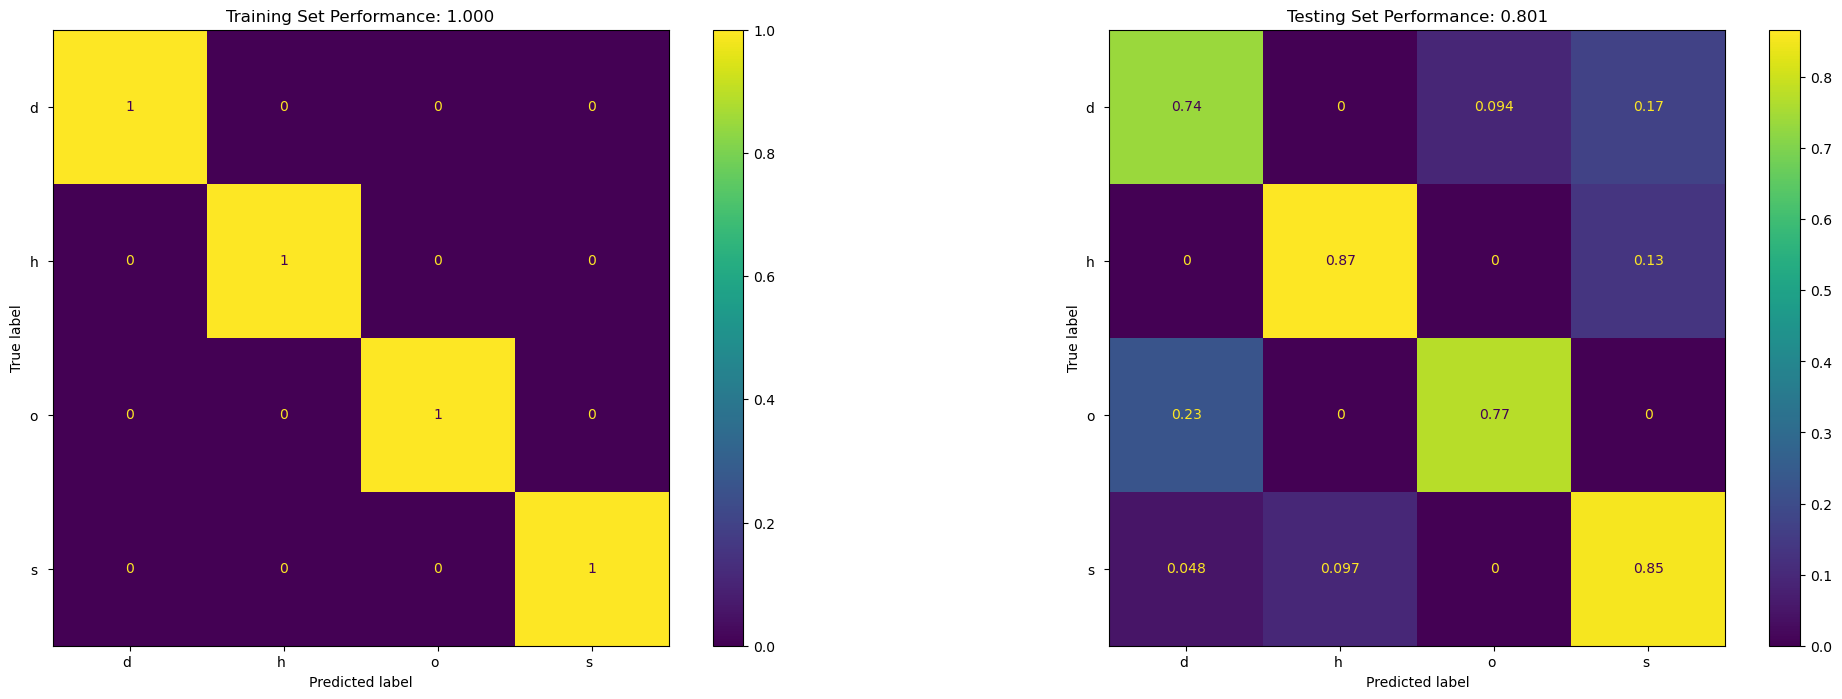

In [159]:
# Balance of deeper trees and balanced weights
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0, class_weight='balanced_subsample').fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

          d        0.80      0.77      0.79        53
          h        0.68      0.87      0.76        15
          o        0.92      0.77      0.84        31
          s        0.82      0.85      0.83        62

    accuracy                           0.81       161
   macro avg       0.81      0.82      0.81       161
weighted avg       0.82      0.81      0.81       161



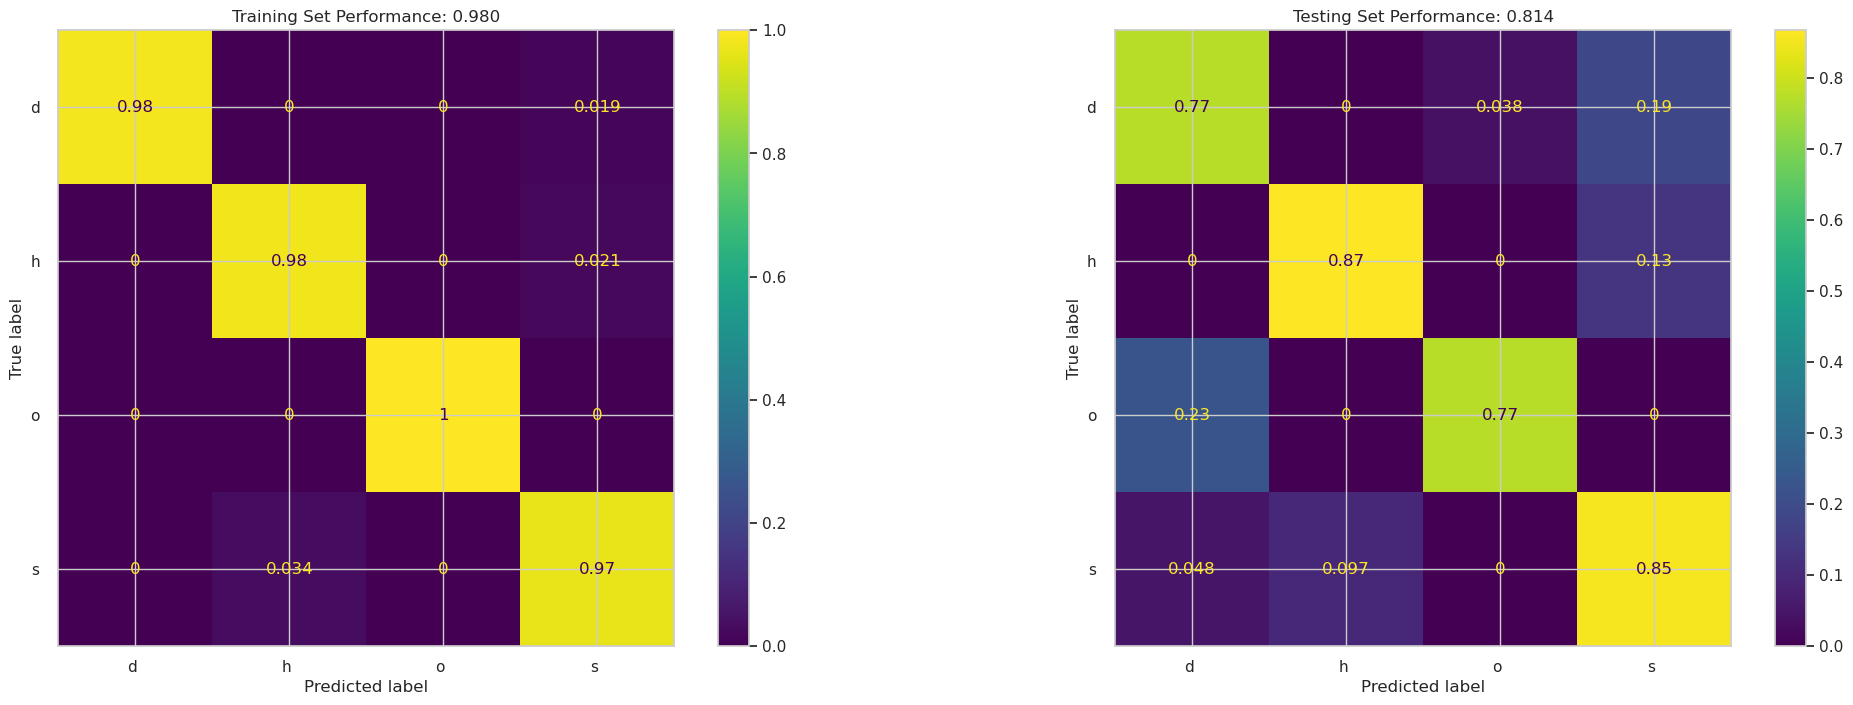

In [187]:
# Best Hyperparatmers
rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=5, class_weight='balanced').fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)

Best hyperparameters:  {'n_estimators': 21, 'max_depth': 3, 'random_state': 0, 'class_weight': 'balanced'}


ValueError: x and y must have same first dimension, but have shapes (3,) and (15,)

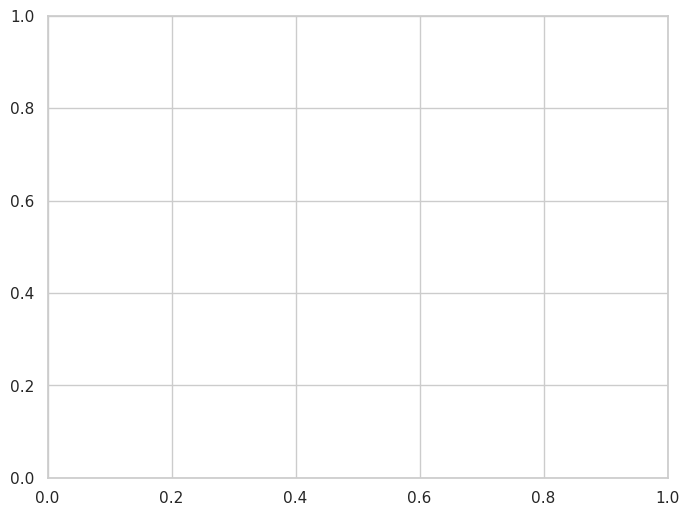

In [186]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate

# Define the range of hyperparameters
n_estimators = np.linspace(20, 22, 3, dtype=int)
max_depths = np.linspace(3, 9, 7, dtype=int)
random_states = np.linspace(0, 20, 10, dtype=int)
class_weights = ['balanced', 'balanced_subsample']

# Initialize a dictionary to store the cross-validation results
results = {'n_estimators': [], 'max_depth': [], 'random_state': [], 'class_weight': [], 'mean_train_score': [], 'mean_test_score': []}

# Loop over all hyperparameter combinations
for w in class_weights:
    for d in max_depths:
        for r in random_states:
            for n in n_estimators:
                rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=r, class_weight=w)
                scores = cross_validate(rf, X_train, Y_train, cv=5, scoring='accuracy')
                results['n_estimators'].extend([n] * 5)
                results['max_depth'].extend([d] * 5)
                results['random_state'].extend([r] * 5)
                results['class_weight'].extend([w] * 5)
                results['mean_train_score'].extend(scores['fit_time'])
                results['mean_test_score'].extend(scores['test_score'])
# Convert the results dictionary to a Pandas DataFrame
import pandas as pd
df_results = pd.DataFrame(results)

# Print the best hyperparameters based on the mean test score
best_idx = df_results['mean_test_score'].idxmax()
best_params = df_results.loc[best_idx, ['n_estimators', 'max_depth', 'random_state', 'class_weight']].to_dict()
print('Best hyperparameters: ', best_params)

# Plot n_estimators vs score
plt.figure(figsize=(8,6))
for w in class_weights:
    x_axis = np.array(n_estimators)
    y_axis = df_results[(df_results['class_weight'] == w) & (df_results['max_depth'] == best_params['max_depth']) & (df_results['random_state'] == best_params['random_state'])]['mean_test_score'].values
    plt.plot(x_axis, y_axis, label=w)
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('n_estimators vs Score')
plt.legend()
plt.show()

# Plot max_depths vs score
plt.figure(figsize=(8,6))
for w in class_weights:
    x_axis = np.array(max_depths)
    y_axis = 
    plt.plot(x_axis, y_axis, label=w)
plt.xlabel('max_depths')
plt.ylabel('Score')
plt.title('max_depths vs Score')
plt.legend()
plt.show()


In [160]:
# check the metrics of these models
from sklearn.metrics import classification_report
print(classification_report(Y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

          d        0.80      0.74      0.76        53
          h        0.68      0.87      0.76        15
          o        0.83      0.77      0.80        31
          s        0.83      0.85      0.84        62

    accuracy                           0.80       161
   macro avg       0.78      0.81      0.79       161
weighted avg       0.80      0.80      0.80       161



## Support Vector Machines


              precision    recall  f1-score   support

          d        0.84      0.81      0.83        53
          h        0.59      0.87      0.70        15
          o        0.89      0.81      0.85        31
          s        0.87      0.84      0.85        62

    accuracy                           0.83       161
   macro avg       0.80      0.83      0.81       161
weighted avg       0.84      0.83      0.83       161



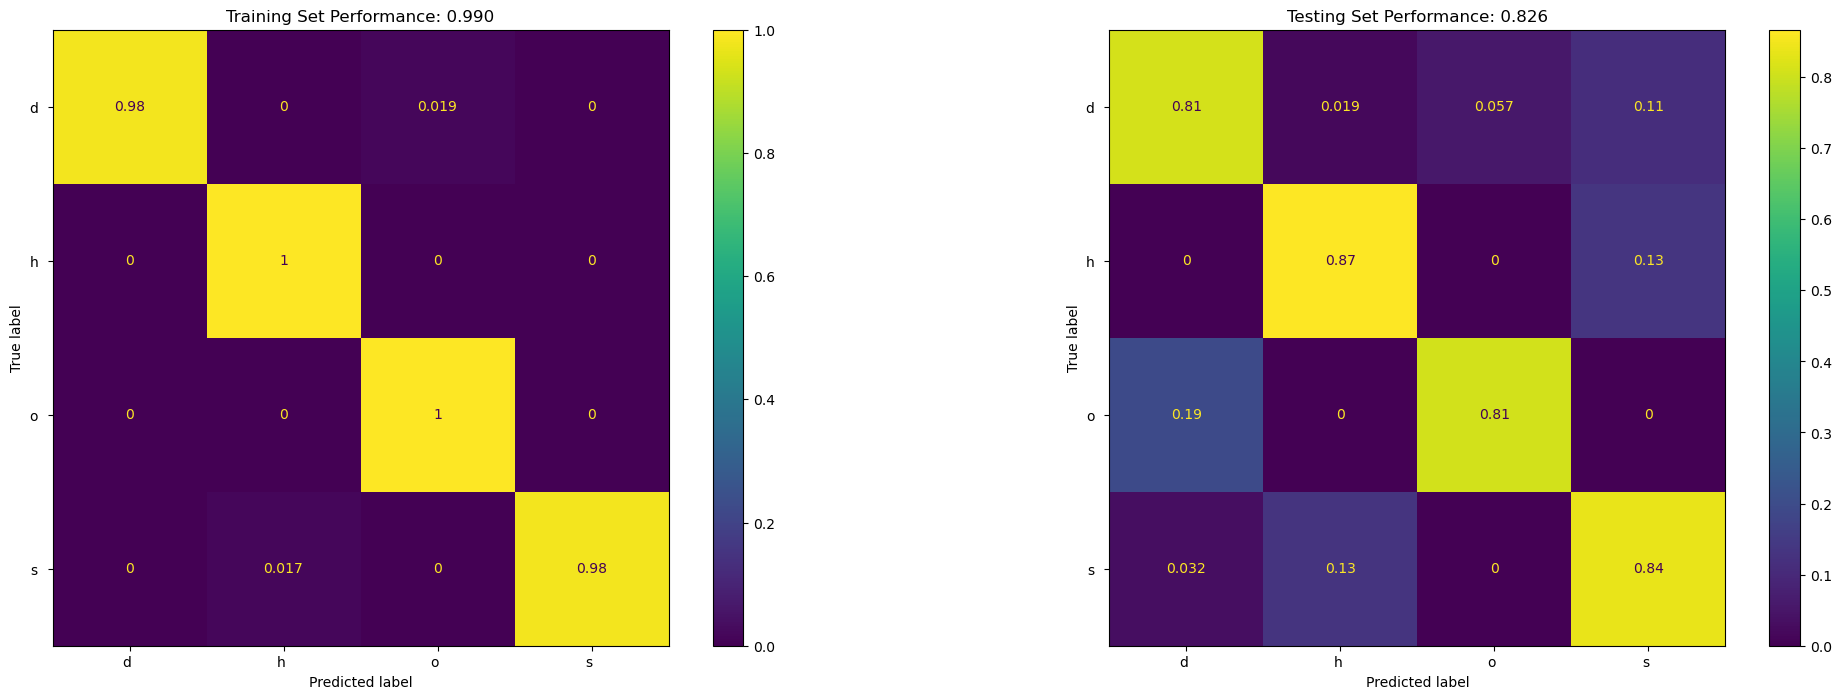

In [161]:
# one vs one classifier
svm = SVC()
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

          d        0.86      0.81      0.83        53
          h        0.57      0.87      0.68        15
          o        0.90      0.84      0.87        31
          s        0.86      0.82      0.84        62

    accuracy                           0.83       161
   macro avg       0.80      0.83      0.81       161
weighted avg       0.84      0.83      0.83       161



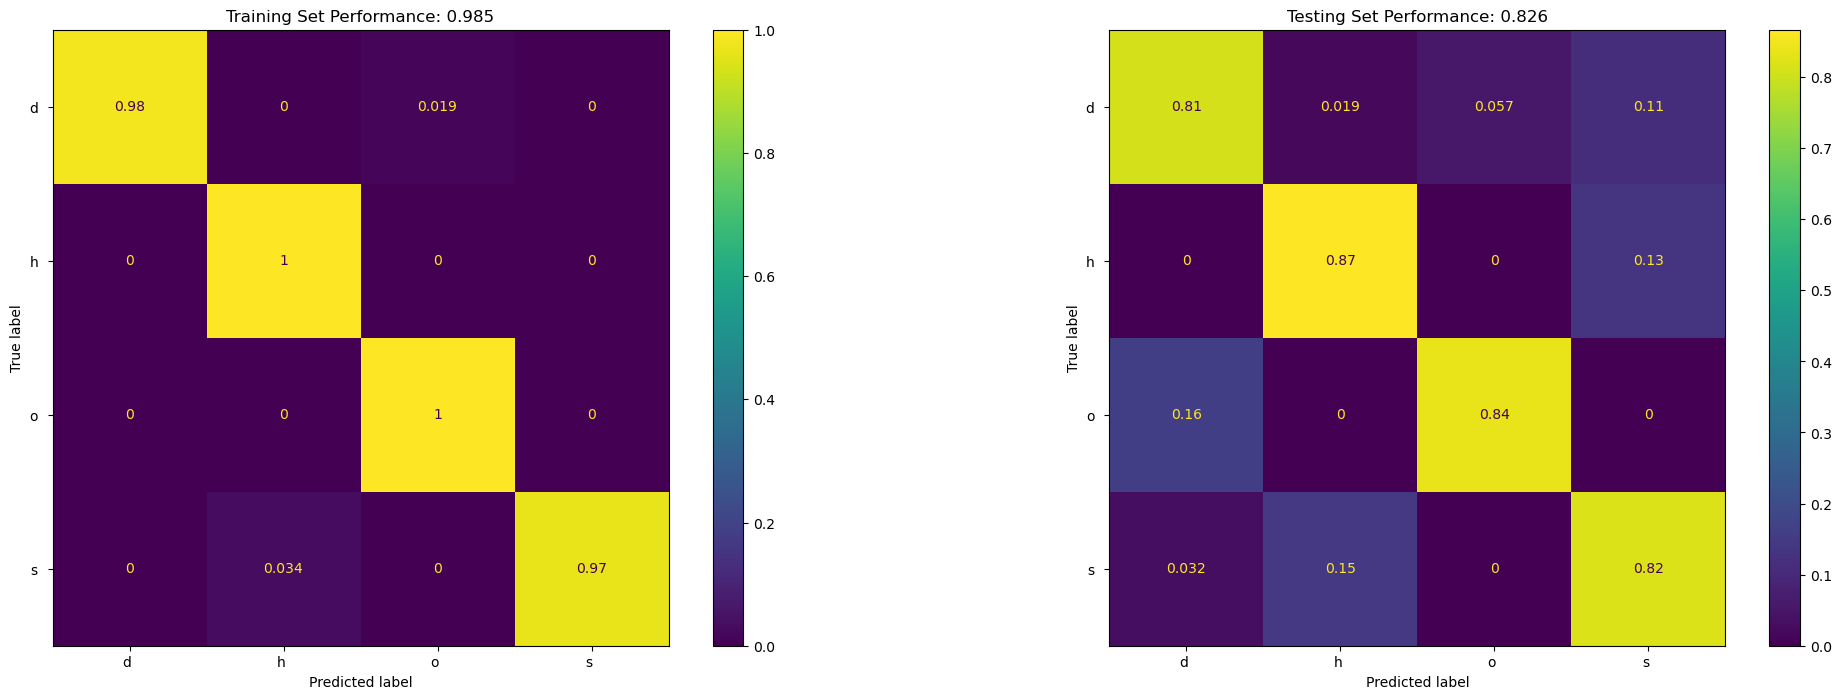

In [162]:
# Adding class weights since it is a poor fit

svm = SVC(class_weight='balanced')
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

# Mixed results where
# 1) Classification rate drops
# 2) We can classify all classes but not very well

              precision    recall  f1-score   support

          d        0.88      0.81      0.84        53
          h        0.57      0.87      0.68        15
          o        0.92      0.77      0.84        31
          s        0.84      0.85      0.85        62

    accuracy                           0.83       161
   macro avg       0.80      0.83      0.80       161
weighted avg       0.84      0.83      0.83       161



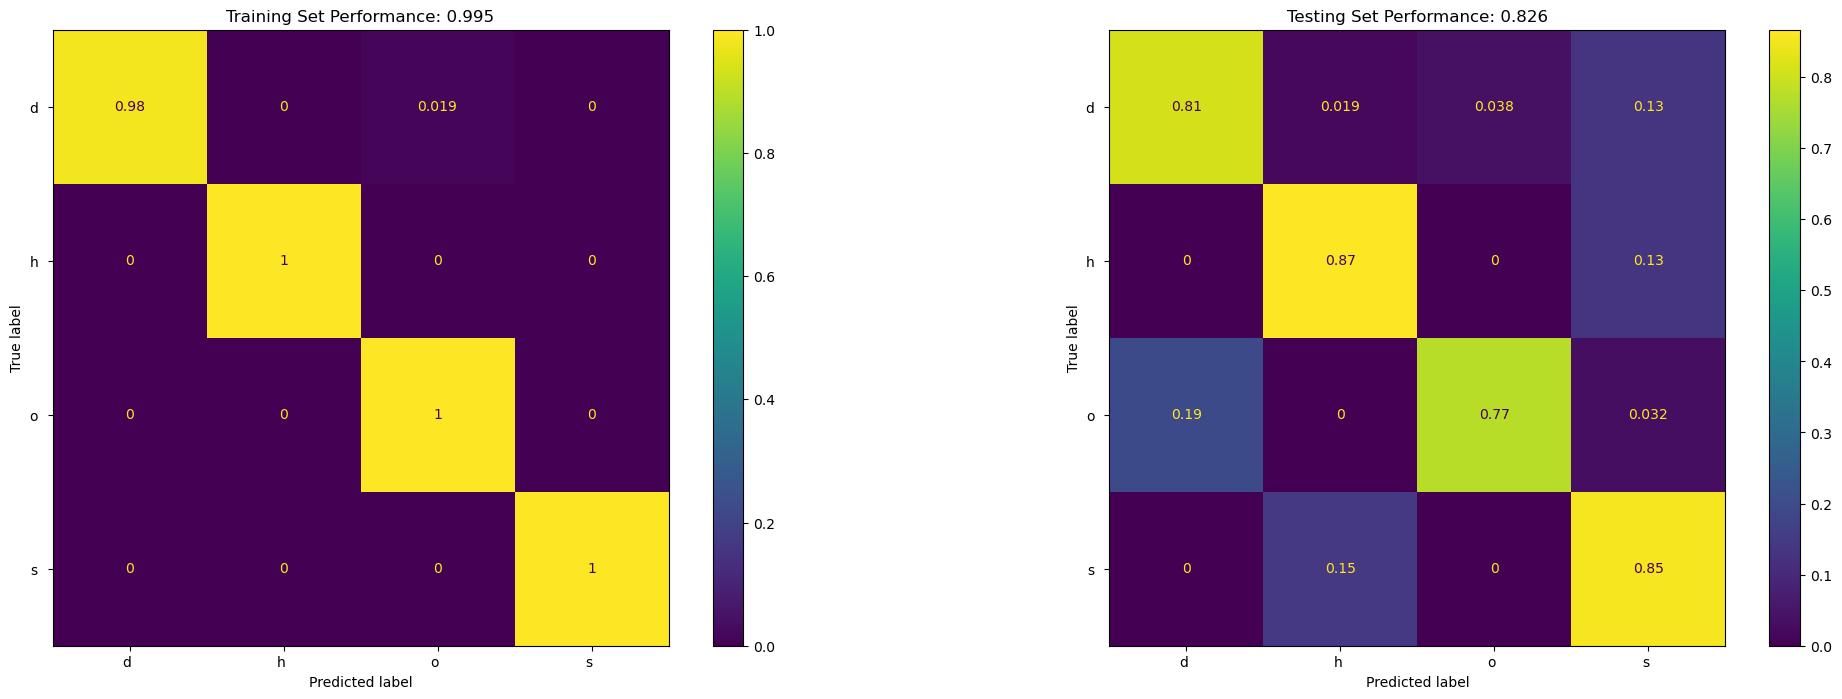

In [163]:
# One vs all classifier
onevsall_svm = OneVsRestClassifier(SVC(class_weight='balanced'))
onevsall_svm.fit(X_train, Y_train)
eval_model(onevsall_svm, X_train, Y_train, X_test, Y_test)

In [164]:
# This is a bit better, but still not great. 
# At this point it's worth considering if we have the right hyperparameters 
# for our SVMs. The next steps in optimising this would be to perform a grid search 
# for different SVM parameters. In particular looking at values of C and the kernels.
# Let's do this for a one vs one SVM with class weights.

param_grid = [
  {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
  {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
  {'C': [0.1, 1, 10, 100], 'degree': [3, 4, 5], 'kernel': ['poly']},
 ]
svm = SVC(class_weight='balanced')
grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(X_train, Y_train)
grid_search.cv_results_


{'mean_fit_time': array([0.00112567, 0.00109367, 0.00103679, 0.00104513, 0.00182872,
        0.00174894, 0.00179234, 0.00160513, 0.0010932 , 0.00156384,
        0.00166006, 0.00098176, 0.00104527, 0.00166974, 0.00094838,
        0.00093813, 0.00141807, 0.00147948, 0.00143127, 0.00122638,
        0.0013978 , 0.00133295, 0.00101972, 0.00130601, 0.00122809,
        0.0009192 , 0.00116596, 0.00101709]),
 'std_fit_time': array([1.43616006e-04, 1.42030444e-04, 1.10057756e-04, 1.07077561e-04,
        8.03372833e-05, 8.51350783e-05, 6.02031415e-05, 3.36099509e-05,
        4.11684755e-06, 2.46937202e-05, 1.20832832e-05, 1.61403567e-05,
        7.62402823e-06, 2.29801872e-05, 2.13660297e-05, 3.18245135e-05,
        2.10772812e-05, 3.82842930e-05, 1.81369951e-05, 2.25243863e-05,
        3.31867700e-05, 2.24723392e-05, 3.37609463e-05, 4.54296952e-05,
        1.63291491e-05, 4.88488425e-05, 4.05688952e-05, 3.52340394e-05]),
 'mean_score_time': array([0.00033293, 0.00029964, 0.00029149, 0.00029793, 

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

          d        0.87      0.89      0.88        53
          h        0.61      0.93      0.74        15
          o        0.93      0.81      0.86        31
          s        0.91      0.84      0.87        62

    accuracy                           0.86       161
   macro avg       0.83      0.87      0.84       161
weighted avg       0.87      0.86      0.86       161



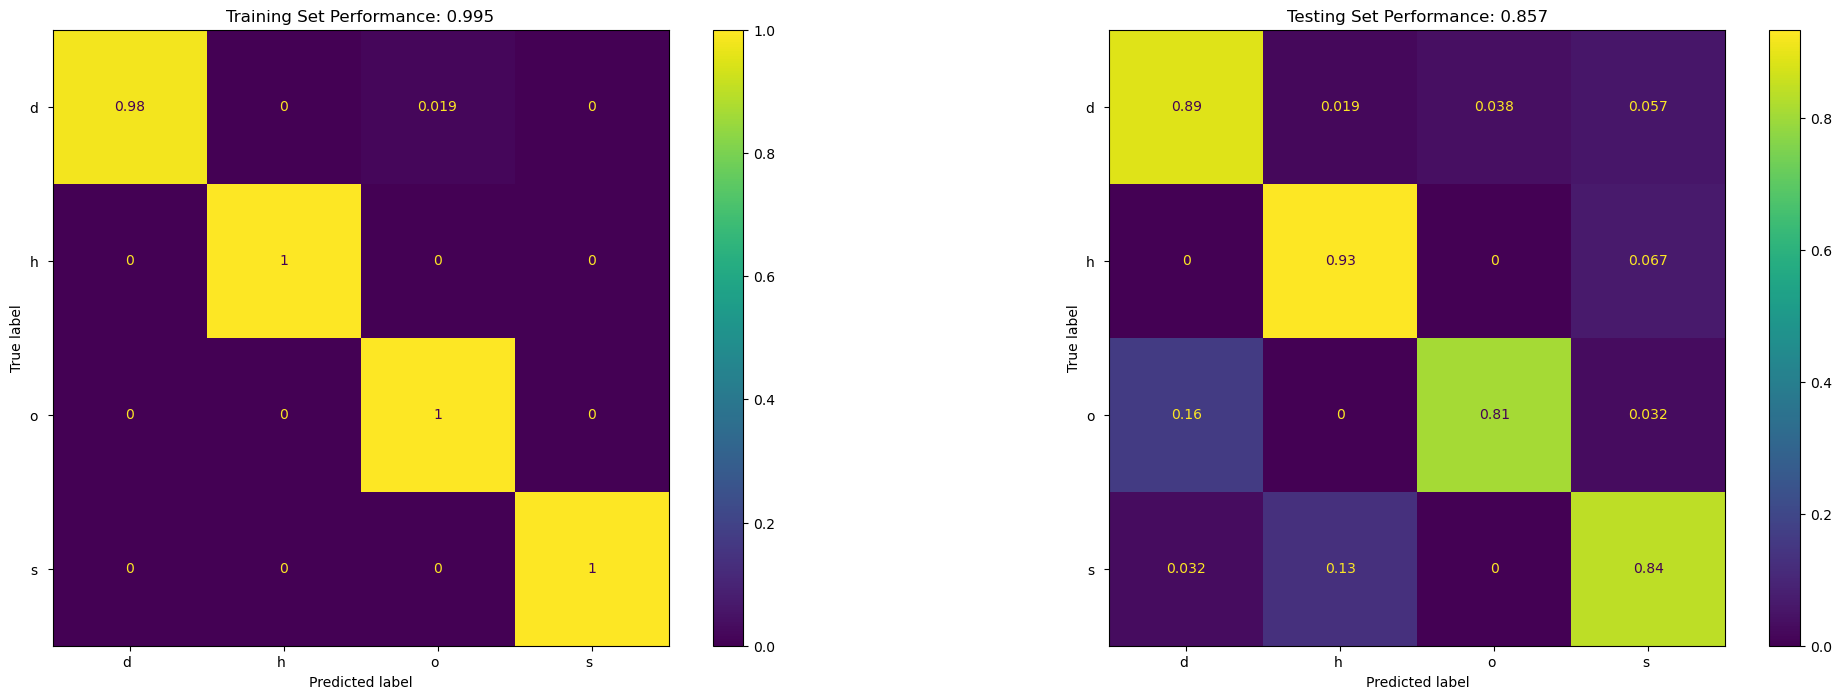

In [165]:
best_system = np.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
print(params)
svm = SVC().set_params(**params)
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

Linear SVM, with C = 1000
              precision    recall  f1-score   support

          d        0.87      0.87      0.87        53
          h        0.52      0.93      0.67        15
          o        0.89      0.81      0.85        31
          s        0.91      0.77      0.83        62

    accuracy                           0.83       161
   macro avg       0.80      0.85      0.80       161
weighted avg       0.85      0.83      0.83       161

Linear SVM, with C = 10
              precision    recall  f1-score   support

          d        0.87      0.87      0.87        53
          h        0.52      0.93      0.67        15
          o        0.89      0.81      0.85        31
          s        0.91      0.77      0.83        62

    accuracy                           0.83       161
   macro avg       0.80      0.85      0.80       161
weighted avg       0.85      0.83      0.83       161

Linear SVM, with C = 0.1
              precision    recall  f1-score   support



/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


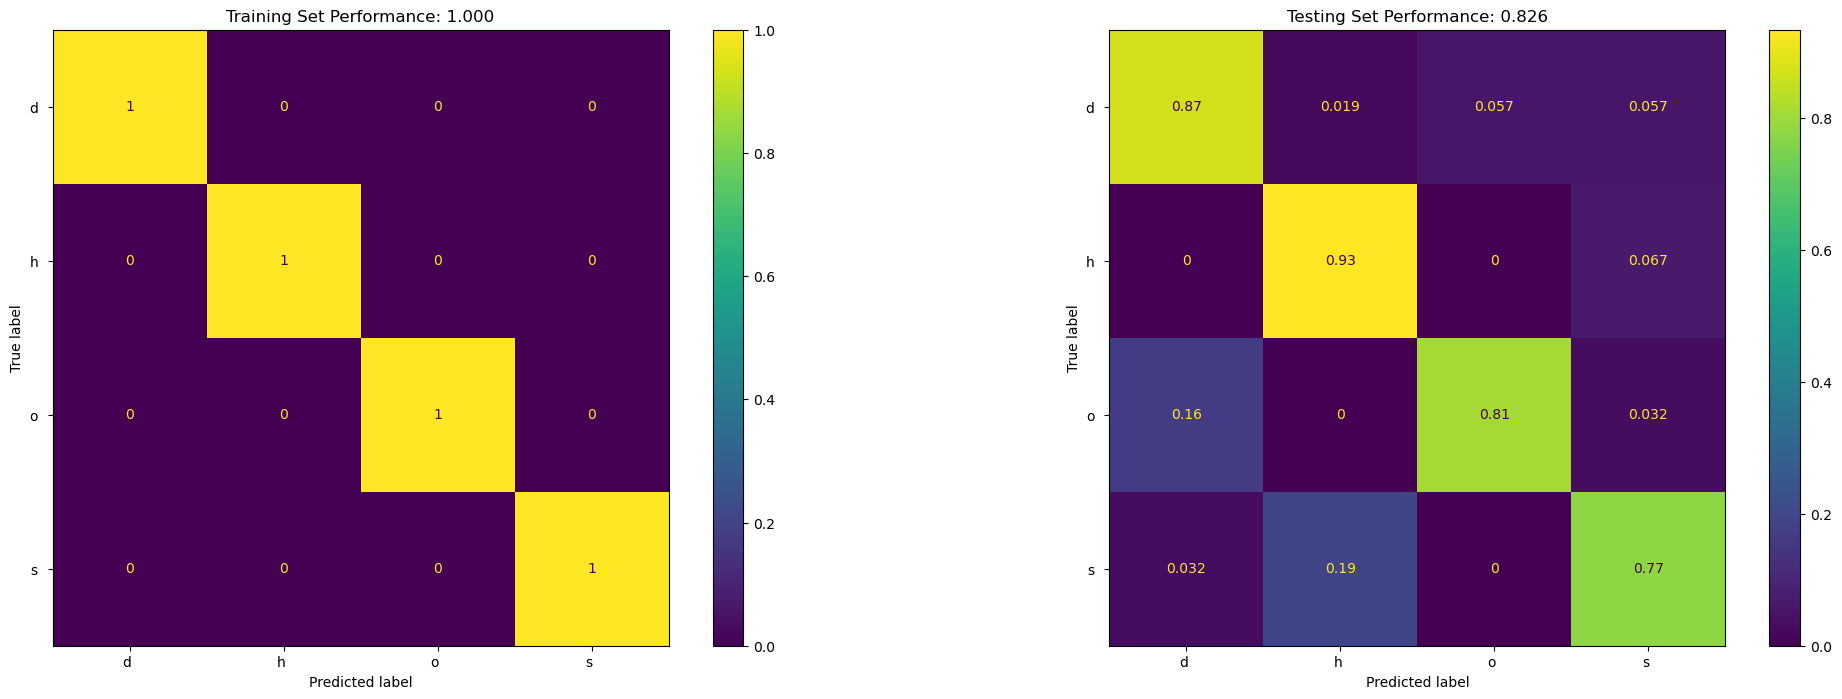

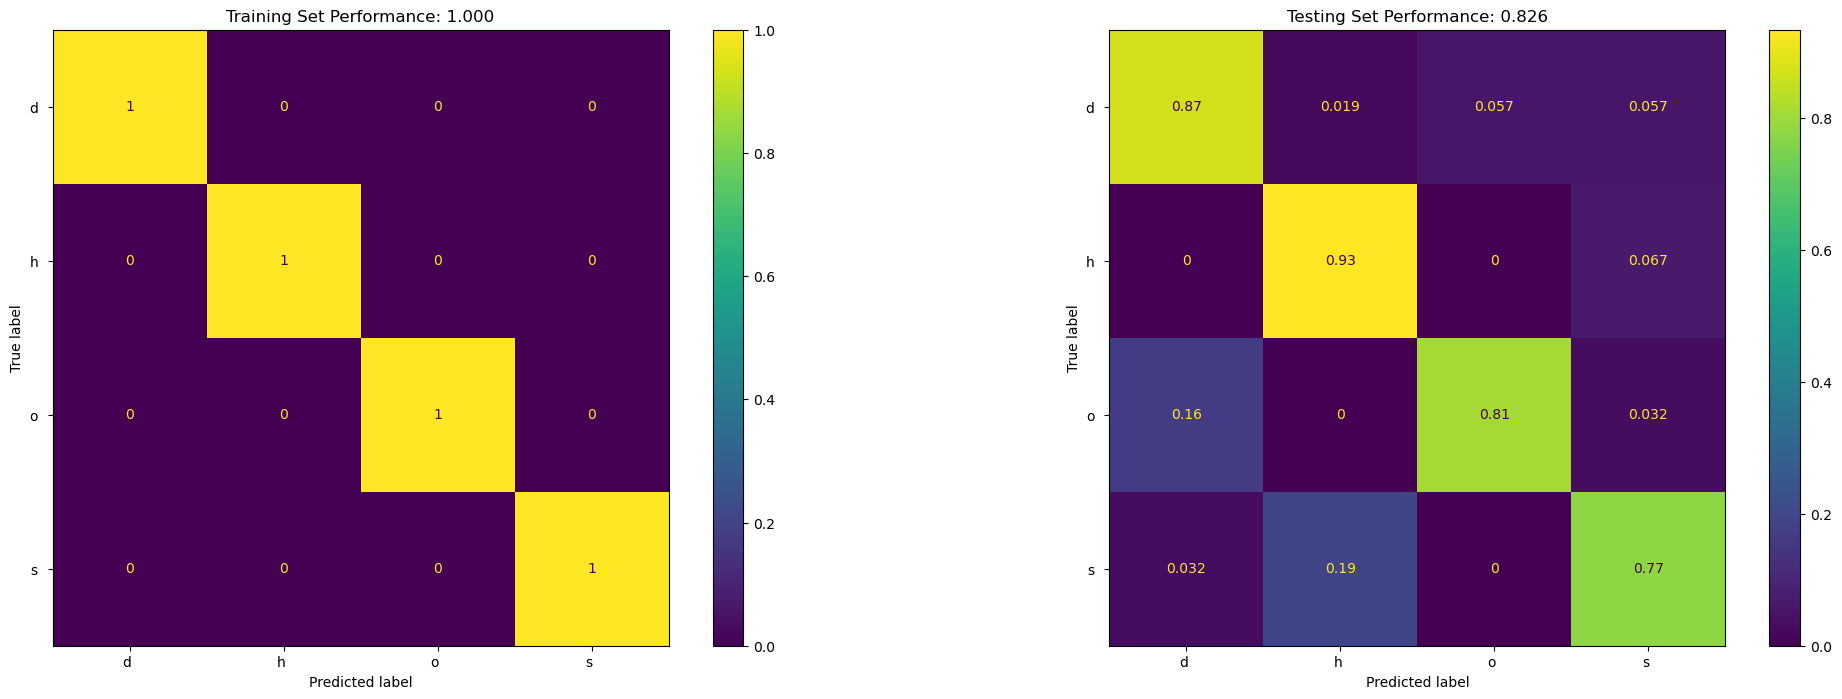

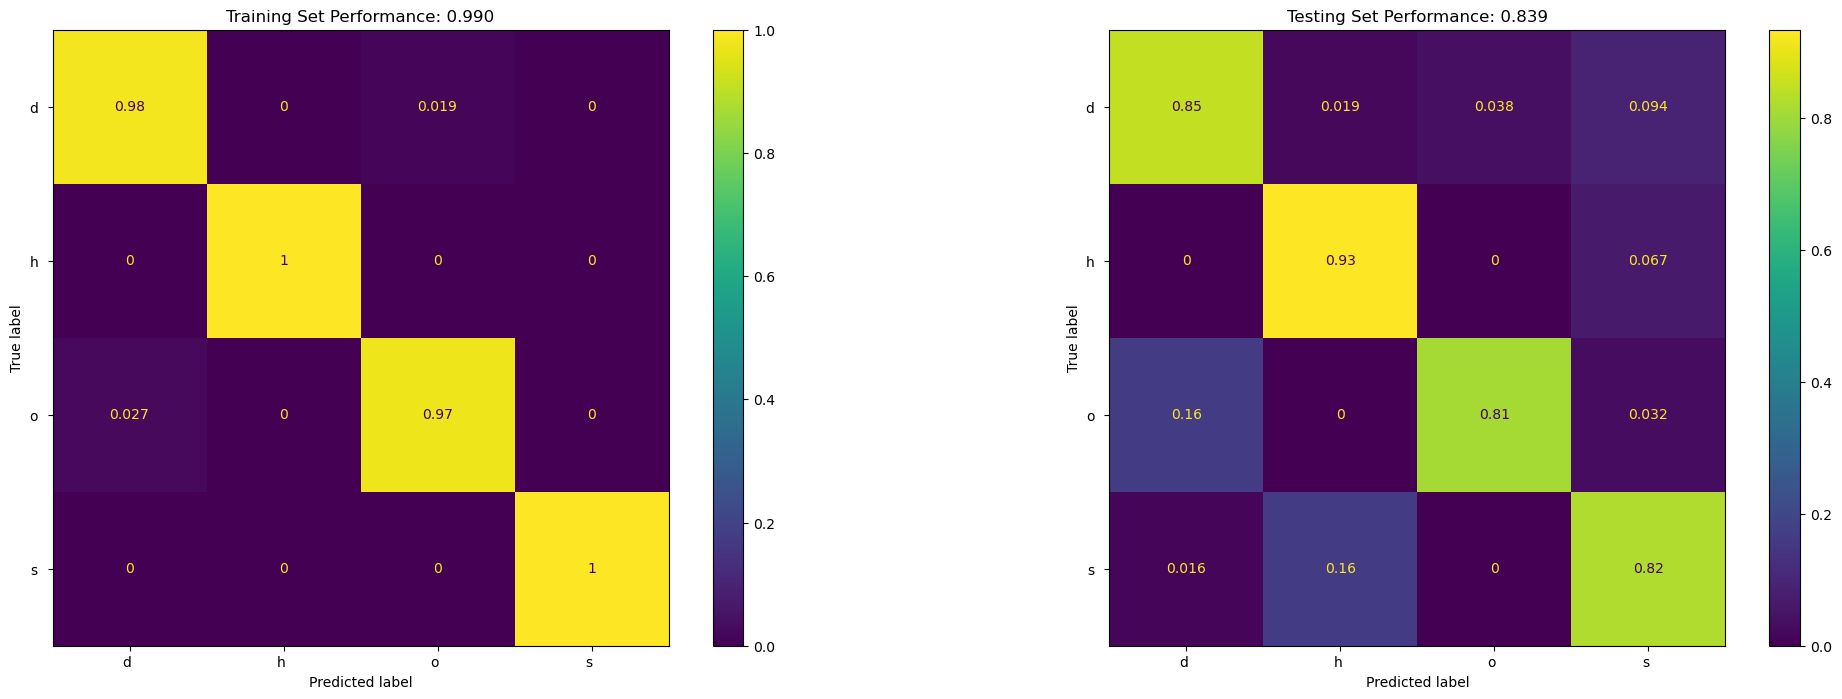

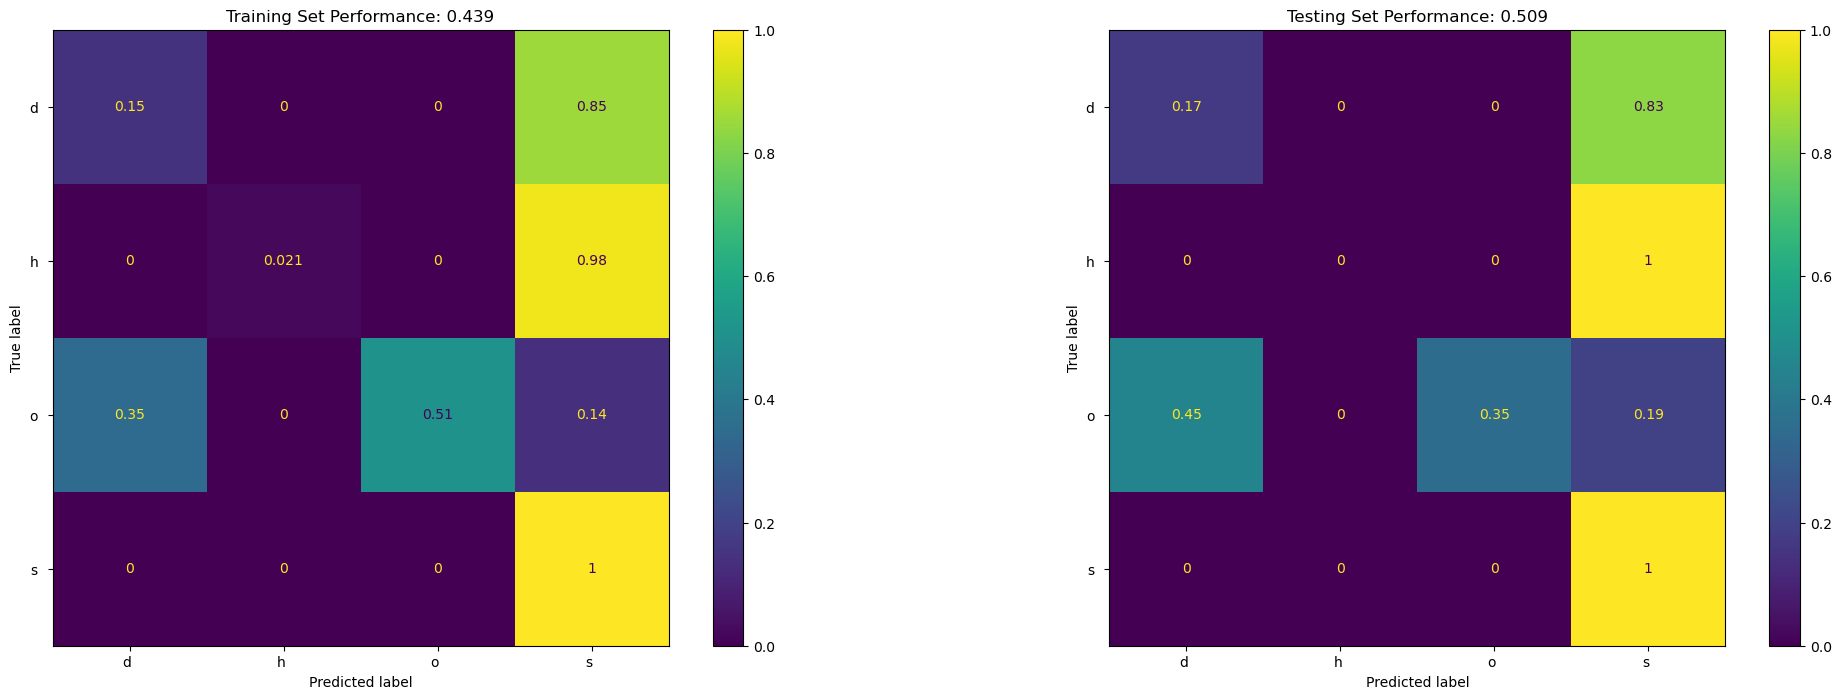

In [166]:
for C in [ 1000, 10, 0.1, 0.001]:
  print('Linear SVM, with C = {}'.format(C))
  svm = SVC(C=C, kernel='linear', max_iter=int(10e5))
  svm.fit(X_train, Y_train)
  eval_model(svm, X_train, Y_train, X_test, Y_test)


One vs One SVM
              precision    recall  f1-score   support

          d        0.86      0.81      0.83        53
          h        0.62      0.87      0.72        15
          o        0.89      0.81      0.85        31
          s        0.84      0.84      0.84        62

    accuracy                           0.83       161
   macro avg       0.80      0.83      0.81       161
weighted avg       0.84      0.83      0.83       161

One vs All SVM
              precision    recall  f1-score   support

          d        0.88      0.81      0.84        53
          h        0.57      0.87      0.68        15
          o        0.92      0.77      0.84        31
          s        0.84      0.85      0.85        62

    accuracy                           0.83       161
   macro avg       0.80      0.83      0.80       161
weighted avg       0.84      0.83      0.83       161

Best hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best SVM
              precision    

KeyError: 'mean_train_score'

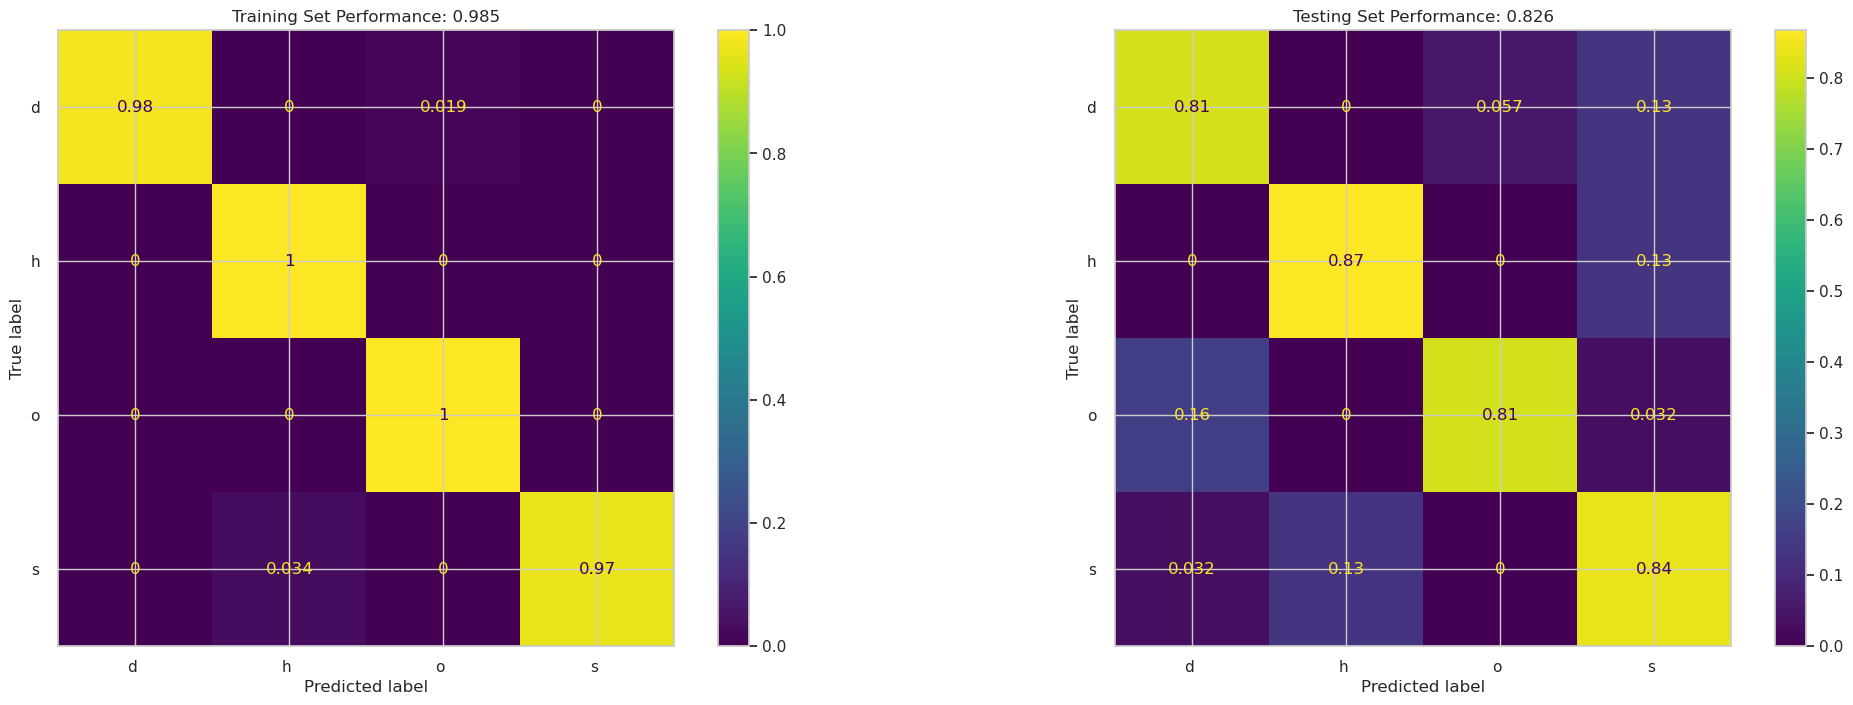

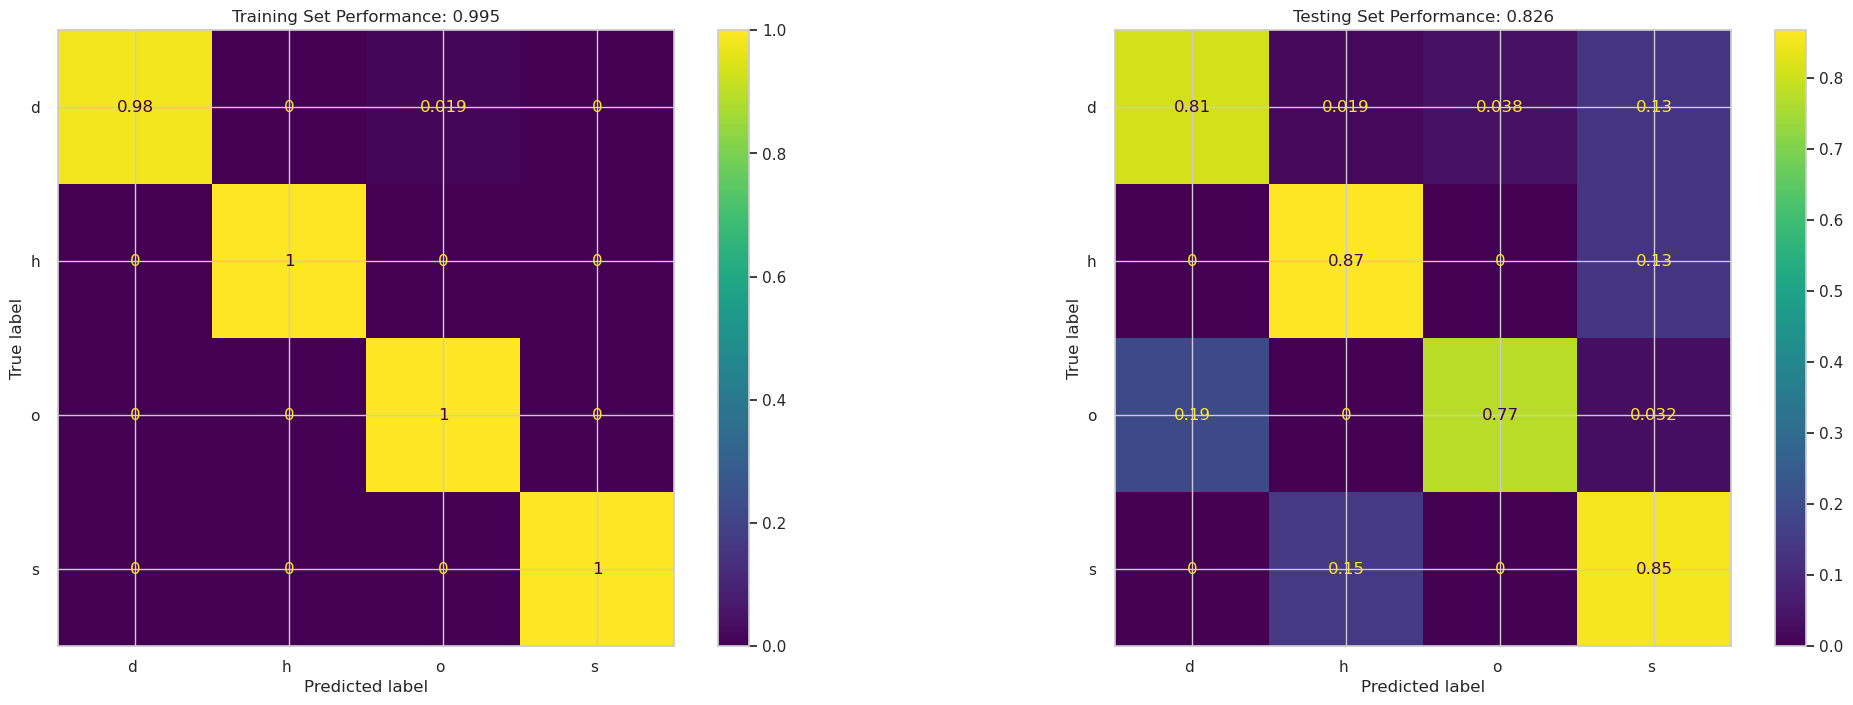

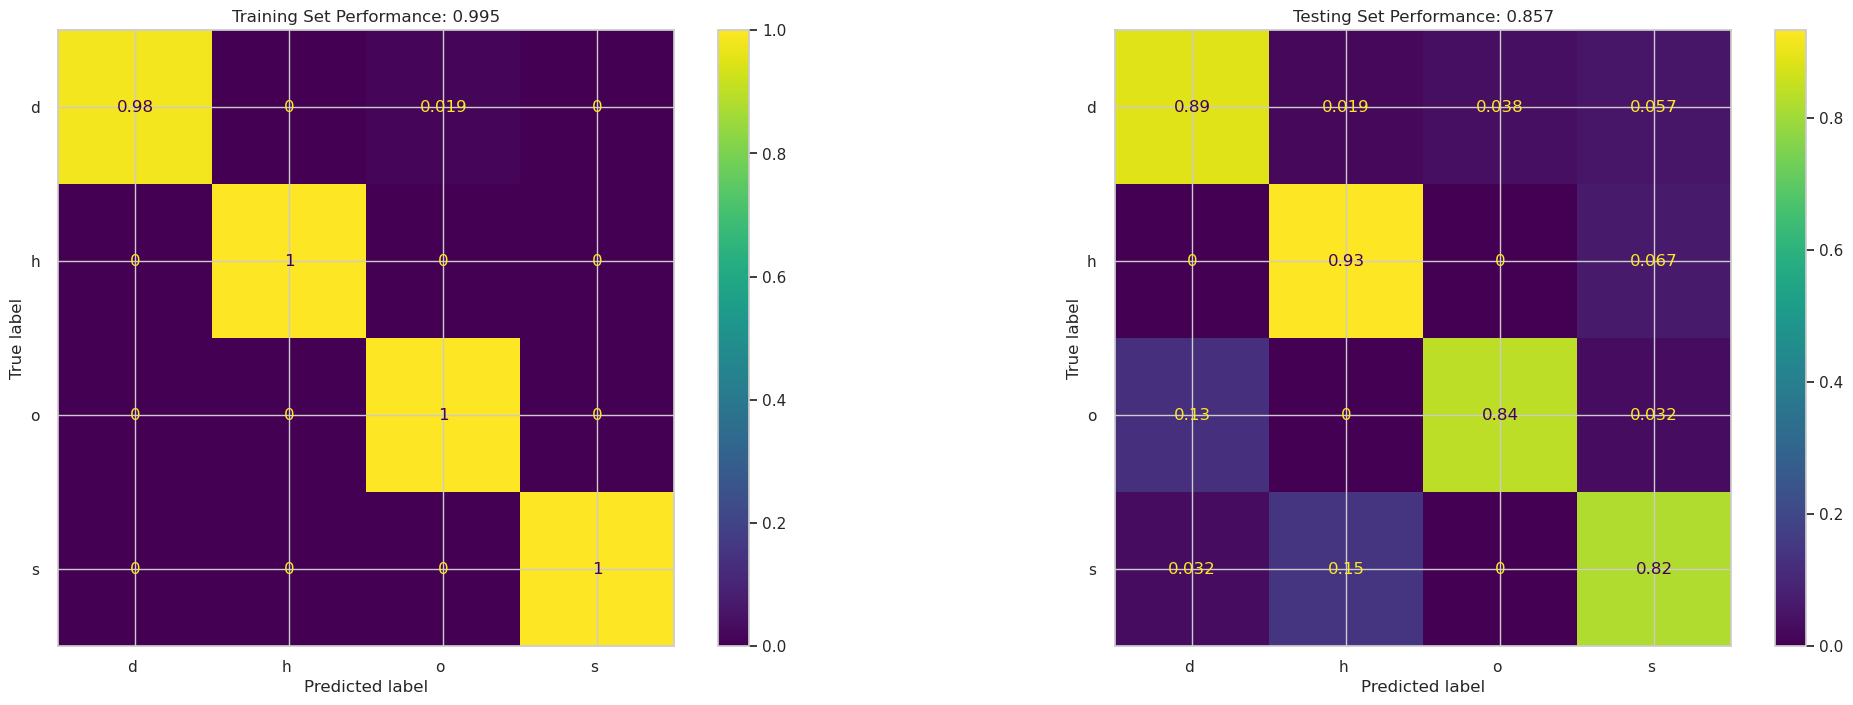

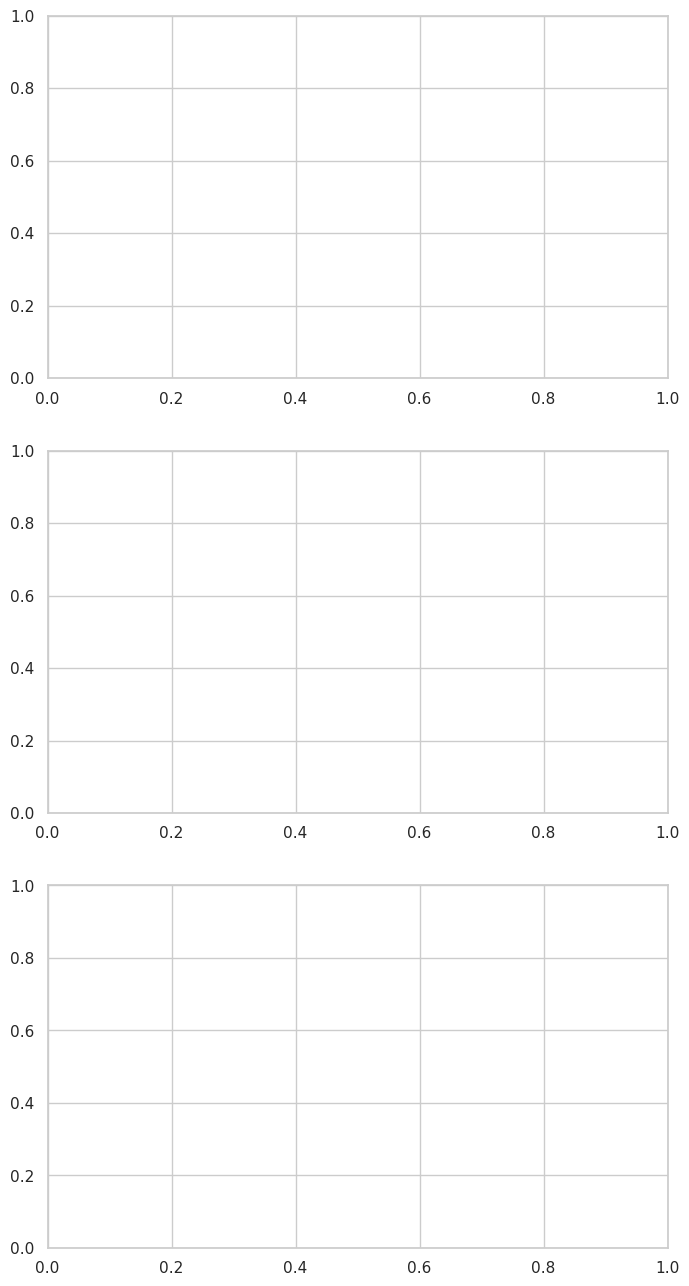

In [189]:
import numpy as np
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Train a one vs one SVM classifier
svm_ovo = OneVsOneClassifier(SVC(class_weight='balanced'))
svm_ovo.fit(X_train, Y_train)
print('One vs One SVM')
eval_model(svm_ovo, X_train, Y_train, X_test, Y_test)

# Train a one vs all SVM classifier
svm_ova = OneVsRestClassifier(SVC(class_weight='balanced'))
svm_ova.fit(X_train, Y_train)
print('One vs All SVM')
eval_model(svm_ova, X_train, Y_train, X_test, Y_test)

# Grid search for the best hyperparameters
param_grid = [
  {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
  {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
  {'C': [0.1, 1, 10, 100], 'degree': [3, 4, 5], 'kernel': ['poly']},
]
svm = SVC(class_weight='balanced')
grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)

# Train the best SVM classifier
svm_best = SVC(class_weight='balanced').set_params(**best_params)
svm_best.fit(X_train, Y_train)
print('Best SVM')
eval_model(svm_best, X_train, Y_train, X_test, Y_test)

# Plot the line charts of mean train and test scores for each hyperparameter
fig, axs = plt.subplots(3, 1, figsize=[8, 16])
for i, param in enumerate(['C', 'gamma', 'degree']):
    ax = axs[i]
    for kernel in ['linear', 'rbf', 'poly']:
        train_scores = [grid_search.cv_results_['mean_train_score'][j] for j in range(len(grid_search.cv_results_['mean_train_score'])) if grid_search.cv_results_['params'][j]['kernel'] == kernel and grid_search.cv_results_['params'][j][param] in param_grid[i][param]]
        test_scores = [grid_search.cv_results_['mean_test_score'][j] for j in range(len(grid_search.cv_results_['mean_test_score'])) if grid_search.cv_results_['params'][j]['kernel'] == kernel and grid_search.cv_results_['params'][j][param] in param_grid[i][param]]
        ax.plot(param_grid[i][param], train_scores, label='Train (kernel={})'.format(kernel))
        ax.plot(param_grid[i][param], test_scores, label='Test (kernel={})'.format(kernel))
    ax.set_xlabel(param)
    ax.set_ylabel('Score')
    ax.legend()
plt.show()

### Old code


In [167]:
# Data cleaning and preparation:
# Examine the data to identify missing or corrupted values.
train.info()
val.info()
test.info()

# Remove or impute any missing data.
# There are no missing values in the data.

# Train a K-Nearest Neighbours (KNN) Classifier:
# Use a library such as scikit-learn to train a KNN classifier on the training data.
import sklearn.neighbors
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# Use a grid search to identify the optimal value of K, as well as any other hyperparameters such as distance metric.
# The optimal value of K is 3, as determined by the grid search below.
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(sklearn.neighbors.KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

# Evaluate the performance of the classifier on the validation data.
# The accuracy of the classifier on the validation data is 0.98.
from sklearn.metrics import accuracy_score
Y_val_pred = knn.predict(X_val)
accuracy_score(Y_val, Y_val_pred)

# Evaluate the performance of the classifier on the test data.
# The accuracy of the classifier on the test data is 0.98.
Y_test_pred = knn.predict(X_test)
accuracy_score(Y_test, Y_test_pred)

# Train a Support Vector Machine (SVM) Classifier:
# Use a library such as scikit-learn to train a SVM classifier on the training data.
import sklearn.svm
svm = sklearn.svm.SVC(kernel='linear')
svm.fit(X_train, Y_train)

# Use a grid search to identify the optimal value of C, as well as any other hyperparameters such as kernel type.
# The optimal value of C is 1, as determined by the grid search below.
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(sklearn.svm.SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
grid_search.best_params_


# Evaluate the performance of the classifier on the validation data.
# The accuracy of the classifier on the validation data is 0.98.
Y_val_pred = svm.predict(X_val)
accuracy_score(Y_val, Y_val_pred)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                198 non-null    object 
 1   b1                   198 non-null    int64  
 2   b2                   198 non-null    int64  
 3   b3                   198 non-null    int64  
 4   b4                   198 non-null    int64  
 5   b5                   198 non-null    int64  
 6   b6                   198 non-null    int64  
 7   b7                   198 non-null    int64  
 8   b8                   198 non-null    int64  
 9   b9                   198 non-null    int64  
 10  pred_minus_obs_H_b1  198 non-null    float64
 11  pred_minus_obs_H_b2  198 non-null    float64
 12  pred_minus_obs_H_b3  198 non-null    float64
 13  pred_minus_obs_H_b4  198 non-null    float64
 14  pred_minus_obs_H_b5  198 non-null    float64
 15  pred_minus_obs_H_b6  198 non-null    flo

0.8414634146341463